In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
II_Reis_1 = "Then Moab rebelled against Israel after the death of Ahab.And Ahaziah fell down through a lattice in his upper chamber that was in Samaria, and was sick: and he sent messengers, and said to them, Go, inquire of Baalzebub the god of Ekron whether I shall recover of this disease.But the angel of the LORD said to Elijah the Tishbite, Arise, go up to meet the messengers of the king of Samaria, and say to them, Is it not because there is not a God in Israel, that you go to inquire of Baalzebub the god of Ekron?Now therefore thus said the LORD, You shall not come down from that bed on which you are gone up, but shall surely die. And Elijah departed.And when the messengers turned back to him, he said to them, Why are you now turned back?And they said to him, There came a man up to meet us, and said to us, Go, turn again to the king that sent you, and say to him, Thus said the LORD, Is it not because there is not a God in Israel, that you send to inquire of Baalzebub the god of Ekron? therefore you shall not come down from that bed on which you are gone up, but shall surely die.And he said to them, What manner of man was he which came up to meet you, and told you these words?And they answered him, He was an hairy man, and girt with a girdle of leather about his loins. And he said, It is Elijah the Tishbite.Then the king sent to him a captain of fifty with his fifty. And he went up to him: and, behold, he sat on the top of an hill. And he spoke to him, You man of God, the king has said, Come down.And Elijah answered and said to the captain of fifty, If I be a man of God, then let fire come down from heaven, and consume you and your fifty. And there came down fire from heaven, and consumed him and his fifty.Again also he sent to him another captain of fifty with his fifty. And he answered and said to him, O man of God, thus has the king said, Come down quickly.And Elijah answered and said to them, If I be a man of God, let fire come down from heaven, and consume you and your fifty. And the fire of God came down from heaven, and consumed him and his fifty.And he sent again a captain of the third fifty with his fifty. And the third captain of fifty went up, and came and fell on his knees before Elijah, and sought him, and said to him, O man of God, I pray you, let my life, and the life of these fifty your servants, be precious in your sight.Behold, there came fire down from heaven, and burnt up the two captains of the former fifties with their fifties: therefore let my life now be precious in your sight.And the angel of the LORD said to Elijah, Go down with him: be not afraid of him. And he arose, and went down with him to the king.And he said to him, Thus said the LORD, For as much as you have sent messengers to inquire of Baalzebub the god of Ekron, is it not because there is no God in Israel to inquire of his word? therefore you shall not come down off that bed on which you are gone up, but shall surely die.So he died according to the word of the LORD which Elijah had spoken. And Jehoram reigned in his stead in the second year of Jehoram the son of Jehoshaphat king of Judah; because he had no son.Now the rest of the acts of Ahaziah which he did, are they not written in the book of the chronicles of the kings of Israel?".lower()

In [6]:
II_Reis_2 = "And it came to pass, when the LORD would take up Elijah into heaven by a whirlwind, that Elijah went with Elisha from Gilgal.And Elijah said to Elisha, Tarry here, I pray you; for the LORD has sent me to Bethel. And Elisha said to him, As the LORD lives, and as your soul lives, I will not leave you. So they went down to Bethel.And the sons of the prophets that were at Bethel came forth to Elisha, and said to him, Know you that the LORD will take away your master from your head to day? And he said, Yes, I know it; hold you your peace.And Elijah said to him, Elisha, tarry here, I pray you; for the LORD has sent me to Jericho. And he said, As the LORD lives, and as your soul lives, I will not leave you. So they came to Jericho.And the sons of the prophets that were at Jericho came to Elisha, and said to him, Know you that the LORD will take away your master from your head to day? And he answered, Yes, I know it; hold you your peace.And Elijah said to him, Tarry, I pray you, here; for the LORD has sent me to Jordan. And he said, As the LORD lives, and as your soul lives, I will not leave you. And they two went on.And fifty men of the sons of the prophets went, and stood to view afar off: and they two stood by Jordan.And Elijah took his mantle, and wrapped it together, and smote the waters, and they were divided here and thither, so that they two went over on dry ground.And it came to pass, when they were gone over, that Elijah said to Elisha, Ask what I shall do for you, before I be taken away from you. And Elisha said, I pray you, let a double portion of your spirit be on me.And he said, You have asked a hard thing: nevertheless, if you see me when I am taken from you, it shall be so to you; but if not, it shall not be so.And it came to pass, as they still went on, and talked, that, behold, there appeared a chariot of fire, and horses of fire, and parted them both asunder; and Elijah went up by a whirlwind into heaven.And Elisha saw it, and he cried, My father, my father, the chariot of Israel, and the horsemen thereof. And he saw him no more: and he took hold of his own clothes, and rent them in two pieces.He took up also the mantle of Elijah that fell from him, and went back, and stood by the bank of Jordan;And he took the mantle of Elijah that fell from him, and smote the waters, and said, Where is the LORD God of Elijah? and when he also had smitten the waters, they parted here and thither: and Elisha went over.And when the sons of the prophets which were to view at Jericho saw him, they said, The spirit of Elijah does rest on Elisha. And they came to meet him, and bowed themselves to the ground before him.And they said to him, Behold now, there be with your servants fifty strong men; let them go, we pray you, and seek your master: lest peradventure the Spirit of the LORD has taken him up, and cast him on some mountain, or into some valley. And he said, You shall not send.And when they urged him till he was ashamed, he said, Send. They sent therefore fifty men; and they sought three days, but found him not.And when they came again to him, (for he tarried at Jericho,) he said to them, Did I not say to you, Go not?And the men of the city said to Elisha, Behold, I pray you, the situation of this city is pleasant, as my lord sees: but the water is naught, and the ground barren.And he said, Bring me a new cruse, and put salt therein. And they brought it to him.And he went forth to the spring of the waters, and cast the salt in there, and said, Thus said the LORD, I have healed these waters; there shall not be from there any more death or barren land.So the waters were healed to this day, according to the saying of Elisha which he spoke.And he went up from there to Bethel: and as he was going up by the way, there came forth little children out of the city, and mocked him, and said to him, Go up, you bald head; go up, you bald head.And he turned back, and looked on them, and cursed them in the name of the LORD. And there came forth two she bears out of the wood, and tare forty and two children of them.And he went from there to mount Carmel, and from there he returned to Samaria.".lower()

In [7]:
II_Reis_3 = "Now Jehoram the son of Ahab began to reign over Israel in Samaria the eighteenth year of Jehoshaphat king of Judah, and reigned twelve years.And he worked evil in the sight of the LORD; but not like his father, and like his mother: for he put away the image of Baal that his father had made.Nevertheless he joined to the sins of Jeroboam the son of Nebat, which made Israel to sin; he departed not therefrom.And Mesha king of Moab was a sheep master, and rendered to the king of Israel an hundred thousand lambs, and an hundred thousand rams, with the wool.But it came to pass, when Ahab was dead, that the king of Moab rebelled against the king of Israel.And king Jehoram went out of Samaria the same time, and numbered all Israel.And he went and sent to Jehoshaphat the king of Judah, saying, The king of Moab has rebelled against me: will you go with me against Moab to battle? And he said, I will go up: I am as you are, my people as your people, and my horses as your horses.And he said, Which way shall we go up? And he answered, The way through the wilderness of Edom.So the king of Israel went, and the king of Judah, and the king of Edom: and they fetched a compass of seven days'journey: and there was no water for the host, and for the cattle that followed them.And the king of Israel said, Alas! that the LORD has called these three kings together, to deliver them into the hand of Moab!But Jehoshaphat said, Is there not here a prophet of the LORD, that we may inquire of the LORD by him? And one of the king of Israel' servants answered and said, Here is Elisha the son of Shaphat, which poured water on the hands of Elijah.And Jehoshaphat said, The word of the LORD is with him. So the king of Israel and Jehoshaphat and the king of Edom went down to him.And Elisha said to the king of Israel, What have I to do with you? get you to the prophets of your father, and to the prophets of your mother. And the king of Israel said to him, No: for the LORD has called these three kings together, to deliver them into the hand of Moab.And Elisha said, As the LORD of hosts lives, before whom I stand, surely, were it not that I regard the presence of Jehoshaphat the king of Judah, I would not look toward you, nor see you.But now bring me a minstrel. And it came to pass, when the minstrel played, that the hand of the LORD came on him.And he said, Thus said the LORD, Make this valley full of ditches.For thus said the LORD, You shall not see wind, neither shall you see rain; yet that valley shall be filled with water, that you may drink, both you, and your cattle, and your beasts.And this is but a light thing in the sight of the LORD: he will deliver the Moabites also into your hand.And you shall smite every fenced city, and every choice city, and shall fell every good tree, and stop all wells of water, and mar every good piece of land with stones.And it came to pass in the morning, when the meat offering was offered, that, behold, there came water by the way of Edom, and the country was filled with water.And when all the Moabites heard that the kings were come up to fight against them, they gathered all that were able to put on armor, and upward, and stood in the border.And they rose up early in the morning, and the sun shone on the water, and the Moabites saw the water on the other side as red as blood:And they said, This is blood: the kings are surely slain, and they have smitten one another: now therefore, Moab, to the spoil.And when they came to the camp of Israel, the Israelites rose up and smote the Moabites, so that they fled before them: but they went forward smiting the Moabites, even in their country.And they beat down the cities, and on every good piece of land cast every man his stone, and filled it; and they stopped all the wells of water, and felled all the good trees: only in Kirharaseth left they the stones thereof; however, the slingers went about it, and smote it.And when the king of Moab saw that the battle was too sore for him, he took with him seven hundred men that drew swords, to break through even to the king of Edom: but they could not.Then he took his oldest son that should have reigned in his stead, and offered him for a burnt offering on the wall. And there was great indignation against Israel: and they departed from him, and returned to their own land.".lower()

In [8]:
II_Reis_4 = "Now there cried a certain woman of the wives of the sons of the prophets to Elisha, saying, Your servant my husband is dead; and you know that your servant did fear the LORD: and the creditor is come to take to him my two sons to be slaves.And Elisha said to her, What shall I do for you? tell me, what have you in the house? And she said, Your handmaid has not any thing in the house, save a pot of oil.Then he said, Go, borrow you vessels abroad of all your neighbors, even empty vessels; borrow not a few.And when you are come in, you shall shut the door on you and on your sons, and shall pour out into all those vessels, and you shall set aside that which is full.So she went from him, and shut the door on her and on her sons, who brought the vessels to her; and she poured out.And it came to pass, when the vessels were full, that she said to her son, Bring me yet a vessel. And he said to her, There is not a vessel more. And the oil stayed.Then she came and told the man of God. And he said, Go, sell the oil, and pay your debt, and live you and your children of the rest.And it fell on a day, that Elisha passed to Shunem, where was a great woman; and she constrained him to eat bread. And so it was, that as oft as he passed by, he turned in thither to eat bread.And she said to her husband, Behold now, I perceive that this is an holy man of God, which passes by us continually.Let us make a little chamber, I pray you, on the wall; and let us set for him there a bed, and a table, and a stool, and a candlestick: and it shall be, when he comes to us, that he shall turn in thither.And it fell on a day, that he came thither, and he turned into the chamber, and lay there.And he said to Gehazi his servant, Call this Shunammite. And when he had called her, she stood before him.And he said to him, Say now to her, Behold, you have been careful for us with all this care; what is to be done for you? would you be spoken for to the king, or to the captain of the host? And she answered, I dwell among my own people.And he said, What then is to be done for her? And Gehazi answered, Truly she has no child, and her husband is old.And he said, Call her. And when he had called her, she stood in the door.And he said, About this season, according to the time of life, you shall embrace a son. And she said, No, my lord, you man of God, do not lie to your handmaid.And the woman conceived, and bore a son at that season that Elisha had said to her, according to the time of life.And when the child was grown, it fell on a day, that he went out to his father to the reapers.And he said to his father, My head, my head. And he said to a lad, Carry him to his mother.And when he had taken him, and brought him to his mother, he sat on her knees till noon, and then died.And she went up, and laid him on the bed of the man of God, and shut the door on him, and went out.And she called to her husband, and said, Send me, I pray you, one of the young men, and one of the asses, that I may run to the man of God, and come again.And he said, Why will you go to him to day? it is neither new moon, nor sabbath. And she said, It shall be well.Then she saddled an ass, and said to her servant, Drive, and go forward; slack not your riding for me, except I bid you.So she went and came to the man of God to mount Carmel. And it came to pass, when the man of God saw her afar off, that he said to Gehazi his servant, Behold, yonder is that Shunammite:Run now, I pray you, to meet her, and say to her, Is it well with you? is it well with your husband? is it well with the child? And she answered, It is well:And when she came to the man of God to the hill, she caught him by the feet: but Gehazi came near to thrust her away. And the man of God said, Let her alone; for her soul is vexed within her: and the LORD has hid it from me, and has not told me.Then she said, Did I desire a son of my lord? did I not say, Do not deceive me?Then he said to Gehazi, Gird up your loins, and take my staff in your hand, and go your way: if you meet any man, salute him not; and if any salute you, answer him not again: and lay my staff on the face of the child.And the mother of the child said, As the LORD lives, and as your soul lives, I will not leave you. And he arose, and followed her.And Gehazi passed on before them, and laid the staff on the face of the child; but there was neither voice, nor hearing. Why he went again to meet him, and told him, saying, The child is not awaked.And when Elisha was come into the house, behold, the child was dead, and laid on his bed.He went in therefore, and shut the door on them two, and prayed to the LORD.And he went up, and lay on the child, and put his mouth on his mouth, and his eyes on his eyes, and his hands on his hands: and stretched himself on the child; and the flesh of the child waxed warm.Then he returned, and walked in the house to and fro; and went up, and stretched himself on him: and the child sneezed seven times, and the child opened his eyes.And he called Gehazi, and said, Call this Shunammite. So he called her. And when she was come in to him, he said, Take up your son.Then she went in, and fell at his feet, and bowed herself to the ground, and took up her son, and went out.And Elisha came again to Gilgal: and there was a dearth in the land; and the sons of the prophets were sitting before him: and he said to his servant, Set on the great pot, and seethe pottage for the sons of the prophets.And one went out into the field to gather herbs, and found a wild vine, and gathered thereof wild gourds his lap full, and came and shred them into the pot of pottage: for they knew them not.So they poured out for the men to eat. And it came to pass, as they were eating of the pottage, that they cried out, and said, O you man of God, there is death in the pot. And they could not eat thereof.But he said, Then bring meal. And he cast it into the pot; and he said, Pour out for the people, that they may eat. And there was no harm in the pot.And there came a man from Baalshalisha, and brought the man of God bread of the first fruits, twenty loaves of barley, and full ears of corn in the husk thereof. And he said, Give to the people, that they may eat.And his servitor said, What, should I set this before an hundred men? He said again, Give the people, that they may eat: for thus said the LORD, They shall eat, and shall leave thereof.So he set it before them, and they did eat, and left thereof, according to the word of the LORD.".lower()

In [9]:
II_Reis_5 = "Now Naaman, captain of the host of the king of Syria, was a great man with his master, and honorable, because by him the LORD had given deliverance to Syria: he was also a mighty man in valor, but he was a leper.And the Syrians had gone out by companies, and had brought away captive out of the land of Israel a little maid; and she waited on Naaman' wife.And she said to her mistress, Would God my lord were with the prophet that is in Samaria! for he would recover him of his leprosy.And one went in, and told his lord, saying, Thus and thus said the maid that is of the land of Israel.And the king of Syria said, Go to, go, and I will send a letter to the king of Israel. And he departed, and took with him ten talents of silver, and six thousand pieces of gold, and ten changes of raiment.And he brought the letter to the king of Israel, saying, Now when this letter is come to you, behold, I have therewith sent Naaman my servant to you, that you may recover him of his leprosy.And it came to pass, when the king of Israel had read the letter, that he rent his clothes, and said, Am I God, to kill and to make alive, that this man does send to me to recover a man of his leprosy? why consider, I pray you, and see how he seeks a quarrel against me.And it was so, when Elisha the man of God had heard that the king of Israel had rent his clothes, that he sent to the king, saying, Why have you rent your clothes? let him come now to me, and he shall know that there is a prophet in Israel.So Naaman came with his horses and with his chariot, and stood at the door of the house of Elisha.And Elisha sent a messenger to him, saying, Go and wash in Jordan seven times, and your flesh shall come again to you, and you shall be clean.But Naaman was wroth, and went away, and said, Behold, I thought, He will surely come out to me, and stand, and call on the name of the LORD his God, and strike his hand over the place, and recover the leper.Are not Abana and Pharpar, rivers of Damascus, better than all the waters of Israel? may I not wash in them, and be clean? So he turned and went away in a rage.And his servants came near, and spoke to him, and said, My father, if the prophet had bid you do some great thing, would you not have done it? how much rather then, when he said to you, Wash, and be clean?Then went he down, and dipped himself seven times in Jordan, according to the saying of the man of God: and his flesh came again like to the flesh of a little child, and he was clean.And he returned to the man of God, he and all his company, and came, and stood before him: and he said, Behold, now I know that there is no God in all the earth, but in Israel: now therefore, I pray you, take a blessing of your servant.But he said, As the LORD lives, before whom I stand, I will receive none. And he urged him to take it; but he refused.And Naaman said, Shall there not then, I pray you, be given to your servant two mules'burden of earth? for your servant will from now on offer neither burnt offering nor sacrifice to other gods, but to the LORD.In this thing the LORD pardon your servant, that when my master goes into the house of Rimmon to worship there, and he leans on my hand, and I bow myself in the house of Rimmon: when I bow down myself in the house of Rimmon, the LORD pardon your servant in this thing.And he said to him, Go in peace. So he departed from him a little way.But Gehazi, the servant of Elisha the man of God, said, Behold, my master has spared Naaman this Syrian, in not receiving at his hands that which he brought: but, as the LORD lives, I will run after him, and take somewhat of him.So Gehazi followed after Naaman. And when Naaman saw him running after him, he lighted down from the chariot to meet him, and said, Is all well?And he said, All is well. My master has sent me, saying, Behold, even now there be come to me from mount Ephraim two young men of the sons of the prophets: give them, I pray you, a talent of silver, and two changes of garments.And Naaman said, Be content, take two talents. And he urged him, and bound two talents of silver in two bags, with two changes of garments, and laid them on two of his servants; and they bore them before him.And when he came to the tower, he took them from their hand, and bestowed them in the house: and he let the men go, and they departed.But he went in, and stood before his master. And Elisha said to him, From where come you, Gehazi? And he said, Your servant went no where.And he said to him, Went not my heart with you, when the man turned again from his chariot to meet you? Is it a time to receive money, and to receive garments, and olive groves, and vineyards, and sheep, and oxen, and menservants, and maidservants?The leprosy therefore of Naaman shall stick to you, and to your seed for ever. And he went out from his presence a leper as white as snow.".lower()

In [10]:
II_Reis_6 = "And the sons of the prophets said to Elisha, Behold now, the place where we dwell with you is too strait for us.Let us go, we pray you, to Jordan, and take there every man a beam, and let us make us a place there, where we may dwell. And he answered, Go you.And one said, Be content, I pray you, and go with your servants. And he answered, I will go.So he went with them. And when they came to Jordan, they cut down wood.But as one was felling a beam, the ax head fell into the water: and he cried, and said, Alas, master! for it was borrowed.And the man of God said, Where fell it? And he showed him the place. And he cut down a stick, and cast it in thither; and the iron did swim.Therefore said he, Take it up to you. And he put out his hand, and took it.Then the king of Syria warred against Israel, and took counsel with his servants, saying, In such and such a place shall be my camp.And the man of God sent to the king of Israel, saying, Beware that you pass not such a place; for thither the Syrians are come down.And the king of Israel sent to the place which the man of God told him and warned him of, and saved himself there, not once nor twice.Therefore the heart of the king of Syria was sore troubled for this thing; and he called his servants, and said to them, Will you not show me which of us is for the king of Israel?And one of his servants said, None, my lord, O king: but Elisha, the prophet that is in Israel, tells the king of Israel the words that you speak in your bedchamber.And he said, Go and spy where he is, that I may send and fetch him. And it was told him, saying, Behold, he is in Dothan.Therefore sent he thither horses, and chariots, and a great host: and they came by night, and compassed the city about.And when the servant of the man of God was risen early, and gone forth, behold, an host compassed the city both with horses and chariots. And his servant said to him, Alas, my master! how shall we do?And he answered, Fear not: for they that be with us are more than they that be with them.And Elisha prayed, and said, LORD, I pray you, open his eyes, that he may see. And the LORD opened the eyes of the young man; and he saw: and, behold, the mountain was full of horses and chariots of fire round about Elisha.And when they came down to him, Elisha prayed to the LORD, and said, Smite this people, I pray you, with blindness. And he smote them with blindness according to the word of Elisha.And Elisha said to them, This is not the way, neither is this the city: follow me, and I will bring you to the man whom you seek. But he led them to Samaria.And it came to pass, when they were come into Samaria, that Elisha said, LORD, open the eyes of these men, that they may see. And the LORD opened their eyes, and they saw; and, behold, they were in the middle of Samaria.And the king of Israel said to Elisha, when he saw them, My father, shall I smite them? shall I smite them?And he answered, You shall not smite them: would you smite those whom you have taken captive with your sword and with your bow? set bread and water before them, that they may eat and drink, and go to their master.And he prepared great provision for them: and when they had eaten and drunk, he sent them away, and they went to their master. So the bands of Syria came no more into the land of Israel.And it came to pass after this, that Benhadad king of Syria gathered all his host, and went up, and besieged Samaria.And there was a great famine in Samaria: and, behold, they besieged it, until an ass' head was sold for fourscore pieces of silver, and the fourth part of a cab of dove' dung for five pieces of silver.And as the king of Israel was passing by on the wall, there cried a woman to him, saying, Help, my lord, O king.And he said, If the LORD do not help you, from where shall I help you? out of the barn floor, or out of the wine press?And the king said to her, What ails you? And she answered, This woman said to me, Give your son, that we may eat him to day, and we will eat my son to morrow.So we boiled my son, and did eat him: and I said to her on the next day, Give your son, that we may eat him: and she has hid her son.And it came to pass, when the king heard the words of the woman, that he rent his clothes; and he passed by on the wall, and the people looked, and, behold, he had sackcloth within on his flesh.Then he said, God do so and more also to me, if the head of Elisha the son of Shaphat shall stand on him this day.But Elisha sat in his house, and the elders sat with him; and the king sent a man from before him: but ere the messenger came to him, he said to the elders, See you how this son of a murderer has sent to take away my head? look, when the messenger comes, shut the door, and hold him fast at the door: is not the sound of his master' feet behind him?And while he yet talked with them, behold, the messenger came down to him: and he said, Behold, this evil is of the LORD; what should I wait for the LORD any longer?".lower()

In [11]:
II_Reis_7 = "Then Elisha said, Hear you the word of the LORD; Thus said the LORD, To morrow about this time shall a measure of fine flour be sold for a shekel, and two measures of barley for a shekel, in the gate of Samaria.Then a lord on whose hand the king leaned answered the man of God, and said, Behold, if the LORD would make windows in heaven, might this thing be? And he said, Behold, you shall see it with your eyes, but shall not eat thereof.And there were four leprous men at the entering in of the gate: and they said one to another, Why sit we here until we die?If we say, We will enter into the city, then the famine is in the city, and we shall die there: and if we sit still here, we die also. Now therefore come, and let us fall to the host of the Syrians: if they save us alive, we shall live; and if they kill us, we shall but die.And they rose up in the twilight, to go to the camp of the Syrians: and when they were come to the uttermost part of the camp of Syria, behold, there was no man there.For the LORD had made the host of the Syrians to hear a noise of chariots, and a noise of horses, even the noise of a great host: and they said one to another, See, the king of Israel has hired against us the kings of the Hittites, and the kings of the Egyptians, to come on us.Why they arose and fled in the twilight, and left their tents, and their horses, and their asses, even the camp as it was, and fled for their life.And when these lepers came to the uttermost part of the camp, they went into one tent, and did eat and drink, and carried there silver, and gold, and raiment, and went and hid it; and came again, and entered into another tent, and carried there also, and went and hid it.Then they said one to another, We do not well: this day is a day of good tidings, and we hold our peace: if we tarry till the morning light, some mischief will come on us: now therefore come, that we may go and tell the king' household.So they came and called to the porter of the city: and they told them, saying, We came to the camp of the Syrians, and, behold, there was no man there, neither voice of man, but horses tied, and asses tied, and the tents as they were.And he called the porters; and they told it to the king' house within.And the king arose in the night, and said to his servants, I will now show you what the Syrians have done to us. They know that we be hungry; therefore are they gone out of the camp to hide themselves in the field, saying, When they come out of the city, we shall catch them alive, and get into the city.And one of his servants answered and said, Let some take, I pray you, five of the horses that remain, which are left in the city, (behold, they are as all the multitude of Israel that are left in it: behold, I say, they are even as all the multitude of the Israelites that are consumed:) and let us send and see.They took therefore two chariot horses; and the king sent after the host of the Syrians, saying, Go and see.And they went after them to Jordan: and, see, all the way was full of garments and vessels, which the Syrians had cast away in their haste. And the messengers returned, and told the king.And the people went out, and spoiled the tents of the Syrians. So a measure of fine flour was sold for a shekel, and two measures of barley for a shekel, according to the word of the LORD.And the king appointed the lord on whose hand he leaned to have the charge of the gate: and the people stepped on him in the gate, and he died, as the man of God had said, who spoke when the king came down to him.And it came to pass as the man of God had spoken to the king, saying, Two measures of barley for a shekel, and a measure of fine flour for a shekel, shall be to morrow about this time in the gate of Samaria:And that lord answered the man of God, and said, Now, behold, if the LORD should make windows in heaven, might such a thing be? And he said, Behold, you shall see it with your eyes, but shall not eat thereof.And so it fell out to him: for the people stepped on him in the gate, and he died.".lower()

In [12]:
II_Reis_8 = "Then spoke Elisha to the woman, whose son he had restored to life, saying, Arise, and go you and your household, and sojourn wherever you can sojourn: for the LORD has called for a famine; and it shall also come on the land seven years.And the woman arose, and did after the saying of the man of God: and she went with her household, and sojourned in the land of the Philistines seven years.And it came to pass at the seven years'end, that the woman returned out of the land of the Philistines: and she went forth to cry to the king for her house and for her land.And the king talked with Gehazi the servant of the man of God, saying, Tell me, I pray you, all the great things that Elisha has done.And it came to pass, as he was telling the king how he had restored a dead body to life, that, behold, the woman, whose son he had restored to life, cried to the king for her house and for her land. And Gehazi said, My lord, O king, this is the woman, and this is her son, whom Elisha restored to life.And when the king asked the woman, she told him. So the king appointed to her a certain officer, saying, Restore all that was hers, and all the fruits of the field since the day that she left the land, even until now.And Elisha came to Damascus; and Benhadad the king of Syria was sick; and it was told him, saying, The man of God is come here.And the king said to Hazael, Take a present in your hand, and go, meet the man of God, and inquire of the LORD by him, saying, Shall I recover of this disease?So Hazael went to meet him, and took a present with him, even of every good thing of Damascus, forty camels'burden, and came and stood before him, and said, Your son Benhadad king of Syria has sent me to you, saying, Shall I recover of this disease?And Elisha said to him, Go, say to him, You may certainly recover: however, the LORD has showed me that he shall surely die.And he settled his countenance steadfastly, until he was ashamed: and the man of God wept.And Hazael said, Why weeps my lord? And he answered, Because I know the evil that you will do to the children of Israel: their strong holds will you set on fire, and their young men will you slay with the sword, and will dash their children, and rip up their women with child.And Hazael said, But what, is your servant a dog, that he should do this great thing? And Elisha answered, The LORD has showed me that you shall be king over Syria.So he departed from Elisha, and came to his master; who said to him, What said Elisha to you? And he answered, He told me that you should surely recover.And it came to pass on the morrow, that he took a thick cloth, and dipped it in water, and spread it on his face, so that he died: and Hazael reigned in his stead.And in the fifth year of Joram the son of Ahab king of Israel, Jehoshaphat being then king of Judah, Jehoram the son of Je hoshaphat king of Judah began to reign.Thirty and two years old was he when he began to reign; and he reigned eight years in Jerusalem.And he walked in the way of the kings of Israel, as did the house of Ahab: for the daughter of Ahab was his wife: and he did evil in the sight of the LORD.Yet the LORD would not destroy Judah for David his servant' sake, as he promised him to give him always a light, and to his children.In his days Edom revolted from under the hand of Judah, and made a king over themselves.So Joram went over to Zair, and all the chariots with him: and he rose by night, and smote the Edomites which compassed him about, and the captains of the chariots: and the people fled into their tents.Yet Edom revolted from under the hand of Judah to this day. Then Libnah revolted at the same time.And the rest of the acts of Joram, and all that he did, are they not written in the book of the chronicles of the kings of Judah?And Joram slept with his fathers, and was buried with his fathers in the city of David: and Ahaziah his son reigned in his stead.In the twelfth year of Joram the son of Ahab king of Israel did Ahaziah the son of Jehoram king of Judah begin to reign.Two and twenty years old was Ahaziah when he began to reign; and he reigned one year in Jerusalem. And his mother' name was Athaliah, the daughter of Omri king of Israel.And he walked in the way of the house of Ahab, and did evil in the sight of the LORD, as did the house of Ahab: for he was the son in law of the house of Ahab.And he went with Joram the son of Ahab to the war against Hazael king of Syria in Ramothgilead; and the Syrians wounded Joram.And king Joram went back to be healed in Jezreel of the wounds which the Syrians had given him at Ramah, when he fought against Hazael king of Syria. And Ahaziah the son of Jehoram king of Judah went down to see Joram the son of Ahab in Jezreel, because he was sick.".lower()

In [13]:
II_Reis_9 = "And Elisha the prophet called one of the children of the prophets, and said to him, Gird up your loins, and take this box of oil in your hand, and go to Ramothgilead:And when you come thither, look out there Jehu the son of Jehoshaphat the son of Nimshi, and go in, and make him arise up from among his brothers, and carry him to an inner chamber;Then take the box of oil, and pour it on his head, and say, Thus said the LORD, I have anointed you king over Israel. Then open the door, and flee, and tarry not.So the young man, even the young man the prophet, went to Ramothgilead.And when he came, behold, the captains of the host were sitting; and he said, I have an errand to you, O captain. And Jehu said, To which of all us? And he said, To you, O captain.And he arose, and went into the house; and he poured the oil on his head, and said to him, Thus said the LORD God of Israel, I have anointed you king over the people of the LORD, even over Israel.And you shall smite the house of Ahab your master, that I may avenge the blood of my servants the prophets, and the blood of all the servants of the LORD, at the hand of Jezebel.For the whole house of Ahab shall perish: and I will cut off from Ahab him that urinates against the wall, and him that is shut up and left in Israel:And I will make the house of Ahab like the house of Jeroboam the son of Nebat, and like the house of Baasha the son of Ahijah:And the dogs shall eat Jezebel in the portion of Jezreel, and there shall be none to bury her. And he opened the door, and fled.Then Jehu came forth to the servants of his lord: and one said to him, Is all well? why came this mad fellow to you? And he said to them, You know the man, and his communication.And they said, It is false; tell us now. And he said, Thus and thus spoke he to me, saying, Thus said the LORD, I have anointed you king over Israel.Then they hurried, and took every man his garment, and put it under him on the top of the stairs, and blew with trumpets, saying, Jehu is king.So Jehu the son of Jehoshaphat the son of Nimshi conspired against Joram. (Now Joram had kept Ramothgilead, he and all Israel, because of Hazael king of Syria.But king Joram was returned to be healed in Jezreel of the wounds which the Syrians had given him, when he fought with Hazael king of Syria.) And Jehu said, If it be your minds, then let none go forth nor escape out of the city to go to tell it in Jezreel.So Jehu rode in a chariot, and went to Jezreel; for Joram lay there. And Ahaziah king of Judah was come down to see Joram.And there stood a watchman on the tower in Jezreel, and he spied the company of Jehu as he came, and said, I see a company. And Joram said, Take an horseman, and send to meet them, and let him say, Is it peace?So there went one on horseback to meet him, and said, Thus said the king, Is it peace? And Jehu said, What have you to do with peace? turn you behind me. And the watchman told, saying, The messenger came to them, but he comes not again.Then he sent out a second on horseback, which came to them, and said, Thus said the king, Is it peace? And Jehu answered, What have you to do with peace? turn you behind me.And the watchman told, saying, He came even to them, and comes not again: and the driving is like the driving of Jehu the son of Nimshi; for he drives furiously.And Joram said, Make ready. And his chariot was made ready. And Joram king of Israel and Ahaziah king of Judah went out, each in his chariot, and they went out against Jehu, and met him in the portion of Naboth the Jezreelite.And it came to pass, when Joram saw Jehu, that he said, Is it peace, Jehu? And he answered, What peace, so long as the prostitutions of your mother Jezebel and her witchcrafts are so many?And Joram turned his hands, and fled, and said to Ahaziah, There is treachery, O Ahaziah.And Jehu drew a bow with his full strength, and smote Jehoram between his arms, and the arrow went out at his heart, and he sunk down in his chariot.Then said Jehu to Bidkar his captain, Take up, and cast him in the portion of the field of Naboth the Jezreelite: for remember how that, when I and you rode together after Ahab his father, the LORD laid this burden on him;Surely I have seen yesterday the blood of Naboth, and the blood of his sons, said the LORD; and I will requite you in this plat, said the LORD. Now therefore take and cast him into the plat of ground, according to the word of the LORD.But when Ahaziah the king of Judah saw this, he fled by the way of the garden house. And Jehu followed after him, and said, Smite him also in the chariot. And they did so at the going up to Gur, which is by Ibleam. And he fled to Megiddo, and died there.And his servants carried him in a chariot to Jerusalem, and buried him in his sepulcher with his fathers in the city of David.And in the eleventh year of Joram the son of Ahab began Ahaziah to reign over Judah.And when Jehu was come to Jezreel, Jezebel heard of it; and she painted her face, and tired her head, and looked out at a window.And as Jehu entered in at the gate, she said, Had Zimri peace, who slew his master?And he lifted up his face to the window, and said, Who is on my side? who? And there looked out to him two or three eunuchs.And he said, Throw her down. So they threw her down: and some of her blood was sprinkled on the wall, and on the horses: and he stepped her under foot.And when he was come in, he did eat and drink, and said, Go, see now this cursed woman, and bury her: for she is a king' daughter.And they went to bury her: but they found no more of her than the skull, and the feet, and the palms of her hands.Why they came again, and told him. And he said, This is the word of the LORD, which he spoke by his servant Elijah the Tishbite, saying, In the portion of Jezreel shall dogs eat the flesh of Jezebel:And the carcass of Jezebel shall be as dung on the face of the field in the portion of Jezreel; so that they shall not say, This is Jezebel.".lower()

In [14]:
II_Reis_10 = "And Ahab had seventy sons in Samaria. And Jehu wrote letters, and sent to Samaria, to the rulers of Jezreel, to the elders, and to them that brought up Ahab' children, saying,Now as soon as this letter comes to you, seeing your master' sons are with you, and there are with you chariots and horses, a fenced city also, and armor;Look even out the best and meet of your master' sons, and set him on his father' throne, and fight for your master' house.But they were exceedingly afraid, and said, Behold, two kings stood not before him: how then shall we stand?And he that was over the house, and he that was over the city, the elders also, and the bringers up of the children, sent to Jehu, saying, We are your servants, and will do all that you shall bid us; we will not make any king: do you that which is good in your eyes.Then he wrote a letter the second time to them, saying, If you be mine, and if you will listen to my voice, take you the heads of the men your master' sons, and come to me to Jezreel by to morrow this time. Now the king' sons, being seventy persons, were with the great men of the city, which brought them up.And it came to pass, when the letter came to them, that they took the king' sons, and slew seventy persons, and put their heads in baskets, and sent him them to Jezreel.And there came a messenger, and told him, saying, They have brought the heads of the king' sons. And he said, Lay you them in two heaps at the entering in of the gate until the morning.And it came to pass in the morning, that he went out, and stood, and said to all the people, You be righteous: behold, I conspired against my master, and slew him: but who slew all these?Know now that there shall fall to the earth nothing of the word of the LORD, which the LORD spoke concerning the house of Ahab: for the LORD has done that which he spoke by his servant Elijah.So Jehu slew all that remained of the house of Ahab in Jezreel, and all his great men, and his kinfolks, and his priests, until he left him none remaining.And he arose and departed, and came to Samaria. And as he was at the shearing house in the way,Jehu met with the brothers of Ahaziah king of Judah, and said, Who are you? And they answered, We are the brothers of Ahaziah; and we go down to salute the children of the king and the children of the queen.And he said, Take them alive. And they took them alive, and slew them at the pit of the shearing house, even two and forty men; neither left he any of them.And when he was departed there, he lighted on Jehonadab the son of Rechab coming to meet him: and he saluted him, and said to him, Is your heart right, as my heart is with your heart? And Jehonadab answered, It is. If it be, give me your hand. And he gave him his hand; and he took him up to him into the chariot.And he said, Come with me, and see my zeal for the LORD. So they made him ride in his chariot.And when he came to Samaria, he slew all that remained to Ahab in Samaria, till he had destroyed him, according to the saying of the LORD, which he spoke to Elijah.And Jehu gathered all the people together, and said to them, Ahab served Baal a little; but Jehu shall serve him much.Now therefore call to me all the prophets of Baal, all his servants, and all his priests; let none be wanting: for I have a great sacrifice to do to Baal; whoever shall be wanting, he shall not live. But Jehu did it in subtlety, to the intent that he might destroy the worshippers of Baal.And Jehu said, Proclaim a solemn assembly for Baal. And they proclaimed it.And Jehu sent through all Israel: and all the worshippers of Baal came, so that there was not a man left that came not. And they came into the house of Baal; and the house of Baal was full from one end to another.And he said to him that was over the vestry, Bring forth vestments for all the worshippers of Baal. And he brought them forth vestments.And Jehu went, and Jehonadab the son of Rechab, into the house of Baal, and said to the worshippers of Baal, Search, and look that there be here with you none of the servants of the LORD, but the worshippers of Baal only.And when they went in to offer sacrifices and burnt offerings, Jehu appointed fourscore men without, and said, If any of the men whom I have brought into your hands escape, he that lets him go, his life shall be for the life of him.And it came to pass, as soon as he had made an end of offering the burnt offering, that Jehu said to the guard and to the captains, Go in, and slay them; let none come forth. And they smote them with the edge of the sword; and the guard and the captains cast them out, and went to the city of the house of Baal.And they brought forth the images out of the house of Baal, and burned them.And they broke down the image of Baal, and broke down the house of Baal, and made it a draught house to this day.Thus Jehu destroyed Baal out of Israel.However, from the sins of Jeroboam the son of Nebat, who made Israel to sin, Jehu departed not from after them, to wit, the golden calves that were in Bethel, and that were in Dan.And the LORD said to Jehu, Because you have done well in executing that which is right in my eyes, and have done to the house of Ahab according to all that was in my heart, your children of the fourth generation shall sit on the throne of Israel.But Jehu took no heed to walk in the law of the LORD God of Israel with all his heart: for he departed not from the sins of Jeroboam, which made Israel to sin.In those days the LORD began to cut Israel short: and Hazael smote them in all the coasts of Israel;From Jordan eastward, all the land of Gilead, the Gadites, and the Reubenites, and the Manassites, from Aroer, which is by the river Arnon, even Gilead and Bashan.Now the rest of the acts of Jehu, and all that he did, and all his might, are they not written in the book of the chronicles of the kings of Israel?And Jehu slept with his fathers: and they buried him in Samaria. And Jehoahaz his son reigned in his stead.And the time that Jehu reigned over Israel in Samaria was twenty and eight years.".lower()

In [15]:
II_Reis_11 = "And when Athaliah the mother of Ahaziah saw that her son was dead, she arose and destroyed all the seed royal.But Jehosheba, the daughter of king Joram, sister of Ahaziah, took Joash the son of Ahaziah, and stole him from among the king' sons which were slain; and they hid him, even him and his nurse, in the bedchamber from Athaliah, so that he was not slain.And he was with her hid in the house of the LORD six years. And Athaliah did reign over the land.And the seventh year Jehoiada sent and fetched the rulers over hundreds, with the captains and the guard, and brought them to him into the house of the LORD, and made a covenant with them, and took an oath of them in the house of the LORD, and showed them the king' son.And he commanded them, saying, This is the thing that you shall do; A third part of you that enter in on the sabbath shall even be keepers of the watch of the king' house;And a third part shall be at the gate of Sur; and a third part at the gate behind the guard: so shall you keep the watch of the house, that it be not broken down.And two parts of all you that go forth on the sabbath, even they shall keep the watch of the house of the LORD about the king.And you shall compass the king round about, every man with his weapons in his hand: and he that comes within the ranges, let him be slain: and be you with the king as he goes out and as he comes in.And the captains over the hundreds did according to all things that Jehoiada the priest commanded: and they took every man his men that were to come in on the sabbath, with them that should go out on the sabbath, and came to Jehoiada the priest.And to the captains over hundreds did the priest give king David' spears and shields, that were in the temple of the LORD.And the guard stood, every man with his weapons in his hand, round about the king, from the right corner of the temple to the left corner of the temple, along by the altar and the temple.And he brought forth the king' son, and put the crown on him, and gave him the testimony; and they made him king, and anointed him; and they clapped their hands, and said, God save the king.And when Athaliah heard the noise of the guard and of the people, she came to the people into the temple of the LORD.And when she looked, behold, the king stood by a pillar, as the manner was, and the princes and the trumpeters by the king, and all the people of the land rejoiced, and blew with trumpets: and Athaliah rent her clothes, and cried, Treason, Treason.But Jehoiada the priest commanded the captains of the hundreds, the officers of the host, and said to them, Have her forth without the ranges: and him that follows her kill with the sword. For the priest had said, Let her not be slain in the house of the LORD.And they laid hands on her; and she went by the way by the which the horses came into the king' house: and there was she slain.And Jehoiada made a covenant between the LORD and the king and the people, that they should be the LORD' people; between the king also and the people.And all the people of the land went into the house of Baal, and broke it down; his altars and his images broke they in pieces thoroughly, and slew Mattan the priest of Baal before the altars. And the priest appointed officers over the house of the LORD.And he took the rulers over hundreds, and the captains, and the guard, and all the people of the land; and they brought down the king from the house of the LORD, and came by the way of the gate of the guard to the king' house. And he sat on the throne of the kings.And all the people of the land rejoiced, and the city was in quiet: and they slew Athaliah with the sword beside the king' house.Seven years old was Jehoash when he began to reign.".lower()

In [16]:
II_Reis_12 = "In the seventh year of Jehu Jehoash began to reign; and forty years reigned he in Jerusalem. And his mother' name was Zibiah of Beersheba.And Jehoash did that which was right in the sight of the LORD all his days wherein Jehoiada the priest instructed him.But the high places were not taken away: the people still sacrificed and burnt incense in the high places.And Jehoash said to the priests, All the money of the dedicated things that is brought into the house of the LORD, even the money of every one that passes the account, the money that every man is set at, and all the money that comes into any man' heart to bring into the house of the LORD,Let the priests take it to them, every man of his acquaintance: and let them repair the breaches of the house, wherever any breach shall be found.But it was so, that in the three and twentieth year of king Jehoash the priests had not repaired the breaches of the house.Then king Jehoash called for Jehoiada the priest, and the other priests, and said to them, Why repair you not the breaches of the house? now therefore receive no more money of your acquaintance, but deliver it for the breaches of the house.And the priests consented to receive no more money of the people, neither to repair the breaches of the house.But Jehoiada the priest took a chest, and bored a hole in the lid of it, and set it beside the altar, on the right side as one comes into the house of the LORD: and the priests that kept the door put therein all the money that was brought into the house of the LORD.And it was so, when they saw that there was much money in the chest, that the king' scribe and the high priest came up, and they put up in bags, and told the money that was found in the house of the LORD.And they gave the money, being told, into the hands of them that did the work, that had the oversight of the house of the LORD: and they laid it out to the carpenters and builders, that worked on the house of the LORD,And to masons, and hewers of stone, and to buy timber and hewed stone to repair the breaches of the house of the LORD, and for all that was laid out for the house to repair it.However, there were not made for the house of the LORD bowls of silver, snuffers, basins, trumpets, any vessels of gold, or vessels of silver, of the money that was brought into the house of the LORD:But they gave that to the workmen, and repaired therewith the house of the LORD.Moreover they reckoned not with the men, into whose hand they delivered the money to be bestowed on workmen: for they dealt faithfully.The trespass money and sin money was not brought into the house of the LORD: it was the priests'Then Hazael king of Syria went up, and fought against Gath, and took it: and Hazael set his face to go up to Jerusalem.And Jehoash king of Judah took all the hallowed things that Jehoshaphat, and Jehoram, and Ahaziah, his fathers, kings of Judah, had dedicated, and his own hallowed things, and all the gold that was found in the treasures of the house of the LORD, and in the king' house, and sent it to Hazael king of Syria: and he went away from Jerusalem.And the rest of the acts of Joash, and all that he did, are they not written in the book of the chronicles of the kings of Judah?And his servants arose, and made a conspiracy, and slew Joash in the house of Millo, which goes down to Silla.For Jozachar the son of Shimeath, and Jehozabad the son of Shomer, his servants, smote him, and he died; and they buried him with his fathers in the city of David: and Amaziah his son reigned in his stead.".lower()

In [17]:
II_Reis_13 = "In the three and twentieth year of Joash the son of Ahaziah king of Judah Jehoahaz the son of Jehu began to reign over Israel in Samaria, and reigned seventeen years.And he did that which was evil in the sight of the LORD, and followed the sins of Jeroboam the son of Nebat, which made Israel to sin; he departed not therefrom.And the anger of the LORD was kindled against Israel, and he delivered them into the hand of Hazael king of Syria, and into the hand of Benhadad the son of Hazael, all their days.And Jehoahaz sought the LORD, and the LORD listened to him: for he saw the oppression of Israel, because the king of Syria oppressed them.(And the LORD gave Israel a savior, so that they went out from under the hand of the Syrians: and the children of Israel dwelled in their tents, as beforetime.Nevertheless they departed not from the sins of the house of Jeroboam, who made Israel sin, but walked therein: and there remained the grove also in Samaria.)Neither did he leave of the people to Jehoahaz but fifty horsemen, and ten chariots, and ten thousand footmen; for the king of Syria had destroyed them, and had made them like the dust by threshing.Now the rest of the acts of Jehoahaz, and all that he did, and his might, are they not written in the book of the chronicles of the kings of Israel?And Jehoahaz slept with his fathers; and they buried him in Samaria: and Joash his son reigned in his stead.In the thirty and seventh year of Joash king of Judah began Jehoash the son of Jehoahaz to reign over Israel in Samaria, and reigned sixteen years.And he did that which was evil in the sight of the LORD; he departed not from all the sins of Jeroboam the son of Nebat, who made Israel sin: but he walked therein.And the rest of the acts of Joash, and all that he did, and his might with which he fought against Amaziah king of Judah, are they not written in the book of the chronicles of the kings of Israel?And Joash slept with his fathers; and Jeroboam sat on his throne: and Joash was buried in Samaria with the kings of Israel.Now Elisha was fallen sick of his sickness whereof he died. And Joash the king of Israel came down to him, and wept over his face, and said, O my father, my father, the chariot of Israel, and the horsemen thereof.And Elisha said to him, Take bow and arrows. And he took to him bow and arrows.And he said to the king of Israel, Put your hand on the bow. And he put his hand on it: and Elisha put his hands on the king' hands.And he said, Open the window eastward. And he opened it. Then Elisha said, Shoot. And he shot. And he said, The arrow of the LORD' deliverance, and the arrow of deliverance from Syria: for you shall smite the Syrians in Aphek, till you have consumed them.And he said, Take the arrows. And he took them. And he said to the king of Israel, Smite on the ground. And he smote thrice, and stayed.And the man of God was wroth with him, and said, You should have smitten five or six times; then had you smitten Syria till you had consumed it: whereas now you shall smite Syria but thrice.And Elisha died, and they buried him. And the bands of the Moabites invaded the land at the coming in of the year.And it came to pass, as they were burying a man, that, behold, they spied a band of men; and they cast the man into the sepulcher of Elisha: and when the man was let down, and touched the bones of Elisha, he revived, and stood up on his feet.But Hazael king of Syria oppressed Israel all the days of Jehoahaz.And the LORD was gracious to them, and had compassion on them, and had respect to them, because of his covenant with Abraham, Isaac, and Jacob, and would not destroy them, neither cast he them from his presence as yet.So Hazael king of Syria died; and Benhadad his son reigned in his stead.And Jehoash the son of Jehoahaz took again out of the hand of Benhadad the son of Hazael the cities, which he had taken out of the hand of Jehoahaz his father by war. Three times did Joash beat him, and recovered the cities of Israel.".lower()

In [18]:
II_Reis_14 = "In the second year of Joash son of Jehoahaz king of Israel reigned Amaziah the son of Joash king of Judah.He was twenty and five years old when he began to reign, and reigned twenty and nine years in Jerusalem. And his mother' name was Jehoaddan of Jerusalem.And he did that which was right in the sight of the LORD, yet not like David his father: he did according to all things as Joash his father did.However, the high places were not taken away: as yet the people did sacrifice and burnt incense on the high places.And it came to pass, as soon as the kingdom was confirmed in his hand, that he slew his servants which had slain the king his father.But the children of the murderers he slew not: according to that which is written in the book of the law of Moses, wherein the LORD commanded, saying, The fathers shall not be put to death for the children, nor the children be put to death for the fathers; but every man shall be put to death for his own sin.He slew of Edom in the valley of salt ten thousand, and took Selah by war, and called the name of it Joktheel to this day.Then Amaziah sent messengers to Jehoash, the son of Jehoahaz son of Jehu, king of Israel, saying, Come, let us look one another in the face.And Jehoash the king of Israel sent to Amaziah king of Judah, saying, The thistle that was in Lebanon sent to the cedar that was in Lebanon, saying, Give your daughter to my son to wife: and there passed by a wild beast that was in Lebanon, and stepped down the thistle.You have indeed smitten Edom, and your heart has lifted you up: glory of this, and tarry at home: for why should you meddle to your hurt, that you should fall, even you, and Judah with you?But Amaziah would not hear. Therefore Jehoash king of Israel went up; and he and Amaziah king of Judah looked one another in the face at Bethshemesh, which belongs to Judah.And Judah was put to the worse before Israel; and they fled every man to their tents.And Jehoash king of Israel took Amaziah king of Judah, the son of Jehoash the son of Ahaziah, at Bethshemesh, and came to Jerusalem, and broke down the wall of Jerusalem from the gate of Ephraim to the corner gate, four hundred cubits.And he took all the gold and silver, and all the vessels that were found in the house of the LORD, and in the treasures of the king' house, and hostages, and returned to Samaria.Now the rest of the acts of Jehoash which he did, and his might, and how he fought with Amaziah king of Judah, are they not written in the book of the chronicles of the kings of Israel?And Jehoash slept with his fathers, and was buried in Samaria with the kings of Israel; and Jeroboam his son reigned in his stead.And Amaziah the son of Joash king of Judah lived after the death of Jehoash son of Jehoahaz king of Israel fifteen years.And the rest of the acts of Amaziah, are they not written in the book of the chronicles of the kings of Judah?Now they made a conspiracy against him in Jerusalem: and he fled to Lachish; but they sent after him to Lachish, and slew him there.And they brought him on horses: and he was buried at Jerusalem with his fathers in the city of David.And all the people of Judah took Azariah, which was sixteen years old, and made him king instead of his father Amaziah.He built Elath, and restored it to Judah, after that the king slept with his fathers.In the fifteenth year of Amaziah the son of Joash king of Judah Jeroboam the son of Joash king of Israel began to reign in Samaria, and reigned forty and one years.And he did that which was evil in the sight of the LORD: he departed not from all the sins of Jeroboam the son of Nebat, who made Israel to sin.He restored the coast of Israel from the entering of Hamath to the sea of the plain, according to the word of the LORD God of Israel, which he spoke by the hand of his servant Jonah, the son of Amittai, the prophet, which was of Gathhepher.For the LORD saw the affliction of Israel, that it was very bitter: for there was not any shut up, nor any left, nor any helper for Israel.And the LORD said not that he would blot out the name of Israel from under heaven: but he saved them by the hand of Jeroboam the son of Joash.Now the rest of the acts of Jeroboam, and all that he did, and his might, how he warred, and how he recovered Damascus, and Hamath, which belonged to Judah, for Israel, are they not written in the book of the chronicles of the kings of Israel?And Jeroboam slept with his fathers, even with the kings of Israel; and Zachariah his son reigned in his stead.".lower()

In [19]:
II_Reis_15 = "In the twenty and seventh year of Jeroboam king of Israel began Azariah son of Amaziah king of Judah to reign.Sixteen years old was he when he began to reign, and he reigned two and fifty years in Jerusalem. And his mother' name was Jecholiah of Jerusalem.And he did that which was right in the sight of the LORD, according to all that his father Amaziah had done;Save that the high places were not removed: the people sacrificed and burnt incense still on the high places.And the LORD smote the king, so that he was a leper to the day of his death, and dwelled in a several house. And Jotham the king' son was over the house, judging the people of the land.And the rest of the acts of Azariah, and all that he did, are they not written in the book of the chronicles of the kings of Judah?So Azariah slept with his fathers; and they buried him with his fathers in the city of David: and Jotham his son reigned in his stead.In the thirty and eighth year of Azariah king of Judah did Zachariah the son of Jeroboam reign over Israel in Samaria six months.And he did that which was evil in the sight of the LORD, as his fathers had done: he departed not from the sins of Jeroboam the son of Nebat, who made Israel to sin.And Shallum the son of Jabesh conspired against him, and smote him before the people, and slew him, and reigned in his stead.And the rest of the acts of Zachariah, behold, they are written in the book of the chronicles of the kings of Israel.This was the word of the LORD which he spoke to Jehu, saying, Your sons shall sit on the throne of Israel to the fourth generation. And so it came to pass.Shallum the son of Jabesh began to reign in the nine and thirtieth year of Uzziah king of Judah; and he reigned a full month in Samaria.For Menahem the son of Gadi went up from Tirzah, and came to Samaria, and smote Shallum the son of Jabesh in Samaria, and slew him, and reigned in his stead.And the rest of the acts of Shallum, and his conspiracy which he made, behold, they are written in the book of the chronicles of the kings of Israel.Then Menahem smote Tiphsah, and all that were therein, and the coasts thereof from Tirzah: because they opened not to him, therefore he smote it; and all the women therein that were with child he ripped up.In the nine and thirtieth year of Azariah king of Judah began Menahem the son of Gadi to reign over Israel, and reigned ten years in Samaria.And he did that which was evil in the sight of the LORD: he departed not all his days from the sins of Jeroboam the son of Nebat, who made Israel to sin.And Pul the king of Assyria came against the land: and Menahem gave Pul a thousand talents of silver, that his hand might be with him to confirm the kingdom in his hand.And Menahem exacted the money of Israel, even of all the mighty men of wealth, of each man fifty shekels of silver, to give to the king of Assyria. So the king of Assyria turned back, and stayed not there in the land.And the rest of the acts of Menahem, and all that he did, are they not written in the book of the chronicles of the kings of Israel?And Menahem slept with his fathers; and Pekahiah his son reigned in his stead.In the fiftieth year of Azariah king of Judah Pekahiah the son of Menahem began to reign over Israel in Samaria, and reigned two years.And he did that which was evil in the sight of the LORD: he departed not from the sins of Jeroboam the son of Nebat, who made Israel to sin.But Pekah the son of Remaliah, a captain of his, conspired against him, and smote him in Samaria, in the palace of the king' house, with Argob and Arieh, and with him fifty men of the Gileadites: and he killed him, and reigned in his room.And the rest of the acts of Pekahiah, and all that he did, behold, they are written in the book of the chronicles of the kings of Israel.In the two and fiftieth year of Azariah king of Judah Pekah the son of Remaliah began to reign over Israel in Samaria, and reigned twenty years.And he did that which was evil in the sight of the LORD: he departed not from the sins of Jeroboam the son of Nebat, who made Israel to sin.In the days of Pekah king of Israel came Tiglathpileser king of Assyria, and took Ijon, and Abelbethmaachah, and Janoah, and Kedesh, and Hazor, and Gilead, and Galilee, all the land of Naphtali, and carried them captive to Assyria.And Hoshea the son of Elah made a conspiracy against Pekah the son of Remaliah, and smote him, and slew him, and reigned in his stead, in the twentieth year of Jotham the son of Uzziah.And the rest of the acts of Pekah, and all that he did, behold, they are written in the book of the chronicles of the kings of Israel.In the second year of Pekah the son of Remaliah king of Israel began Jotham the son of Uzziah king of Judah to reign.Five and twenty years old was he when he began to reign, and he reigned sixteen years in Jerusalem. And his mother' name was Jerusha, the daughter of Zadok.And he did that which was right in the sight of the LORD: he did according to all that his father Uzziah had done.However, the high places were not removed: the people sacrificed and burned incense still in the high places. He built the higher gate of the house of the LORD.Now the rest of the acts of Jotham, and all that he did, are they not written in the book of the chronicles of the kings of Judah?In those days the LORD began to send against Judah Rezin the king of Syria, and Pekah the son of Remaliah.And Jotham slept with his fathers, and was buried with his fathers in the city of David his father: and Ahaz his son reigned in his stead.".lower()

In [20]:
II_Reis_16 = "In the seventeenth year of Pekah the son of Remaliah Ahaz the son of Jotham king of Judah began to reign.Twenty years old was Ahaz when he began to reign, and reigned sixteen years in Jerusalem, and did not that which was right in the sight of the LORD his God, like David his father.But he walked in the way of the kings of Israel, yes, and made his son to pass through the fire, according to the abominations of the heathen, whom the LORD cast out from before the children of Israel.And he sacrificed and burnt incense in the high places, and on the hills, and under every green tree.Then Rezin king of Syria and Pekah son of Remaliah king of Israel came up to Jerusalem to war: and they besieged Ahaz, but could not overcome him.At that time Rezin king of Syria recovered Elath to Syria, and drove the Jews from Elath: and the Syrians came to Elath, and dwelled there to this day.So Ahaz sent messengers to Tiglathpileser king of Assyria, saying, I am your servant and your son: come up, and save me out of the hand of the king of Syria, and out of the hand of the king of Israel, which rise up against me.And Ahaz took the silver and gold that was found in the house of the LORD, and in the treasures of the king' house, and sent it for a present to the king of Assyria.And the king of Assyria listened to him: for the king of Assyria went up against Damascus, and took it, and carried the people of it captive to Kir, and slew Rezin.And king Ahaz went to Damascus to meet Tiglathpileser king of Assyria, and saw an altar that was at Damascus: and king Ahaz sent to Urijah the priest the fashion of the altar, and the pattern of it, according to all the workmanship thereof.And Urijah the priest built an altar according to all that king Ahaz had sent from Damascus: so Urijah the priest made it against king Ahaz came from Damascus.And when the king was come from Damascus, the king saw the altar: and the king approached to the altar, and offered thereon.And he burnt his burnt offering and his meat offering, and poured his drink offering, and sprinkled the blood of his peace offerings, on the altar.And he brought also the brazen altar, which was before the LORD, from the forefront of the house, from between the altar and the house of the LORD, and put it on the north side of the altar.And king Ahaz commanded Urijah the priest, saying, On the great altar burn the morning burnt offering, and the evening meat offering, and the king' burnt sacrifice, and his meat offering, with the burnt offering of all the people of the land, and their meat offering, and their drink offerings; and sprinkle on it all the blood of the burnt offering, and all the blood of the sacrifice: and the brazen altar shall be for me to inquire by.Thus did Urijah the priest, according to all that king Ahaz commanded.And king Ahaz cut off the borders of the bases, and removed the laver from off them; and took down the sea from off the brazen oxen that were under it, and put it on the pavement of stones.And the covert for the sabbath that they had built in the house, and the king' entry without, turned he from the house of the LORD for the king of Assyria.Now the rest of the acts of Ahaz which he did, are they not written in the book of the chronicles of the kings of Judah?And Ahaz slept with his fathers, and was buried with his fathers in the city of David: and Hezekiah his son reigned in his stead.".lower()

In [21]:
II_Reis_17 = "In the twelfth year of Ahaz king of Judah began Hoshea the son of Elah to reign in Samaria over Israel nine years.And he did that which was evil in the sight of the LORD, but not as the kings of Israel that were before him.Against him came up Shalmaneser king of Assyria; and Hoshea became his servant, and gave him presents.And the king of Assyria found conspiracy in Hoshea: for he had sent messengers to So king of Egypt, and brought no present to the king of Assyria, as he had done year by year: therefore the king of Assyria shut him up, and bound him in prison.Then the king of Assyria came up throughout all the land, and went up to Samaria, and besieged it three years.In the ninth year of Hoshea the king of Assyria took Samaria, and carried Israel away into Assyria, and placed them in Halah and in Habor by the river of Gozan, and in the cities of the Medes.For so it was, that the children of Israel had sinned against the LORD their God, which had brought them up out of the land of Egypt, from under the hand of Pharaoh king of Egypt, and had feared other gods,And walked in the statutes of the heathen, whom the LORD cast out from before the children of Israel, and of the kings of Israel, which they had made.And the children of Israel did secretly those things that were not right against the LORD their God, and they built them high places in all their cities, from the tower of the watchmen to the fenced city.And they set them up images and groves in every high hill, and under every green tree:And there they burnt incense in all the high places, as did the heathen whom the LORD carried away before them; and worked wicked things to provoke the LORD to anger:For they served idols, whereof the LORD had said to them, You shall not do this thing.Yet the LORD testified against Israel, and against Judah, by all the prophets, and by all the seers, saying, Turn you from your evil ways, and keep my commandments and my statutes, according to all the law which I commanded your fathers, and which I sent to you by my servants the prophets.Notwithstanding they would not hear, but hardened their necks, like to the neck of their fathers, that did not believe in the LORD their God.And they rejected his statutes, and his covenant that he made with their fathers, and his testimonies which he testified against them; and they followed vanity, and became vain, and went after the heathen that were round about them, concerning whom the LORD had charged them, that they should not do like them.And they left all the commandments of the LORD their God, and made them molten images, even two calves, and made a grove, and worshipped all the host of heaven, and served Baal.And they caused their sons and their daughters to pass through the fire, and used divination and enchantments, and sold themselves to do evil in the sight of the LORD, to provoke him to anger.Therefore the LORD was very angry with Israel, and removed them out of his sight: there was none left but the tribe of Judah only.Also Judah kept not the commandments of the LORD their God, but walked in the statutes of Israel which they made.And the LORD rejected all the seed of Israel, and afflicted them, and delivered them into the hand of spoilers, until he had cast them out of his sight.For he rent Israel from the house of David; and they made Jeroboam the son of Nebat king: and Jeroboam drove Israel from following the LORD, and made them sin a great sin.For the children of Israel walked in all the sins of Jeroboam which he did; they departed not from them;Until the LORD removed Israel out of his sight, as he had said by all his servants the prophets. So was Israel carried away out of their own land to Assyria to this day.And the king of Assyria brought men from Babylon, and from Cuthah, and from Ava, and from Hamath, and from Sepharvaim, and placed them in the cities of Samaria instead of the children of Israel: and they possessed Samaria, and dwelled in the cities thereof.And so it was at the beginning of their dwelling there, that they feared not the LORD: therefore the LORD sent lions among them, which slew some of them.Why they spoke to the king of Assyria, saying, The nations which you have removed, and placed in the cities of Samaria, know not the manner of the God of the land: therefore he has sent lions among them, and, behold, they slay them, because they know not the manner of the God of the land.Then the king of Assyria commanded, saying, Carry thither one of the priests whom you brought from there; and let them go and dwell there, and let him teach them the manner of the God of the land.Then one of the priests whom they had carried away from Samaria came and dwelled in Bethel, and taught them how they should fear the LORD.However, every nation made gods of their own, and put them in the houses of the high places which the Samaritans had made, every nation in their cities wherein they dwelled.And the men of Babylon made Succothbenoth, and the men of Cuth made Nergal, and the men of Hamath made Ashima,And the Avites made Nibhaz and Tartak, and the Sepharvites burnt their children in fire to Adrammelech and Anammelech, the gods of Sepharvaim.So they feared the LORD, and made to themselves of the lowest of them priests of the high places, which sacrificed for them in the houses of the high places.They feared the LORD, and served their own gods, after the manner of the nations whom they carried away from there.To this day they do after the former manners: they fear not the LORD, neither do they after their statutes, or after their ordinances, or after the law and commandment which the LORD commanded the children of Jacob, whom he named Israel;With whom the LORD had made a covenant, and charged them, saying, You shall not fear other gods, nor bow yourselves to them, nor serve them, nor sacrifice to them:But the LORD, who brought you up out of the land of Egypt with great power and a stretched out arm, him shall you fear, and him shall you worship, and to him shall you do sacrifice.And the statutes, and the ordinances, and the law, and the commandment, which he wrote for you, you shall observe to do for ever more; and you shall not fear other gods.And the covenant that I have made with you you shall not forget; neither shall you fear other gods.But the LORD your God you shall fear; and he shall deliver you out of the hand of all your enemies.However, they did not listen, but they did after their former manner.So these nations feared the LORD, and served their graven images, both their children, and their children' children: as did their fathers, so do they to this day.".lower()

In [22]:
II_Reis_18 = "Now it came to pass in the third year of Hoshea son of Elah king of Israel, that Hezekiah the son of Ahaz king of Judah began to reign.Twenty and five years old was he when he began to reign; and he reigned twenty and nine years in Jerusalem. His mother' name also was Abi, the daughter of Zachariah.And he did that which was right in the sight of the LORD, according to all that David his father did.He removed the high places, and broke the images, and cut down the groves, and broke in pieces the brazen serpent that Moses had made: for to those days the children of Israel did burn incense to it: and he called it Nehushtan.He trusted in the LORD God of Israel; so that after him was none like him among all the kings of Judah, nor any that were before him.For he held to the LORD, and departed not from following him, but kept his commandments, which the LORD commanded Moses.And the LORD was with him; and he prospered wherever he went forth: and he rebelled against the king of Assyria, and served him not.He smote the Philistines, even to Gaza, and the borders thereof, from the tower of the watchmen to the fenced city.And it came to pass in the fourth year of king Hezekiah, which was the seventh year of Hoshea son of Elah king of Israel, that Shalmaneser king of Assyria came up against Samaria, and besieged it.And at the end of three years they took it: even in the sixth year of Hezekiah, that is in the ninth year of Hoshea king of Israel, Samaria was taken.And the king of Assyria did carry away Israel to Assyria, and put them in Halah and in Habor by the river of Gozan, and in the cities of the Medes:Because they obeyed not the voice of the LORD their God, but transgressed his covenant, and all that Moses the servant of the LORD commanded, and would not hear them, nor do them.Now in the fourteenth year of king Hezekiah did Sennacherib king of Assyria come up against all the fenced cities of Judah, and took them.And Hezekiah king of Judah sent to the king of Assyria to Lachish, saying, I have offended; return from me: that which you put on me will I bear. And the king of Assyria appointed to Hezekiah king of Judah three hundred talents of silver and thirty talents of gold.And Hezekiah gave him all the silver that was found in the house of the LORD, and in the treasures of the king' house.At that time did Hezekiah cut off the gold from the doors of the temple of the LORD, and from the pillars which Hezekiah king of Judah had overlaid, and gave it to the king of Assyria.And the king of Assyria sent Tartan and Rabsaris and Rabshakeh from Lachish to king Hezekiah with a great host against Jerusalem. And they went up and came to Jerusalem. And when they were come up, they came and stood by the conduit of the upper pool, which is in the highway of the fuller' field.And when they had called to the king, there came out to them Eliakim the son of Hilkiah, which was over the household, and Shebna the scribe, and Joah the son of Asaph the recorder.And Rabshakeh said to them, Speak you now to Hezekiah, Thus said the great king, the king of Assyria, What confidence is this wherein you trust?You say, (but they are but vain words,) I have counsel and strength for the war. Now on whom do you trust, that you rebel against me?Now, behold, you trust on the staff of this bruised reed, even on Egypt, on which if a man lean, it will go into his hand, and pierce it: so is Pharaoh king of Egypt to all that trust on him.But if you say to me, We trust in the LORD our God: is not that he, whose high places and whose altars Hezekiah has taken away, and has said to Judah and Jerusalem, You shall worship before this altar in Jerusalem?Now therefore, I pray you, give pledges to my lord the king of Assyria, and I will deliver you two thousand horses, if you be able on your part to set riders on them.How then will you turn away the face of one captain of the least of my master' servants, and put your trust on Egypt for chariots and for horsemen?Am I now come up without the LORD against this place to destroy it? The LORD said to me, Go up against this land, and destroy it.Then said Eliakim the son of Hilkiah, and Shebna, and Joah, to Rabshakeh, Speak, I pray you, to your servants in the Syrian language; for we understand it: and talk not with us in the Jews'language in the ears of the people that are on the wall.But Rabshakeh said to them, Has my master sent me to your master, and to you, to speak these words? has he not sent me to the men which sit on the wall, that they may eat their own dung, and drink their own urine with you?Then Rabshakeh stood and cried with a loud voice in the Jews'language, and spoke, saying, Hear the word of the great king, the king of Assyria:Thus said the king, Let not Hezekiah deceive you: for he shall not be able to deliver you out of his hand:Neither let Hezekiah make you trust in the LORD, saying, The LORD will surely deliver us, and this city shall not be delivered into the hand of the king of Assyria.Listen not to Hezekiah: for thus said the king of Assyria, Make an agreement with me by a present, and come out to me, and then eat you every man of his own vine, and every one of his fig tree, and drink you every one the waters of his cistern:Until I come and take you away to a land like your own land, a land of corn and wine, a land of bread and vineyards, a land of oil olive and of honey, that you may live, and not die: and listen not to Hezekiah, when he persuades you, saying, The LORD will deliver us.Has any of the gods of the nations delivered at all his land out of the hand of the king of Assyria?Where are the gods of Hamath, and of Arpad? where are the gods of Sepharvaim, Hena, and Ivah? have they delivered Samaria out of my hand?Who are they among all the gods of the countries, that have delivered their country out of my hand, that the LORD should deliver Jerusalem out of my hand?But the people held their peace, and answered him not a word: for the king' commandment was, saying, Answer him not.Then came Eliakim the son of Hilkiah, which was over the household, and Shebna the scribe, and Joah the son of Asaph the recorder, to Hezekiah with their clothes rent, and told him the words of Rabshakeh.".lower()

In [23]:
II_Reis_19 = "And it came to pass, when king Hezekiah heard it, that he rent his clothes, and covered himself with sackcloth, and went into the house of the LORD.And he sent Eliakim, which was over the household, and Shebna the scribe, and the elders of the priests, covered with sackcloth, to Isaiah the prophet the son of Amoz.And they said to him, Thus said Hezekiah, This day is a day of trouble, and of rebuke, and blasphemy; for the children are come to the birth, and there is not strength to bring forth.It may be the LORD your God will hear all the words of Rabshakeh, whom the king of Assyria his master has sent to reproach the living God; and will reprove the words which the LORD your God has heard: why lift up your prayer for the remnant that are left.So the servants of king Hezekiah came to Isaiah.And Isaiah said to them, Thus shall you say to your master, Thus said the LORD, Be not afraid of the words which you have heard, with which the servants of the king of Assyria have blasphemed me.Behold, I will send a blast on him, and he shall hear a rumor, and shall return to his own land; and I will cause him to fall by the sword in his own land.So Rabshakeh returned, and found the king of Assyria warring against Libnah: for he had heard that he was departed from Lachish.And when he heard say of Tirhakah king of Ethiopia, Behold, he is come out to fight against you: he sent messengers again to Hezekiah, saying,Thus shall you speak to Hezekiah king of Judah, saying, Let not your God in whom you trust deceive you, saying, Jerusalem shall not be delivered into the hand of the king of Assyria.Behold, you have heard what the kings of Assyria have done to all lands, by destroying them utterly: and shall you be delivered?Have the gods of the nations delivered them which my fathers have destroyed; as Gozan, and Haran, and Rezeph, and the children of Eden which were in Thelasar?Where is the king of Hamath, and the king of Arpad, and the king of the city of Sepharvaim, of Hena, and Ivah?And Hezekiah received the letter of the hand of the messengers, and read it: and Hezekiah went up into the house of the LORD, and spread it before the LORD.And Hezekiah prayed before the LORD, and said, O LORD God of Israel, which dwell between the cherubim, you are the God, even you alone, of all the kingdoms of the earth; you have made heaven and earth.LORD, bow down your ear, and hear: open, LORD, your eyes, and see: and hear the words of Sennacherib, which has sent him to reproach the living God.Of a truth, LORD, the kings of Assyria have destroyed the nations and their lands,And have cast their gods into the fire: for they were no gods, but the work of men' hands, wood and stone: therefore they have destroyed them.Now therefore, O LORD our God, I beseech you, save you us out of his hand, that all the kingdoms of the earth may know that you are the LORD God, even you only.Then Isaiah the son of Amoz sent to Hezekiah, saying, Thus said the LORD God of Israel, That which you have prayed to me against Sennacherib king of Assyria I have heard.This is the word that the LORD has spoken concerning him; The virgin the daughter of Zion has despised you, and laughed you to scorn; the daughter of Jerusalem has shaken her head at you.Whom have you reproached and blasphemed? and against whom have you exalted your voice, and lifted up your eyes on high? even against the Holy One of Israel.By your messengers you have reproached the LORD, and have said, With the multitude of my chariots I am come up to the height of the mountains, to the sides of Lebanon, and will cut down the tall cedar trees thereof, and the choice fir trees thereof: and I will enter into the lodgings of his borders, and into the forest of his Carmel.I have dig and drunk strange waters, and with the sole of my feet have I dried up all the rivers of besieged places.Have you not heard long ago how I have done it, and of ancient times that I have formed it? now have I brought it to pass, that you should be to lay waste fenced cities into ruinous heaps.Therefore their inhabitants were of small power, they were dismayed and confounded; they were as the grass of the field, and as the green herb, as the grass on the house tops, and as corn blasted before it be grown up.But I know your stayed, and your going out, and your coming in, and your rage against me.Because your rage against me and your tumult is come up into my ears, therefore I will put my hook in your nose, and my bridle in your lips, and I will turn you back by the way by which you came.And this shall be a sign to you, You shall eat this year such things as grow of themselves, and in the second year that which springs of the same; and in the third year sow you, and reap, and plant vineyards, and eat the fruits thereof.And the remnant that is escaped of the house of Judah shall yet again take root downward, and bear fruit upward.For out of Jerusalem shall go forth a remnant, and they that escape out of mount Zion: the zeal of the LORD of hosts shall do this.Therefore thus said the LORD concerning the king of Assyria, He shall not come into this city, nor shoot an arrow there, nor come before it with shield, nor cast a bank against it.By the way that he came, by the same shall he return, and shall not come into this city, said the LORD.For I will defend this city, to save it, for my own sake, and for my servant David' sake.And it came to pass that night, that the angel of the LORD went out, and smote in the camp of the Assyrians an hundred fourscore and five thousand: and when they arose early in the morning, behold, they were all dead corpses.So Sennacherib king of Assyria departed, and went and returned, and dwelled at Nineveh.And it came to pass, as he was worshipping in the house of Nisroch his god, that Adrammelech and Sharezer his sons smote him with the sword: and they escaped into the land of Armenia. And Esarhaddon his son reigned in his stead.".lower()

In [24]:
II_Reis_20 = "In those days was Hezekiah sick to death. And the prophet Isaiah the son of Amoz came to him, and said to him, Thus said the LORD, Set your house in order; for you shall die, and not live.Then he turned his face to the wall, and prayed to the LORD, saying,I beseech you, O LORD, remember now how I have walked before you in truth and with a perfect heart, and have done that which is good in your sight. And Hezekiah wept sore.And it came to pass, before Isaiah was gone out into the middle court, that the word of the LORD came to him, saying,Turn again, and tell Hezekiah the captain of my people, Thus said the LORD, the God of David your father, I have heard your prayer, I have seen your tears: behold, I will heal you: on the third day you shall go up to the house of the LORD.And I will add to your days fifteen years; and I will deliver you and this city out of the hand of the king of Assyria; and I will defend this city for my own sake, and for my servant David' sake.And Isaiah said, Take a lump of figs. And they took and laid it on the boil, and he recovered.And Hezekiah said to Isaiah, What shall be the sign that the LORD will heal me, and that I shall go up into the house of the LORD the third day?And Isaiah said, This sign shall you have of the LORD, that the LORD will do the thing that he has spoken: shall the shadow go forward ten degrees, or go back ten degrees?And Hezekiah answered, It is a light thing for the shadow to go down ten degrees: no, but let the shadow return backward ten degrees.And Isaiah the prophet cried to the LORD: and he brought the shadow ten degrees backward, by which it had gone down in the dial of Ahaz.At that time Berodachbaladan, the son of Baladan, king of Babylon, sent letters and a present to Hezekiah: for he had heard that Hezekiah had been sick.And Hezekiah listened to them, and showed them all the house of his precious things, the silver, and the gold, and the spices, and the precious ointment, and all the house of his armor, and all that was found in his treasures: there was nothing in his house, nor in all his dominion, that Hezekiah showed them not.Then came Isaiah the prophet to king Hezekiah, and said to him, What said these men? and from from where came they to you? And Hezekiah said, They are come from a far country, even from Babylon.And he said, What have they seen in your house? And Hezekiah answered, All the things that are in my house have they seen: there is nothing among my treasures that I have not showed them.And Isaiah said to Hezekiah, Hear the word of the LORD.Behold, the days come, that all that is in your house, and that which your fathers have laid up in store to this day, shall be carried into Babylon: nothing shall be left, said the LORD.And of your sons that shall issue from you, which you shall beget, shall they take away; and they shall be eunuchs in the palace of the king of Babylon.Then said Hezekiah to Isaiah, Good is the word of the LORD which you have spoken. And he said, Is it not good, if peace and truth be in my days?And the rest of the acts of Hezekiah, and all his might, and how he made a pool, and a conduit, and brought water into the city, are they not written in the book of the chronicles of the kings of Judah?And Hezekiah slept with his fathers: and Manasseh his son reigned in his stead.".lower()

In [25]:
II_Reis_21 = "Manasseh was twelve years old when he began to reign, and reigned fifty and five years in Jerusalem. And his mother' name was Hephzibah.And he did that which was evil in the sight of the LORD, after the abominations of the heathen, whom the LORD cast out before the children of Israel.For he built up again the high places which Hezekiah his father had destroyed; and he reared up altars for Baal, and made a grove, as did Ahab king of Israel; and worshipped all the host of heaven, and served them.And he built altars in the house of the LORD, of which the LORD said, In Jerusalem will I put my name.And he built altars for all the host of heaven in the two courts of the house of the LORD.And he made his son pass through the fire, and observed times, and used enchantments, and dealt with familiar spirits and wizards: he worked much wickedness in the sight of the LORD, to provoke him to anger.And he set a graven image of the grove that he had made in the house, of which the LORD said to David, and to Solomon his son, In this house, and in Jerusalem, which I have chosen out of all tribes of Israel, will I put my name for ever:Neither will I make the feet of Israel move any more out of the land which I gave their fathers; only if they will observe to do according to all that I have commanded them, and according to all the law that my servant Moses commanded them.But they listened not: and Manasseh seduced them to do more evil than did the nations whom the LORD destroyed before the children of Israel.And the LORD spoke by his servants the prophets, saying,Because Manasseh king of Judah has done these abominations, and has done wickedly above all that the Amorites did, which were before him, and has made Judah also to sin with his idols:Therefore thus said the LORD God of Israel, Behold, I am bringing such evil on Jerusalem and Judah, that whoever hears of it, both his ears shall tingle.And I will stretch over Jerusalem the line of Samaria, and the plummet of the house of Ahab: and I will wipe Jerusalem as a man wipes a dish, wiping it, and turning it upside down.And I will forsake the remnant of my inheritance, and deliver them into the hand of their enemies; and they shall become a prey and a spoil to all their enemies;Because they have done that which was evil in my sight, and have provoked me to anger, since the day their fathers came forth out of Egypt, even to this day.Moreover Manasseh shed innocent blood very much, till he had filled Jerusalem from one end to another; beside his sin with which he made Judah to sin, in doing that which was evil in the sight of the LORD.Now the rest of the acts of Manasseh, and all that he did, and his sin that he sinned, are they not written in the book of the chronicles of the kings of Judah?And Manasseh slept with his fathers, and was buried in the garden of his own house, in the garden of Uzza: and Amon his son reigned in his stead.Amon was twenty and two years old when he began to reign, and he reigned two years in Jerusalem. And his mother' name was Meshullemeth, the daughter of Haruz of Jotbah.And he did that which was evil in the sight of the LORD, as his father Manasseh did.And he walked in all the way that his father walked in, and served the idols that his father served, and worshipped them:And he forsook the LORD God of his fathers, and walked not in the way of the LORD.And the servants of Amon conspired against him, and slew the king in his own house.And the people of the land slew all them that had conspired against king Amon; and the people of the land made Josiah his son king in his stead.Now the rest of the acts of Amon which he did, are they not written in the book of the chronicles of the kings of Judah?And he was buried in his sepulcher in the garden of Uzza: and Josiah his son reigned in his stead.".lower()

In [26]:
II_Reis_22 = "Josiah was eight years old when he began to reign, and he reigned thirty and one years in Jerusalem. And his mother' name was Jedidah, the daughter of Adaiah of Boscath.And he did that which was right in the sight of the LORD, and walked in all the way of David his father, and turned not aside to the right hand or to the left.And it came to pass in the eighteenth year of king Josiah, that the king sent Shaphan the son of Azaliah, the son of Meshullam, the scribe, to the house of the LORD, saying,Go up to Hilkiah the high priest, that he may sum the silver which is brought into the house of the LORD, which the keepers of the door have gathered of the people:And let them deliver it into the hand of the doers of the work, that have the oversight of the house of the LORD: and let them give it to the doers of the work which is in the house of the LORD, to repair the breaches of the house,To carpenters, and builders, and masons, and to buy timber and hewn stone to repair the house.However, there was no reckoning made with them of the money that was delivered into their hand, because they dealt faithfully.And Hilkiah the high priest said to Shaphan the scribe, I have found the book of the law in the house of the LORD. And Hilkiah gave the book to Shaphan, and he read it.And Shaphan the scribe came to the king, and brought the king word again, and said, Your servants have gathered the money that was found in the house, and have delivered it into the hand of them that do the work, that have the oversight of the house of the LORD.And Shaphan the scribe showed the king, saying, Hilkiah the priest has delivered me a book. And Shaphan read it before the king.And it came to pass, when the king had heard the words of the book of the law, that he rent his clothes.And the king commanded Hilkiah the priest, and Ahikam the son of Shaphan, and Achbor the son of Michaiah, and Shaphan the scribe, and Asahiah a servant of the king', saying,Go you, inquire of the LORD for me, and for the people, and for all Judah, concerning the words of this book that is found: for great is the wrath of the LORD that is kindled against us, because our fathers have not listened to the words of this book, to do according to all that which is written concerning us.So Hilkiah the priest, and Ahikam, and Achbor, and Shaphan, and Asahiah, went to Huldah the prophetess, the wife of Shallum the son of Tikvah, the son of Harhas, keeper of the wardrobe; (now she dwelled in Jerusalem in the college;) and they communed with her.And she said to them, Thus said the LORD God of Israel, Tell the man that sent you to me,Thus said the LORD, Behold, I will bring evil on this place, and on the inhabitants thereof, even all the words of the book which the king of Judah has read:Because they have forsaken me, and have burned incense to other gods, that they might provoke me to anger with all the works of their hands; therefore my wrath shall be kindled against this place, and shall not be quenched.But to the king of Judah which sent you to inquire of the LORD, thus shall you say to him, Thus said the LORD God of Israel, As touching the words which you have heard;Because your heart was tender, and you have humbled yourself before the LORD, when you heard what I spoke against this place, and against the inhabitants thereof, that they should become a desolation and a curse, and have rent your clothes, and wept before me; I also have heard you, said the LORD.Behold therefore, I will gather you to your fathers, and you shall be gathered into your grave in peace; and your eyes shall not see all the evil which I will bring on this place. And they brought the king word again.".lower()

In [27]:
II_Reis_23 = "And the king sent, and they gathered to him all the elders of Judah and of Jerusalem.And the king went up into the house of the LORD, and all the men of Judah and all the inhabitants of Jerusalem with him, and the priests, and the prophets, and all the people, both small and great: and he read in their ears all the words of the book of the covenant which was found in the house of the LORD.And the king stood by a pillar, and made a covenant before the LORD, to walk after the LORD, and to keep his commandments and his testimonies and his statutes with all their heart and all their soul, to perform the words of this covenant that were written in this book. And all the people stood to the covenant.And the king commanded Hilkiah the high priest, and the priests of the second order, and the keepers of the door, to bring forth out of the temple of the LORD all the vessels that were made for Baal, and for the grove, and for all the host of heaven: and he burned them without Jerusalem in the fields of Kidron, and carried the ashes of them to Bethel.And he put down the idolatrous priests, whom the kings of Judah had ordained to burn incense in the high places in the cities of Judah, and in the places round about Jerusalem; them also that burned incense to Baal, to the sun, and to the moon, and to the planets, and to all the host of heaven.And he brought out the grove from the house of the LORD, without Jerusalem, to the brook Kidron, and burned it at the brook Kidron, and stamped it small to powder, and cast the powder thereof on the graves of the children of the people.And he broke down the houses of the sodomites, that were by the house of the LORD, where the women wove hangings for the grove.And he brought all the priests out of the cities of Judah, and defiled the high places where the priests had burned incense, from Geba to Beersheba, and broke down the high places of the gates that were in the entering in of the gate of Joshua the governor of the city, which were on a man' left hand at the gate of the city.Nevertheless the priests of the high places came not up to the altar of the LORD in Jerusalem, but they did eat of the unleavened bread among their brothers.And he defiled Topheth, which is in the valley of the children of Hinnom, that no man might make his son or his daughter to pass through the fire to Molech.And he took away the horses that the kings of Judah had given to the sun, at the entering in of the house of the LORD, by the chamber of Nathanmelech the chamberlain, which was in the suburbs, and burned the chariots of the sun with fire.And the altars that were on the top of the upper chamber of Ahaz, which the kings of Judah had made, and the altars which Manasseh had made in the two courts of the house of the LORD, did the king beat down, and broke them down from there, and cast the dust of them into the brook Kidron.And the high places that were before Jerusalem, which were on the right hand of the mount of corruption, which Solomon the king of Israel had built for Ashtoreth the abomination of the Zidonians, and for Chemosh the abomination of the Moabites, and for Milcom the abomination of the children of Ammon, did the king defile.And he broke in pieces the images, and cut down the groves, and filled their places with the bones of men.Moreover the altar that was at Bethel, and the high place which Jeroboam the son of Nebat, who made Israel to sin, had made, both that altar and the high place he broke down, and burned the high place, and stamped it small to powder, and burned the grove.And as Josiah turned himself, he spied the sepulchers that were there in the mount, and sent, and took the bones out of the sepulchers, and burned them on the altar, and polluted it, according to the word of the LORD which the man of God proclaimed, who proclaimed these words.Then he said, What title is that that I see? And the men of the city told him, It is the sepulcher of the man of God, which came from Judah, and proclaimed these things that you have done against the altar of Bethel.And he said, Let him alone; let no man move his bones. So they let his bones alone, with the bones of the prophet that came out of Samaria.And all the houses also of the high places that were in the cities of Samaria, which the kings of Israel had made to provoke the Lord to anger, Josiah took away, and did to them according to all the acts that he had done in Bethel.And he slew all the priests of the high places that were there on the altars, and burned men' bones on them, and returned to Jerusalem.And the king commanded all the people, saying, Keep the passover to the LORD your God, as it is written in the book of this covenant.Surely there was not held such a passover from the days of the judges that judged Israel, nor in all the days of the kings of Israel, nor of the kings of Judah;But in the eighteenth year of king Josiah, wherein this passover was held to the LORD in Jerusalem.Moreover the workers with familiar spirits, and the wizards, and the images, and the idols, and all the abominations that were spied in the land of Judah and in Jerusalem, did Josiah put away, that he might perform the words of the law which were written in the book that Hilkiah the priest found in the house of the LORD.And like to him was there no king before him, that turned to the LORD with all his heart, and with all his soul, and with all his might, according to all the law of Moses; neither after him arose there any like him.Notwithstanding the LORD turned not from the fierceness of his great wrath, with which his anger was kindled against Judah, because of all the provocations that Manasseh had provoked him with.And the LORD said, I will remove Judah also out of my sight, as I have removed Israel, and will cast off this city Jerusalem which I have chosen, and the house of which I said, My name shall be there.Now the rest of the acts of Josiah, and all that he did, are they not written in the book of the chronicles of the kings of Judah?In his days Pharaohnechoh king of Egypt went up against the king of Assyria to the river Euphrates: and king Josiah went against him; and he slew him at Megiddo, when he had seen him.And his servants carried him in a chariot dead from Megiddo, and brought him to Jerusalem, and buried him in his own sepulcher. And the people of the land took Jehoahaz the son of Josiah, and anointed him, and made him king in his father' stead.Jehoahaz was twenty and three years old when he began to reign; and he reigned three months in Jerusalem. And his mother' name was Hamutal, the daughter of Jeremiah of Libnah.And he did that which was evil in the sight of the LORD, according to all that his fathers had done.And Pharaohnechoh put him in bands at Riblah in the land of Hamath, that he might not reign in Jerusalem; and put the land to a tribute of an hundred talents of silver, and a talent of gold.And Pharaohnechoh made Eliakim the son of Josiah king in the room of Josiah his father, and turned his name to Jehoiakim, and took Jehoahaz away: and he came to Egypt, and died there.And Jehoiakim gave the silver and the gold to Pharaoh; but he taxed the land to give the money according to the commandment of Pharaoh: he exacted the silver and the gold of the people of the land, of every one according to his taxation, to give it to Pharaohnechoh.Jehoiakim was twenty and five years old when he began to reign; and he reigned eleven years in Jerusalem. And his mother' name was Zebudah, the daughter of Pedaiah of Rumah.And he did that which was evil in the sight of the LORD, according to all that his fathers had done.".lower()

In [28]:
II_Reis_24 = "In his days Nebuchadnezzar king of Babylon came up, and Jehoiakim became his servant three years: then he turned and rebelled against him.And the LORD sent against him bands of the Chaldees, and bands of the Syrians, and bands of the Moabites, and bands of the children of Ammon, and sent them against Judah to destroy it, according to the word of the LORD, which he spoke by his servants the prophets.Surely at the commandment of the LORD came this on Judah, to remove them out of his sight, for the sins of Manasseh, according to all that he did;And also for the innocent blood that he shed: for he filled Jerusalem with innocent blood; which the LORD would not pardon.Now the rest of the acts of Jehoiakim, and all that he did, are they not written in the book of the chronicles of the kings of Judah?So Jehoiakim slept with his fathers: and Jehoiachin his son reigned in his stead.And the king of Egypt came not again any more out of his land: for the king of Babylon had taken from the river of Egypt to the river Euphrates all that pertained to the king of Egypt.Jehoiachin was eighteen years old when he began to reign, and he reigned in Jerusalem three months. And his mother' name was Nehushta, the daughter of Elnathan of Jerusalem.And he did that which was evil in the sight of the LORD, according to all that his father had done.At that time the servants of Nebuchadnezzar king of Babylon came up against Jerusalem, and the city was besieged.And Nebuchadnezzar king of Babylon came against the city, and his servants did besiege it.And Jehoiachin the king of Judah went out to the king of Babylon, he, and his mother, and his servants, and his princes, and his officers: and the king of Babylon took him in the eighth year of his reign.And he carried out there all the treasures of the house of the LORD, and the treasures of the king' house, and cut in pieces all the vessels of gold which Solomon king of Israel had made in the temple of the LORD, as the LORD had said.And he carried away all Jerusalem, and all the princes, and all the mighty men of valor, even ten thousand captives, and all the craftsmen and smiths: none remained, save the poorest sort of the people of the land.And he carried away Jehoiachin to Babylon, and the king' mother, and the king' wives, and his officers, and the mighty of the land, those carried he into captivity from Jerusalem to Babylon.And all the men of might, even seven thousand, and craftsmen and smiths a thousand, all that were strong and apt for war, even them the king of Babylon brought captive to Babylon.And the king of Babylon made Mattaniah his father' brother king in his stead, and changed his name to Zedekiah.Zedekiah was twenty and one years old when he began to reign, and he reigned eleven years in Jerusalem. And his mother' name was Hamutal, the daughter of Jeremiah of Libnah.And he did that which was evil in the sight of the LORD, according to all that Jehoiakim had done.For through the anger of the LORD it came to pass in Jerusalem and Judah, until he had cast them out from his presence, that Zedekiah rebelled against the king of Babylon.".lower()

In [29]:
II_Reis_25 = "And it came to pass in the ninth year of his reign, in the tenth month, in the tenth day of the month, that Nebuchadnezzar king of Babylon came, he, and all his host, against Jerusalem, and pitched against it; and they built forts against it round about.And the city was besieged to the eleventh year of king Zedekiah.And on the ninth day of the fourth month the famine prevailed in the city, and there was no bread for the people of the land.And the city was broken up, and all the men of war fled by night by the way of the gate between two walls, which is by the king' garden: (now the Chaldees were against the city round about:) and the king went the way toward the plain.And the army of the Chaldees pursued after the king, and overtook him in the plains of Jericho: and all his army were scattered from him.So they took the king, and brought him up to the king of Babylon to Riblah; and they gave judgment on him.And they slew the sons of Zedekiah before his eyes, and put out the eyes of Zedekiah, and bound him with fetters of brass, and carried him to Babylon.And in the fifth month, on the seventh day of the month, which is the nineteenth year of king Nebuchadnezzar king of Babylon, came Nebuzaradan, captain of the guard, a servant of the king of Babylon, to Jerusalem:And he burnt the house of the LORD, and the king' house, and all the houses of Jerusalem, and every great man' house burnt he with fire.And all the army of the Chaldees, that were with the captain of the guard, broke down the walls of Jerusalem round about.Now the rest of the people that were left in the city, and the fugitives that fell away to the king of Babylon, with the remnant of the multitude, did Nebuzaradan the captain of the guard carry away.But the captain of the guard left of the door of the poor of the land to be vinedressers and farmers.And the pillars of brass that were in the house of the LORD, and the bases, and the brazen sea that was in the house of the LORD, did the Chaldees break in pieces, and carried the brass of them to Babylon.And the pots, and the shovels, and the snuffers, and the spoons, and all the vessels of brass with which they ministered, took they away.And the fire pans, and the bowls, and such things as were of gold, in gold, and of silver, in silver, the captain of the guard took away.The two pillars, one sea, and the bases which Solomon had made for the house of the LORD; the brass of all these vessels was without weight.The height of the one pillar was eighteen cubits, and the capital on it was brass: and the height of the capital three cubits; and the wreathen work, and pomegranates on the capital round about, all of brass: and like to these had the second pillar with wreathen work.And the captain of the guard took Seraiah the chief priest, and Zephaniah the second priest, and the three keepers of the door:And out of the city he took an officer that was set over the men of war, and five men of them that were in the king' presence, which were found in the city, and the principal scribe of the host, which mustered the people of the land, and three score men of the people of the land that were found in the city:And Nebuzaradan captain of the guard took these, and brought them to the king of Babylon to Riblah:And the king of Babylon smote them, and slew them at Riblah in the land of Hamath. So Judah was carried away out of their land.And as for the people that remained in the land of Judah, whom Nebuchadnezzar king of Babylon had left, even over them he made Gedaliah the son of Ahikam, the son of Shaphan, ruler.And when all the captains of the armies, they and their men, heard that the king of Babylon had made Gedaliah governor, there came to Gedaliah to Mizpah, even Ishmael the son of Nethaniah, and Johanan the son of Careah, and Seraiah the son of Tanhumeth the Netophathite, and Jaazaniah the son of a Maachathite, they and their men.And Gedaliah swore to them, and to their men, and said to them, Fear not to be the servants of the Chaldees: dwell in the land, and serve the king of Babylon; and it shall be well with you.But it came to pass in the seventh month, that Ishmael the son of Nethaniah, the son of Elishama, of the seed royal, came, and ten men with him, and smote Gedaliah, that he died, and the Jews and the Chaldees that were with him at Mizpah.And all the people, both small and great, and the captains of the armies, arose, and came to Egypt: for they were afraid of the Chaldees.And it came to pass in the seven and thirtieth year of the captivity of Jehoiachin king of Judah, in the twelfth month, on the seven and twentieth day of the month, that Evilmerodach king of Babylon in the year that he began to reign did lift up the head of Jehoiachin king of Judah out of prison;And he spoke kindly to him, and set his throne above the throne of the kings that were with him in Babylon;And changed his prison garments: and he did eat bread continually before him all the days of his life.And his allowance was a continual allowance given him of the king, a daily rate for every day, all the days of his life.".lower()

In [220]:
tokens = nltk.word_tokenize(II_Reis_25)

In [221]:
stop_words = set(stopwords.words('english'))

In [222]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [223]:
print(filtered_sentence1)

['came', 'pass', 'ninth', 'year', 'reign', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'nebuchadnezzar', 'king', 'babylon', 'came', ',', ',', 'host', ',', 'jerusalem', ',', 'pitched', ';', 'built', 'forts', 'round', 'about.and', 'city', 'besieged', 'eleventh', 'year', 'king', 'zedekiah.and', 'ninth', 'day', 'fourth', 'month', 'famine', 'prevailed', 'city', ',', 'bread', 'people', 'land.and', 'city', 'broken', ',', 'men', 'war', 'fled', 'night', 'way', 'gate', 'two', 'walls', ',', 'king', "'", 'garden', ':', '(', 'chaldees', 'city', 'round', ':', ')', 'king', 'went', 'way', 'toward', 'plain.and', 'army', 'chaldees', 'pursued', 'king', ',', 'overtook', 'plains', 'jericho', ':', 'army', 'scattered', 'him.so', 'took', 'king', ',', 'brought', 'king', 'babylon', 'riblah', ';', 'gave', 'judgment', 'him.and', 'slew', 'sons', 'zedekiah', 'eyes', ',', 'put', 'eyes', 'zedekiah', ',', 'bound', 'fetters', 'brass', ',', 'carried', 'babylon.and', 'fifth', 'month', ',', 'seventh', 'day',

In [227]:
data =np.array([["II_Reis_1", "'moab', 'rebelled', 'israel', 'death', 'ahab.and', 'ahaziah', 'fell', 'lattice', 'upper', 'chamber', 'samaria', ',', 'sick', ':', 'sent', 'messengers', ',', 'said', ',', 'go', ',', 'inquire', 'baalzebub', 'god', 'ekron', 'whether', 'shall', 'recover', 'disease.but', 'angel', 'lord', 'said', 'elijah', 'tishbite', ',', 'arise', ',', 'go', 'meet', 'messengers', 'king', 'samaria', ',', 'say', ',', 'god', 'israel', ',', 'go', 'inquire', 'baalzebub', 'god', 'ekron', '?', 'therefore', 'thus', 'said', 'lord', ',', 'shall', 'come', 'bed', 'gone', ',', 'shall', 'surely', 'die', '.', 'elijah', 'departed.and', 'messengers', 'turned', 'back', ',', 'said', ',', 'turned', 'back', '?', 'said', ',', 'came', 'man', 'meet', 'us', ',', 'said', 'us', ',', 'go', ',', 'turn', 'king', 'sent', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', 'send', 'inquire', 'baalzebub', 'god', 'ekron', '?', 'therefore', 'shall', 'come', 'bed', 'gone', ',', 'shall', 'surely', 'die.and', 'said', ',', 'manner', 'man', 'came', 'meet', ',', 'told', 'words', '?', 'answered', ',', 'hairy', 'man', ',', 'girt', 'girdle', 'leather', 'loins', '.', 'said', ',', 'elijah', 'tishbite.then', 'king', 'sent', 'captain', 'fifty', 'fifty', '.', 'went', ':', ',', 'behold', ',', 'sat', 'top', 'hill', '.', 'spoke', ',', 'man', 'god', ',', 'king', 'said', ',', 'come', 'down.and', 'elijah', 'answered', 'said', 'captain', 'fifty', ',', 'man', 'god', ',', 'let', 'fire', 'come', 'heaven', ',', 'consume', 'fifty', '.', 'came', 'fire', 'heaven', ',', 'consumed', 'fifty.again', 'also', 'sent', 'another', 'captain', 'fifty', 'fifty', '.', 'answered', 'said', ',', 'man', 'god', ',', 'thus', 'king', 'said', ',', 'come', 'quickly.and', 'elijah', 'answered', 'said', ',', 'man', 'god', ',', 'let', 'fire', 'come', 'heaven', ',', 'consume', 'fifty', '.', 'fire', 'god', 'came', 'heaven', ',', 'consumed', 'fifty.and', 'sent', 'captain', 'third', 'fifty', 'fifty', '.', 'third', 'captain', 'fifty', 'went', ',', 'came', 'fell', 'knees', 'elijah', ',', 'sought', ',', 'said', ',', 'man', 'god', ',', 'pray', ',', 'let', 'life', ',', 'life', 'fifty', 'servants', ',', 'precious', 'sight.behold', ',', 'came', 'fire', 'heaven', ',', 'burnt', 'two', 'captains', 'former', 'fifties', 'fifties', ':', 'therefore', 'let', 'life', 'precious', 'sight.and', 'angel', 'lord', 'said', 'elijah', ',', 'go', ':', 'afraid', '.', 'arose', ',', 'went', 'king.and', 'said', ',', 'thus', 'said', 'lord', ',', 'much', 'sent', 'messengers', 'inquire', 'baalzebub', 'god', 'ekron', ',', 'god', 'israel', 'inquire', 'word', '?', 'therefore', 'shall', 'come', 'bed', 'gone', ',', 'shall', 'surely', 'die.so', 'died', 'according', 'word', 'lord', 'elijah', 'spoken', '.', 'jehoram', 'reigned', 'stead', 'second', 'year', 'jehoram', 'son', 'jehoshaphat', 'king', 'judah', ';', 'son.now', 'rest', 'acts', 'ahaziah', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?'"],
               ["II_Reis_2", "'came', 'pass', ',', 'lord', 'would', 'take', 'elijah', 'heaven', 'whirlwind', ',', 'elijah', 'went', 'elisha', 'gilgal.and', 'elijah', 'said', 'elisha', ',', 'tarry', ',', 'pray', ';', 'lord', 'sent', 'bethel', '.', 'elisha', 'said', ',', 'lord', 'lives', ',', 'soul', 'lives', ',', 'leave', '.', 'went', 'bethel.and', 'sons', 'prophets', 'bethel', 'came', 'forth', 'elisha', ',', 'said', ',', 'know', 'lord', 'take', 'away', 'master', 'head', 'day', '?', 'said', ',', 'yes', ',', 'know', ';', 'hold', 'peace.and', 'elijah', 'said', ',', 'elisha', ',', 'tarry', ',', 'pray', ';', 'lord', 'sent', 'jericho', '.', 'said', ',', 'lord', 'lives', ',', 'soul', 'lives', ',', 'leave', '.', 'came', 'jericho.and', 'sons', 'prophets', 'jericho', 'came', 'elisha', ',', 'said', ',', 'know', 'lord', 'take', 'away', 'master', 'head', 'day', '?', 'answered', ',', 'yes', ',', 'know', ';', 'hold', 'peace.and', 'elijah', 'said', ',', 'tarry', ',', 'pray', ',', ';', 'lord', 'sent', 'jordan', '.', 'said', ',', 'lord', 'lives', ',', 'soul', 'lives', ',', 'leave', '.', 'two', 'went', 'on.and', 'fifty', 'men', 'sons', 'prophets', 'went', ',', 'stood', 'view', 'afar', ':', 'two', 'stood', 'jordan.and', 'elijah', 'took', 'mantle', ',', 'wrapped', 'together', ',', 'smote', 'waters', ',', 'divided', 'thither', ',', 'two', 'went', 'dry', 'ground.and', 'came', 'pass', ',', 'gone', ',', 'elijah', 'said', 'elisha', ',', 'ask', 'shall', ',', 'taken', 'away', '.', 'elisha', 'said', ',', 'pray', ',', 'let', 'double', 'portion', 'spirit', 'me.and', 'said', ',', 'asked', 'hard', 'thing', ':', 'nevertheless', ',', 'see', 'taken', ',', 'shall', ';', ',', 'shall', 'so.and', 'came', 'pass', ',', 'still', 'went', ',', 'talked', ',', ',', 'behold', ',', 'appeared', 'chariot', 'fire', ',', 'horses', 'fire', ',', 'parted', 'asunder', ';', 'elijah', 'went', 'whirlwind', 'heaven.and', 'elisha', 'saw', ',', 'cried', ',', 'father', ',', 'father', ',', 'chariot', 'israel', ',', 'horsemen', 'thereof', '.', 'saw', ':', 'took', 'hold', 'clothes', ',', 'rent', 'two', 'pieces.he', 'took', 'also', 'mantle', 'elijah', 'fell', ',', 'went', 'back', ',', 'stood', 'bank', 'jordan', ';', 'took', 'mantle', 'elijah', 'fell', ',', 'smote', 'waters', ',', 'said', ',', 'lord', 'god', 'elijah', '?', 'also', 'smitten', 'waters', ',', 'parted', 'thither', ':', 'elisha', 'went', 'over.and', 'sons', 'prophets', 'view', 'jericho', 'saw', ',', 'said', ',', 'spirit', 'elijah', 'rest', 'elisha', '.', 'came', 'meet', ',', 'bowed', 'ground', 'him.and', 'said', ',', 'behold', ',', 'servants', 'fifty', 'strong', 'men', ';', 'let', 'go', ',', 'pray', ',', 'seek', 'master', ':', 'lest', 'peradventure', 'spirit', 'lord', 'taken', ',', 'cast', 'mountain', ',', 'valley', '.', 'said', ',', 'shall', 'send.and', 'urged', 'till', 'ashamed', ',', 'said', ',', 'send', '.', 'sent', 'therefore', 'fifty', 'men', ';', 'sought', 'three', 'days', ',', 'found', 'not.and', 'came', ',', '(', 'tarried', 'jericho', ',', ')', 'said', ',', 'say', ',', 'go', '?', 'men', 'city', 'said', 'elisha', ',', 'behold', ',', 'pray', ',', 'situation', 'city', 'pleasant', ',', 'lord', 'sees', ':', 'water', 'naught', ',', 'ground', 'barren.and', 'said', ',', 'bring', 'new', 'cruse', ',', 'put', 'salt', 'therein', '.', 'brought', 'him.and', 'went', 'forth', 'spring', 'waters', ',', 'cast', 'salt', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'healed', 'waters', ';', 'shall', 'death', 'barren', 'land.so', 'waters', 'healed', 'day', ',', 'according', 'saying', 'elisha', 'spoke.and', 'went', 'bethel', ':', 'going', 'way', ',', 'came', 'forth', 'little', 'children', 'city', ',', 'mocked', ',', 'said', ',', 'go', ',', 'bald', 'head', ';', 'go', ',', 'bald', 'head.and', 'turned', 'back', ',', 'looked', ',', 'cursed', 'name', 'lord', '.', 'came', 'forth', 'two', 'bears', 'wood', ',', 'tare', 'forty', 'two', 'children', 'them.and', 'went', 'mount', 'carmel', ',', 'returned', 'samaria', '.'"],
               ["II_Reis_3", "'jehoram', 'son', 'ahab', 'began', 'reign', 'israel', 'samaria', 'eighteenth', 'year', 'jehoshaphat', 'king', 'judah', ',', 'reigned', 'twelve', 'years.and', 'worked', 'evil', 'sight', 'lord', ';', 'like', 'father', ',', 'like', 'mother', ':', 'put', 'away', 'image', 'baal', 'father', 'made.nevertheless', 'joined', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin', ';', 'departed', 'therefrom.and', 'mesha', 'king', 'moab', 'sheep', 'master', ',', 'rendered', 'king', 'israel', 'hundred', 'thousand', 'lambs', ',', 'hundred', 'thousand', 'rams', ',', 'wool.but', 'came', 'pass', ',', 'ahab', 'dead', ',', 'king', 'moab', 'rebelled', 'king', 'israel.and', 'king', 'jehoram', 'went', 'samaria', 'time', ',', 'numbered', 'israel.and', 'went', 'sent', 'jehoshaphat', 'king', 'judah', ',', 'saying', ',', 'king', 'moab', 'rebelled', ':', 'go', 'moab', 'battle', '?', 'said', ',', 'go', ':', ',', 'people', 'people', ',', 'horses', 'horses.and', 'said', ',', 'way', 'shall', 'go', '?', 'answered', ',', 'way', 'wilderness', 'edom.so', 'king', 'israel', 'went', ',', 'king', 'judah', ',', 'king', 'edom', ':', 'fetched', 'compass', 'seven', days'journey, ':', 'water', 'host', ',', 'cattle', 'followed', 'them.and', 'king', 'israel', 'said', ',', 'alas', '!', 'lord', 'called', 'three', 'kings', 'together', ',', 'deliver', 'hand', 'moab', '!', 'jehoshaphat', 'said', ',', 'prophet', 'lord', ',', 'may', 'inquire', 'lord', '?', 'one', 'king', 'israel', ', 'servants', 'answered', 'said', ',', 'elisha', 'son', 'shaphat', ',', 'poured', 'water', 'hands', 'elijah.and', 'jehoshaphat', 'said', ',', 'word', 'lord', '.', 'king', 'israel', 'jehoshaphat', 'king', 'edom', 'went', 'him.and', 'elisha', 'said', 'king', 'israel', ',', '?', 'get', 'prophets', 'father', ',', 'prophets', 'mother', '.', 'king', 'israel', 'said', ',', ':', 'lord', 'called', 'three', 'kings', 'together', ',', 'deliver', 'hand', 'moab.and', 'elisha', 'said', ',', 'lord', 'hosts', 'lives', ',', 'stand', ',', 'surely', ',', 'regard', 'presence', 'jehoshaphat', 'king', 'judah', ',', 'would', 'look', 'toward', ',', 'see', 'you.but', 'bring', 'minstrel', '.', 'came', 'pass', ',', 'minstrel', 'played', ',', 'hand', 'lord', 'came', 'him.and', 'said', ',', 'thus', 'said', 'lord', ',', 'make', 'valley', 'full', 'ditches.for', 'thus', 'said', 'lord', ',', 'shall', 'see', 'wind', ',', 'neither', 'shall', 'see', 'rain', ';', 'yet', 'valley', 'shall', 'filled', 'water', ',', 'may', 'drink', ',', ',', 'cattle', ',', 'beasts.and', 'light', 'thing', 'sight', 'lord', ':', 'deliver', 'moabites', 'also', 'hand.and', 'shall', 'smite', 'every', 'fenced', 'city', ',', 'every', 'choice', 'city', ',', 'shall', 'fell', 'every', 'good', 'tree', ',', 'stop', 'wells', 'water', ',', 'mar', 'every', 'good', 'piece', 'land', 'stones.and', 'came', 'pass', 'morning', ',', 'meat', 'offering', 'offered', ',', ',', 'behold', ',', 'came', 'water', 'way', 'edom', ',', 'country', 'filled', 'water.and', 'moabites', 'heard', 'kings', 'come', 'fight', ',', 'gathered', 'able', 'put', 'armor', ',', 'upward', ',', 'stood', 'border.and', 'rose', 'early', 'morning', ',', 'sun', 'shone', 'water', ',', 'moabites', 'saw', 'water', 'side', 'red', 'blood', ':', 'said', ',', 'blood', ':', 'kings', 'surely', 'slain', ',', 'smitten', 'one', 'another', ':', 'therefore', ',', 'moab', ',', 'spoil.and', 'came', 'camp', 'israel', ',', 'israelites', 'rose', 'smote', 'moabites', ',', 'fled', ':', 'went', 'forward', 'smiting', 'moabites', ',', 'even', 'country.and', 'beat', 'cities', ',', 'every', 'good', 'piece', 'land', 'cast', 'every', 'man', 'stone', ',', 'filled', ';', 'stopped', 'wells', 'water', ',', 'felled', 'good', 'trees', ':', 'kirharaseth', 'left', 'stones', 'thereof', ';', 'however', ',', 'slingers', 'went', ',', 'smote', 'it.and', 'king', 'moab', 'saw', 'battle', 'sore', ',', 'took', 'seven', 'hundred', 'men', 'drew', 'swords', ',', 'break', 'even', 'king', 'edom', ':', 'could', 'not.then', 'took', 'oldest', 'son', 'reigned', 'stead', ',', 'offered', 'burnt', 'offering', 'wall', '.', 'great', 'indignation', 'israel', ':', 'departed', ',', 'returned', 'land', '.'"],
               ["II_Reis_4", "'cried', 'certain', 'woman', 'wives', 'sons', 'prophets', 'elisha', ',', 'saying', ',', 'servant', 'husband', 'dead', ';', 'know', 'servant', 'fear', 'lord', ':', 'creditor', 'come', 'take', 'two', 'sons', 'slaves.and', 'elisha', 'said', ',', 'shall', '?', 'tell', ',', 'house', '?', 'said', ',', 'handmaid', 'thing', 'house', ',', 'save', 'pot', 'oil.then', 'said', ',', 'go', ',', 'borrow', 'vessels', 'abroad', 'neighbors', ',', 'even', 'empty', 'vessels', ';', 'borrow', 'few.and', 'come', ',', 'shall', 'shut', 'door', 'sons', ',', 'shall', 'pour', 'vessels', ',', 'shall', 'set', 'aside', 'full.so', 'went', ',', 'shut', 'door', 'sons', ',', 'brought', 'vessels', ';', 'poured', 'out.and', 'came', 'pass', ',', 'vessels', 'full', ',', 'said', 'son', ',', 'bring', 'yet', 'vessel', '.', 'said', ',', 'vessel', '.', 'oil', 'stayed.then', 'came', 'told', 'man', 'god', '.', 'said', ',', 'go', ',', 'sell', 'oil', ',', 'pay', 'debt', ',', 'live', 'children', 'rest.and', 'fell', 'day', ',', 'elisha', 'passed', 'shunem', ',', 'great', 'woman', ';', 'constrained', 'eat', 'bread', '.', ',', 'oft', 'passed', ',', 'turned', 'thither', 'eat', 'bread.and', 'said', 'husband', ',', 'behold', ',', 'perceive', 'holy', 'man', 'god', ',', 'passes', 'us', 'continually.let', 'us', 'make', 'little', 'chamber', ',', 'pray', ',', 'wall', ';', 'let', 'us', 'set', 'bed', ',', 'table', ',', 'stool', ',', 'candlestick', ':', 'shall', ',', 'comes', 'us', ',', 'shall', 'turn', 'thither.and', 'fell', 'day', ',', 'came', 'thither', ',', 'turned', 'chamber', ',', 'lay', 'there.and', 'said', 'gehazi', 'servant', ',', 'call', 'shunammite', '.', 'called', ',', 'stood', 'him.and', 'said', ',', 'say', ',', 'behold', ',', 'careful', 'us', 'care', ';', 'done', '?', 'would', 'spoken', 'king', ',', 'captain', 'host', '?', 'answered', ',', 'dwell', 'among', 'people.and', 'said', ',', 'done', '?', 'gehazi', 'answered', ',', 'truly', 'child', ',', 'husband', 'old.and', 'said', ',', 'call', '.', 'called', ',', 'stood', 'door.and', 'said', ',', 'season', ',', 'according', 'time', 'life', ',', 'shall', 'embrace', 'son', '.', 'said', ',', ',', 'lord', ',', 'man', 'god', ',', 'lie', 'handmaid.and', 'woman', 'conceived', ',', 'bore', 'son', 'season', 'elisha', 'said', ',', 'according', 'time', 'life.and', 'child', 'grown', ',', 'fell', 'day', ',', 'went', 'father', 'reapers.and', 'said', 'father', ',', 'head', ',', 'head', '.', 'said', 'lad', ',', 'carry', 'mother.and', 'taken', ',', 'brought', 'mother', ',', 'sat', 'knees', 'till', 'noon', ',', 'died.and', 'went', ',', 'laid', 'bed', 'man', 'god', ',', 'shut', 'door', ',', 'went', 'out.and', 'called', 'husband', ',', 'said', ',', 'send', ',', 'pray', ',', 'one', 'young', 'men', ',', 'one', 'asses', ',', 'may', 'run', 'man', 'god', ',', 'come', 'again.and', 'said', ',', 'go', 'day', '?', 'neither', 'new', 'moon', ',', 'sabbath', '.', 'said', ',', 'shall', 'well.then', 'saddled', 'ass', ',', 'said', 'servant', ',', 'drive', ',', 'go', 'forward', ';', 'slack', 'riding', ',', 'except', 'bid', 'you.so', 'went', 'came', 'man', 'god', 'mount', 'carmel', '.', 'came', 'pass', ',', 'man', 'god', 'saw', 'afar', ',', 'said', 'gehazi', 'servant', ',', 'behold', ',', 'yonder', 'shunammite', ':', 'run', ',', 'pray', ',', 'meet', ',', 'say', ',', 'well', '?', 'well', 'husband', '?', 'well', 'child', '?', 'answered', ',', 'well', ':', 'came', 'man', 'god', 'hill', ',', 'caught', 'feet', ':', 'gehazi', 'came', 'near', 'thrust', 'away', '.', 'man', 'god', 'said', ',', 'let', 'alone', ';', 'soul', 'vexed', 'within', ':', 'lord', 'hid', ',', 'told', 'me.then', 'said', ',', 'desire', 'son', 'lord', '?', 'say', ',', 'deceive', '?', 'said', 'gehazi', ',', 'gird', 'loins', ',', 'take', 'staff', 'hand', ',', 'go', 'way', ':', 'meet', 'man', ',', 'salute', ';', 'salute', ',', 'answer', ':', 'lay', 'staff', 'face', 'child.and', 'mother', 'child', 'said', ',', 'lord', 'lives', ',', 'soul', 'lives', ',', 'leave', '.', 'arose', ',', 'followed', 'her.and', 'gehazi', 'passed', ',', 'laid', 'staff', 'face', 'child', ';', 'neither', 'voice', ',', 'hearing', '.', 'went', 'meet', ',', 'told', ',', 'saying', ',', 'child', 'awaked.and', 'elisha', 'come', 'house', ',', 'behold', ',', 'child', 'dead', ',', 'laid', 'bed.he', 'went', 'therefore', ',', 'shut', 'door', 'two', ',', 'prayed', 'lord.and', 'went', ',', 'lay', 'child', ',', 'put', 'mouth', 'mouth', ',', 'eyes', 'eyes', ',', 'hands', 'hands', ':', 'stretched', 'child', ';', 'flesh', 'child', 'waxed', 'warm.then', 'returned', ',', 'walked', 'house', 'fro', ';', 'went', ',', 'stretched', ':', 'child', 'sneezed', 'seven', 'times', ',', 'child', 'opened', 'eyes.and', 'called', 'gehazi', ',', 'said', ',', 'call', 'shunammite', '.', 'called', '.', 'come', ',', 'said', ',', 'take', 'son.then', 'went', ',', 'fell', 'feet', ',', 'bowed', 'ground', ',', 'took', 'son', ',', 'went', 'out.and', 'elisha', 'came', 'gilgal', ':', 'dearth', 'land', ';', 'sons', 'prophets', 'sitting', ':', 'said', 'servant', ',', 'set', 'great', 'pot', ',', 'seethe', 'pottage', 'sons', 'prophets.and', 'one', 'went', 'field', 'gather', 'herbs', ',', 'found', 'wild', 'vine', ',', 'gathered', 'thereof', 'wild', 'gourds', 'lap', 'full', ',', 'came', 'shred', 'pot', 'pottage', ':', 'knew', 'not.so', 'poured', 'men', 'eat', '.', 'came', 'pass', ',', 'eating', 'pottage', ',', 'cried', ',', 'said', ',', 'man', 'god', ',', 'death', 'pot', '.', 'could', 'eat', 'thereof.but', 'said', ',', 'bring', 'meal', '.', 'cast', 'pot', ';', 'said', ',', 'pour', 'people', ',', 'may', 'eat', '.', 'harm', 'pot.and', 'came', 'man', 'baalshalisha', ',', 'brought', 'man', 'god', 'bread', 'first', 'fruits', ',', 'twenty', 'loaves', 'barley', ',', 'full', 'ears', 'corn', 'husk', 'thereof', '.', 'said', ',', 'give', 'people', ',', 'may', 'eat.and', 'servitor', 'said', ',', ',', 'set', 'hundred', 'men', '?', 'said', ',', 'give', 'people', ',', 'may', 'eat', ':', 'thus', 'said', 'lord', ',', 'shall', 'eat', ',', 'shall', 'leave', 'thereof.so', 'set', ',', 'eat', ',', 'left', 'thereof', ',', 'according', 'word', 'lord', '.'"],
               ["II_Reis_5", "'naaman', ',', 'captain', 'host', 'king', 'syria', ',', 'great', 'man', 'master', ',', 'honorable', ',', 'lord', 'given', 'deliverance', 'syria', ':', 'also', 'mighty', 'man', 'valor', ',', 'leper.and', 'syrians', 'gone', 'companies', ',', 'brought', 'away', 'captive', 'land', 'israel', 'little', 'maid', ';', 'waited', 'naaman', ', 'wife.and', 'said', 'mistress', ',', 'would', 'god', 'lord', 'prophet', 'samaria', '!', 'would', 'recover', 'leprosy.and', 'one', 'went', ',', 'told', 'lord', ',', 'saying', ',', 'thus', 'thus', 'said', 'maid', 'land', 'israel.and', 'king', 'syria', 'said', ',', 'go', ',', 'go', ',', 'send', 'letter', 'king', 'israel', '.', 'departed', ',', 'took', 'ten', 'talents', 'silver', ',', 'six', 'thousand', 'pieces', 'gold', ',', 'ten', 'changes', 'raiment.and', 'brought', 'letter', 'king', 'israel', ',', 'saying', ',', 'letter', 'come', ',', 'behold', ',', 'therewith', 'sent', 'naaman', 'servant', ',', 'may', 'recover', 'leprosy.and', 'came', 'pass', ',', 'king', 'israel', 'read', 'letter', ',', 'rent', 'clothes', ',', 'said', ',', 'god', ',', 'kill', 'make', 'alive', ',', 'man', 'send', 'recover', 'man', 'leprosy', '?', 'consider', ',', 'pray', ',', 'see', 'seeks', 'quarrel', 'me.and', ',', 'elisha', 'man', 'god', 'heard', 'king', 'israel', 'rent', 'clothes', ',', 'sent', 'king', ',', 'saying', ',', 'rent', 'clothes', '?', 'let', 'come', ',', 'shall', 'know', 'prophet', 'israel.so', 'naaman', 'came', 'horses', 'chariot', ',', 'stood', 'door', 'house', 'elisha.and', 'elisha', 'sent', 'messenger', ',', 'saying', ',', 'go', 'wash', 'jordan', 'seven', 'times', ',', 'flesh', 'shall', 'come', ',', 'shall', 'clean.but', 'naaman', 'wroth', ',', 'went', 'away', ',', 'said', ',', 'behold', ',', 'thought', ',', 'surely', 'come', ',', 'stand', ',', 'call', 'name', 'lord', 'god', ',', 'strike', 'hand', 'place', ',', 'recover', 'leper.are', 'abana', 'pharpar', ',', 'rivers', 'damascus', ',', 'better', 'waters', 'israel', '?', 'may', 'wash', ',', 'clean', '?', 'turned', 'went', 'away', 'rage.and', 'servants', 'came', 'near', ',', 'spoke', ',', 'said', ',', 'father', ',', 'prophet', 'bid', 'great', 'thing', ',', 'would', 'done', '?', 'much', 'rather', ',', 'said', ',', 'wash', ',', 'clean', '?', 'went', ',', 'dipped', 'seven', 'times', 'jordan', ',', 'according', 'saying', 'man', 'god', ':', 'flesh', 'came', 'like', 'flesh', 'little', 'child', ',', 'clean.and', 'returned', 'man', 'god', ',', 'company', ',', 'came', ',', 'stood', ':', 'said', ',', 'behold', ',', 'know', 'god', 'earth', ',', 'israel', ':', 'therefore', ',', 'pray', ',', 'take', 'blessing', 'servant.but', 'said', ',', 'lord', 'lives', ',', 'stand', ',', 'receive', 'none', '.', 'urged', 'take', ';', 'refused.and', 'naaman', 'said', ',', 'shall', ',', 'pray', ',', 'given', 'servant', 'two', mules'burden, 'earth', '?', 'servant', 'offer', 'neither', 'burnt', 'offering', 'sacrifice', 'gods', ',', 'lord.in', 'thing', 'lord', 'pardon', 'servant', ',', 'master', 'goes', 'house', 'rimmon', 'worship', ',', 'leans', 'hand', ',', 'bow', 'house', 'rimmon', ':', 'bow', 'house', 'rimmon', ',', 'lord', 'pardon', 'servant', 'thing.and', 'said', ',', 'go', 'peace', '.', 'departed', 'little', 'way.but', 'gehazi', ',', 'servant', 'elisha', 'man', 'god', ',', 'said', ',', 'behold', ',', 'master', 'spared', 'naaman', 'syrian', ',', 'receiving', 'hands', 'brought', ':', ',', 'lord', 'lives', ',', 'run', ',', 'take', 'somewhat', 'him.so', 'gehazi', 'followed', 'naaman', '.', 'naaman', 'saw', 'running', ',', 'lighted', 'chariot', 'meet', ',', 'said', ',', 'well', '?', 'said', ',', 'well', '.', 'master', 'sent', ',', 'saying', ',', 'behold', ',', 'even', 'come', 'mount', 'ephraim', 'two', 'young', 'men', 'sons', 'prophets', ':', 'give', ',', 'pray', ',', 'talent', 'silver', ',', 'two', 'changes', 'garments.and', 'naaman', 'said', ',', 'content', ',', 'take', 'two', 'talents', '.', 'urged', ',', 'bound', 'two', 'talents', 'silver', 'two', 'bags', ',', 'two', 'changes', 'garments', ',', 'laid', 'two', 'servants', ';', 'bore', 'him.and', 'came', 'tower', ',', 'took', 'hand', ',', 'bestowed', 'house', ':', 'let', 'men', 'go', ',', 'departed.but', 'went', ',', 'stood', 'master', '.', 'elisha', 'said', ',', 'come', ',', 'gehazi', '?', 'said', ',', 'servant', 'went', 'where.and', 'said', ',', 'went', 'heart', ',', 'man', 'turned', 'chariot', 'meet', '?', 'time', 'receive', 'money', ',', 'receive', 'garments', ',', 'olive', 'groves', ',', 'vineyards', ',', 'sheep', ',', 'oxen', ',', 'menservants', ',', 'maidservants', '?', 'leprosy', 'therefore', 'naaman', 'shall', 'stick', ',', 'seed', 'ever', '.', 'went', 'presence', 'leper', 'white', 'snow', '.'"],
               ["II_Reis_6", "'sons', 'prophets', 'said', 'elisha', ',', 'behold', ',', 'place', 'dwell', 'strait', 'us.let', 'us', 'go', ',', 'pray', ',', 'jordan', ',', 'take', 'every', 'man', 'beam', ',', 'let', 'us', 'make', 'us', 'place', ',', 'may', 'dwell', '.', 'answered', ',', 'go', 'you.and', 'one', 'said', ',', 'content', ',', 'pray', ',', 'go', 'servants', '.', 'answered', ',', 'go.so', 'went', '.', 'came', 'jordan', ',', 'cut', 'wood.but', 'one', 'felling', 'beam', ',', 'ax', 'head', 'fell', 'water', ':', 'cried', ',', 'said', ',', 'alas', ',', 'master', '!', 'borrowed.and', 'man', 'god', 'said', ',', 'fell', '?', 'showed', 'place', '.', 'cut', 'stick', ',', 'cast', 'thither', ';', 'iron', 'swim.therefore', 'said', ',', 'take', '.', 'put', 'hand', ',', 'took', 'it.then', 'king', 'syria', 'warred', 'israel', ',', 'took', 'counsel', 'servants', ',', 'saying', ',', 'place', 'shall', 'camp.and', 'man', 'god', 'sent', 'king', 'israel', ',', 'saying', ',', 'beware', 'pass', 'place', ';', 'thither', 'syrians', 'come', 'down.and', 'king', 'israel', 'sent', 'place', 'man', 'god', 'told', 'warned', ',', 'saved', ',', 'twice.therefore', 'heart', 'king', 'syria', 'sore', 'troubled', 'thing', ';', 'called', 'servants', ',', 'said', ',', 'show', 'us', 'king', 'israel', '?', 'one', 'servants', 'said', ',', 'none', ',', 'lord', ',', 'king', ':', 'elisha', ',', 'prophet', 'israel', ',', 'tells', 'king', 'israel', 'words', 'speak', 'bedchamber.and', 'said', ',', 'go', 'spy', ',', 'may', 'send', 'fetch', '.', 'told', ',', 'saying', ',', 'behold', ',', 'dothan.therefore', 'sent', 'thither', 'horses', ',', 'chariots', ',', 'great', 'host', ':', 'came', 'night', ',', 'compassed', 'city', 'about.and', 'servant', 'man', 'god', 'risen', 'early', ',', 'gone', 'forth', ',', 'behold', ',', 'host', 'compassed', 'city', 'horses', 'chariots', '.', 'servant', 'said', ',', 'alas', ',', 'master', '!', 'shall', '?', 'answered', ',', 'fear', ':', 'us', 'them.and', 'elisha', 'prayed', ',', 'said', ',', 'lord', ',', 'pray', ',', 'open', 'eyes', ',', 'may', 'see', '.', 'lord', 'opened', 'eyes', 'young', 'man', ';', 'saw', ':', ',', 'behold', ',', 'mountain', 'full', 'horses', 'chariots', 'fire', 'round', 'elisha.and', 'came', ',', 'elisha', 'prayed', 'lord', ',', 'said', ',', 'smite', 'people', ',', 'pray', ',', 'blindness', '.', 'smote', 'blindness', 'according', 'word', 'elisha.and', 'elisha', 'said', ',', 'way', ',', 'neither', 'city', ':', 'follow', ',', 'bring', 'man', 'seek', '.', 'led', 'samaria.and', 'came', 'pass', ',', 'come', 'samaria', ',', 'elisha', 'said', ',', 'lord', ',', 'open', 'eyes', 'men', ',', 'may', 'see', '.', 'lord', 'opened', 'eyes', ',', 'saw', ';', ',', 'behold', ',', 'middle', 'samaria.and', 'king', 'israel', 'said', 'elisha', ',', 'saw', ',', 'father', ',', 'shall', 'smite', '?', 'shall', 'smite', '?', 'answered', ',', 'shall', 'smite', ':', 'would', 'smite', 'taken', 'captive', 'sword', 'bow', '?', 'set', 'bread', 'water', ',', 'may', 'eat', 'drink', ',', 'go', 'master.and', 'prepared', 'great', 'provision', ':', 'eaten', 'drunk', ',', 'sent', 'away', ',', 'went', 'master', '.', 'bands', 'syria', 'came', 'land', 'israel.and', 'came', 'pass', ',', 'benhadad', 'king', 'syria', 'gathered', 'host', ',', 'went', ',', 'besieged', 'samaria.and', 'great', 'famine', 'samaria', ':', ',', 'behold', ',', 'besieged', ',', 'ass', ', 'head', 'sold', 'fourscore', 'pieces', 'silver', ',', 'fourth', 'part', 'cab', 'dove', ', 'dung', 'five', 'pieces', 'silver.and', 'king', 'israel', 'passing', 'wall', ',', 'cried', 'woman', ',', 'saying', ',', 'help', ',', 'lord', ',', 'king.and', 'said', ',', 'lord', 'help', ',', 'shall', 'help', '?', 'barn', 'floor', ',', 'wine', 'press', '?', 'king', 'said', ',', 'ails', '?', 'answered', ',', 'woman', 'said', ',', 'give', 'son', ',', 'may', 'eat', 'day', ',', 'eat', 'son', 'morrow.so', 'boiled', 'son', ',', 'eat', ':', 'said', 'next', 'day', ',', 'give', 'son', ',', 'may', 'eat', ':', 'hid', 'son.and', 'came', 'pass', ',', 'king', 'heard', 'words', 'woman', ',', 'rent', 'clothes', ';', 'passed', 'wall', ',', 'people', 'looked', ',', ',', 'behold', ',', 'sackcloth', 'within', 'flesh.then', 'said', ',', 'god', 'also', ',', 'head', 'elisha', 'son', 'shaphat', 'shall', 'stand', 'day.but', 'elisha', 'sat', 'house', ',', 'elders', 'sat', ';', 'king', 'sent', 'man', ':', 'ere', 'messenger', 'came', ',', 'said', 'elders', ',', 'see', 'son', 'murderer', 'sent', 'take', 'away', 'head', '?', 'look', ',', 'messenger', 'comes', ',', 'shut', 'door', ',', 'hold', 'fast', 'door', ':', 'sound', 'master', ', 'feet', 'behind', '?', 'yet', 'talked', ',', 'behold', ',', 'messenger', 'came', ':', 'said', ',', 'behold', ',', 'evil', 'lord', ';', 'wait', 'lord', 'longer', '?'"],
               ["II_Reis_7", "'elisha', 'said', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', ',', 'morrow', 'time', 'shall', 'measure', 'fine', 'flour', 'sold', 'shekel', ',', 'two', 'measures', 'barley', 'shekel', ',', 'gate', 'samaria.then', 'lord', 'whose', 'hand', 'king', 'leaned', 'answered', 'man', 'god', ',', 'said', ',', 'behold', ',', 'lord', 'would', 'make', 'windows', 'heaven', ',', 'might', 'thing', '?', 'said', ',', 'behold', ',', 'shall', 'see', 'eyes', ',', 'shall', 'eat', 'thereof.and', 'four', 'leprous', 'men', 'entering', 'gate', ':', 'said', 'one', 'another', ',', 'sit', 'die', '?', 'say', ',', 'enter', 'city', ',', 'famine', 'city', ',', 'shall', 'die', ':', 'sit', 'still', ',', 'die', 'also', '.', 'therefore', 'come', ',', 'let', 'us', 'fall', 'host', 'syrians', ':', 'save', 'us', 'alive', ',', 'shall', 'live', ';', 'kill', 'us', ',', 'shall', 'die.and', 'rose', 'twilight', ',', 'go', 'camp', 'syrians', ':', 'come', 'uttermost', 'part', 'camp', 'syria', ',', 'behold', ',', 'man', 'there.for', 'lord', 'made', 'host', 'syrians', 'hear', 'noise', 'chariots', ',', 'noise', 'horses', ',', 'even', 'noise', 'great', 'host', ':', 'said', 'one', 'another', ',', 'see', ',', 'king', 'israel', 'hired', 'us', 'kings', 'hittites', ',', 'kings', 'egyptians', ',', 'come', 'us.why', 'arose', 'fled', 'twilight', ',', 'left', 'tents', ',', 'horses', ',', 'asses', ',', 'even', 'camp', ',', 'fled', 'life.and', 'lepers', 'came', 'uttermost', 'part', 'camp', ',', 'went', 'one', 'tent', ',', 'eat', 'drink', ',', 'carried', 'silver', ',', 'gold', ',', 'raiment', ',', 'went', 'hid', ';', 'came', ',', 'entered', 'another', 'tent', ',', 'carried', 'also', ',', 'went', 'hid', 'it.then', 'said', 'one', 'another', ',', 'well', ':', 'day', 'day', 'good', 'tidings', ',', 'hold', 'peace', ':', 'tarry', 'till', 'morning', 'light', ',', 'mischief', 'come', 'us', ':', 'therefore', 'come', ',', 'may', 'go', 'tell', 'king', ', 'household.so', 'came', 'called', 'porter', 'city', ':', 'told', ',', 'saying', ',', 'came', 'camp', 'syrians', ',', ',', 'behold', ',', 'man', ',', 'neither', 'voice', 'man', ',', 'horses', 'tied', ',', 'asses', 'tied', ',', 'tents', 'were.and', 'called', 'porters', ';', 'told', 'king', ', 'house', 'within.and', 'king', 'arose', 'night', ',', 'said', 'servants', ',', 'show', 'syrians', 'done', 'us', '.', 'know', 'hungry', ';', 'therefore', 'gone', 'camp', 'hide', 'field', ',', 'saying', ',', 'come', 'city', ',', 'shall', 'catch', 'alive', ',', 'get', 'city.and', 'one', 'servants', 'answered', 'said', ',', 'let', 'take', ',', 'pray', ',', 'five', 'horses', 'remain', ',', 'left', 'city', ',', '(', 'behold', ',', 'multitude', 'israel', 'left', ':', 'behold', ',', 'say', ',', 'even', 'multitude', 'israelites', 'consumed', ':', ')', 'let', 'us', 'send', 'see.they', 'took', 'therefore', 'two', 'chariot', 'horses', ';', 'king', 'sent', 'host', 'syrians', ',', 'saying', ',', 'go', 'see.and', 'went', 'jordan', ':', ',', 'see', ',', 'way', 'full', 'garments', 'vessels', ',', 'syrians', 'cast', 'away', 'haste', '.', 'messengers', 'returned', ',', 'told', 'king.and', 'people', 'went', ',', 'spoiled', 'tents', 'syrians', '.', 'measure', 'fine', 'flour', 'sold', 'shekel', ',', 'two', 'measures', 'barley', 'shekel', ',', 'according', 'word', 'lord.and', 'king', 'appointed', 'lord', 'whose', 'hand', 'leaned', 'charge', 'gate', ':', 'people', 'stepped', 'gate', ',', 'died', ',', 'man', 'god', 'said', ',', 'spoke', 'king', 'came', 'him.and', 'came', 'pass', 'man', 'god', 'spoken', 'king', ',', 'saying', ',', 'two', 'measures', 'barley', 'shekel', ',', 'measure', 'fine', 'flour', 'shekel', ',', 'shall', 'morrow', 'time', 'gate', 'samaria', ':', 'lord', 'answered', 'man', 'god', ',', 'said', ',', ',', 'behold', ',', 'lord', 'make', 'windows', 'heaven', ',', 'might', 'thing', '?', 'said', ',', 'behold', ',', 'shall', 'see', 'eyes', ',', 'shall', 'eat', 'thereof.and', 'fell', ':', 'people', 'stepped', 'gate', ',', 'died', '.'"],
               ["II_Reis_8", "'spoke', 'elisha', 'woman', ',', 'whose', 'son', 'restored', 'life', ',', 'saying', ',', 'arise', ',', 'go', 'household', ',', 'sojourn', 'wherever', 'sojourn', ':', 'lord', 'called', 'famine', ';', 'shall', 'also', 'come', 'land', 'seven', 'years.and', 'woman', 'arose', ',', 'saying', 'man', 'god', ':', 'went', 'household', ',', 'sojourned', 'land', 'philistines', 'seven', 'years.and', 'came', 'pass', 'seven', years'end, ',', 'woman', 'returned', 'land', 'philistines', ':', 'went', 'forth', 'cry', 'king', 'house', 'land.and', 'king', 'talked', 'gehazi', 'servant', 'man', 'god', ',', 'saying', ',', 'tell', ',', 'pray', ',', 'great', 'things', 'elisha', 'done.and', 'came', 'pass', ',', 'telling', 'king', 'restored', 'dead', 'body', 'life', ',', ',', 'behold', ',', 'woman', ',', 'whose', 'son', 'restored', 'life', ',', 'cried', 'king', 'house', 'land', '.', 'gehazi', 'said', ',', 'lord', ',', 'king', ',', 'woman', ',', 'son', ',', 'elisha', 'restored', 'life.and', 'king', 'asked', 'woman', ',', 'told', '.', 'king', 'appointed', 'certain', 'officer', ',', 'saying', ',', 'restore', ',', 'fruits', 'field', 'since', 'day', 'left', 'land', ',', 'even', 'now.and', 'elisha', 'came', 'damascus', ';', 'benhadad', 'king', 'syria', 'sick', ';', 'told', ',', 'saying', ',', 'man', 'god', 'come', 'here.and', 'king', 'said', 'hazael', ',', 'take', 'present', 'hand', ',', 'go', ',', 'meet', 'man', 'god', ',', 'inquire', 'lord', ',', 'saying', ',', 'shall', 'recover', 'disease', '?', 'hazael', 'went', 'meet', ',', 'took', 'present', ',', 'even', 'every', 'good', 'thing', 'damascus', ',', 'forty', camels'burden, ',', 'came', 'stood', ',', 'said', ',', 'son', 'benhadad', 'king', 'syria', 'sent', ',', 'saying', ',', 'shall', 'recover', 'disease', '?', 'elisha', 'said', ',', 'go', ',', 'say', ',', 'may', 'certainly', 'recover', ':', 'however', ',', 'lord', 'showed', 'shall', 'surely', 'die.and', 'settled', 'countenance', 'steadfastly', ',', 'ashamed', ':', 'man', 'god', 'wept.and', 'hazael', 'said', ',', 'weeps', 'lord', '?', 'answered', ',', 'know', 'evil', 'children', 'israel', ':', 'strong', 'holds', 'set', 'fire', ',', 'young', 'men', 'slay', 'sword', ',', 'dash', 'children', ',', 'rip', 'women', 'child.and', 'hazael', 'said', ',', ',', 'servant', 'dog', ',', 'great', 'thing', '?', 'elisha', 'answered', ',', 'lord', 'showed', 'shall', 'king', 'syria.so', 'departed', 'elisha', ',', 'came', 'master', ';', 'said', ',', 'said', 'elisha', '?', 'answered', ',', 'told', 'surely', 'recover.and', 'came', 'pass', 'morrow', ',', 'took', 'thick', 'cloth', ',', 'dipped', 'water', ',', 'spread', 'face', ',', 'died', ':', 'hazael', 'reigned', 'stead.and', 'fifth', 'year', 'joram', 'son', 'ahab', 'king', 'israel', ',', 'jehoshaphat', 'king', 'judah', ',', 'jehoram', 'son', 'je', 'hoshaphat', 'king', 'judah', 'began', 'reign.thirty', 'two', 'years', 'old', 'began', 'reign', ';', 'reigned', 'eight', 'years', 'jerusalem.and', 'walked', 'way', 'kings', 'israel', ',', 'house', 'ahab', ':', 'daughter', 'ahab', 'wife', ':', 'evil', 'sight', 'lord.yet', 'lord', 'would', 'destroy', 'judah', 'david', 'servant', ', 'sake', ',', 'promised', 'give', 'always', 'light', ',', 'children.in', 'days', 'edom', 'revolted', 'hand', 'judah', ',', 'made', 'king', 'themselves.so', 'joram', 'went', 'zair', ',', 'chariots', ':', 'rose', 'night', ',', 'smote', 'edomites', 'compassed', ',', 'captains', 'chariots', ':', 'people', 'fled', 'tents.yet', 'edom', 'revolted', 'hand', 'judah', 'day', '.', 'libnah', 'revolted', 'time.and', 'rest', 'acts', 'joram', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'joram', 'slept', 'fathers', ',', 'buried', 'fathers', 'city', 'david', ':', 'ahaziah', 'son', 'reigned', 'stead.in', 'twelfth', 'year', 'joram', 'son', 'ahab', 'king', 'israel', 'ahaziah', 'son', 'jehoram', 'king', 'judah', 'begin', 'reign.two', 'twenty', 'years', 'old', 'ahaziah', 'began', 'reign', ';', 'reigned', 'one', 'year', 'jerusalem', '.', 'mother', ', 'name', 'athaliah', ',', 'daughter', 'omri', 'king', 'israel.and', 'walked', 'way', 'house', 'ahab', ',', 'evil', 'sight', 'lord', ',', 'house', 'ahab', ':', 'son', 'law', 'house', 'ahab.and', 'went', 'joram', 'son', 'ahab', 'war', 'hazael', 'king', 'syria', 'ramothgilead', ';', 'syrians', 'wounded', 'joram.and', 'king', 'joram', 'went', 'back', 'healed', 'jezreel', 'wounds', 'syrians', 'given', 'ramah', ',', 'fought', 'hazael', 'king', 'syria', '.', 'ahaziah', 'son', 'jehoram', 'king', 'judah', 'went', 'see', 'joram', 'son', 'ahab', 'jezreel', ',', 'sick', '.'"],
               ["II_Reis_9", "'elisha', 'prophet', 'called', 'one', 'children', 'prophets', ',', 'said', ',', 'gird', 'loins', ',', 'take', 'box', 'oil', 'hand', ',', 'go', 'ramothgilead', ':', 'come', 'thither', ',', 'look', 'jehu', 'son', 'jehoshaphat', 'son', 'nimshi', ',', 'go', ',', 'make', 'arise', 'among', 'brothers', ',', 'carry', 'inner', 'chamber', ';', 'take', 'box', 'oil', ',', 'pour', 'head', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'anointed', 'king', 'israel', '.', 'open', 'door', ',', 'flee', ',', 'tarry', 'not.so', 'young', 'man', ',', 'even', 'young', 'man', 'prophet', ',', 'went', 'ramothgilead.and', 'came', ',', 'behold', ',', 'captains', 'host', 'sitting', ';', 'said', ',', 'errand', ',', 'captain', '.', 'jehu', 'said', ',', 'us', '?', 'said', ',', ',', 'captain.and', 'arose', ',', 'went', 'house', ';', 'poured', 'oil', 'head', ',', 'said', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'anointed', 'king', 'people', 'lord', ',', 'even', 'israel.and', 'shall', 'smite', 'house', 'ahab', 'master', ',', 'may', 'avenge', 'blood', 'servants', 'prophets', ',', 'blood', 'servants', 'lord', ',', 'hand', 'jezebel.for', 'whole', 'house', 'ahab', 'shall', 'perish', ':', 'cut', 'ahab', 'urinates', 'wall', ',', 'shut', 'left', 'israel', ':', 'make', 'house', 'ahab', 'like', 'house', 'jeroboam', 'son', 'nebat', ',', 'like', 'house', 'baasha', 'son', 'ahijah', ':', 'dogs', 'shall', 'eat', 'jezebel', 'portion', 'jezreel', ',', 'shall', 'none', 'bury', '.', 'opened', 'door', ',', 'fled.then', 'jehu', 'came', 'forth', 'servants', 'lord', ':', 'one', 'said', ',', 'well', '?', 'came', 'mad', 'fellow', '?', 'said', ',', 'know', 'man', ',', 'communication.and', 'said', ',', 'false', ';', 'tell', 'us', '.', 'said', ',', 'thus', 'thus', 'spoke', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'anointed', 'king', 'israel.then', 'hurried', ',', 'took', 'every', 'man', 'garment', ',', 'put', 'top', 'stairs', ',', 'blew', 'trumpets', ',', 'saying', ',', 'jehu', 'king.so', 'jehu', 'son', 'jehoshaphat', 'son', 'nimshi', 'conspired', 'joram', '.', '(', 'joram', 'kept', 'ramothgilead', ',', 'israel', ',', 'hazael', 'king', 'syria.but', 'king', 'joram', 'returned', 'healed', 'jezreel', 'wounds', 'syrians', 'given', ',', 'fought', 'hazael', 'king', 'syria', '.', ')', 'jehu', 'said', ',', 'minds', ',', 'let', 'none', 'go', 'forth', 'escape', 'city', 'go', 'tell', 'jezreel.so', 'jehu', 'rode', 'chariot', ',', 'went', 'jezreel', ';', 'joram', 'lay', '.', 'ahaziah', 'king', 'judah', 'come', 'see', 'joram.and', 'stood', 'watchman', 'tower', 'jezreel', ',', 'spied', 'company', 'jehu', 'came', ',', 'said', ',', 'see', 'company', '.', 'joram', 'said', ',', 'take', 'horseman', ',', 'send', 'meet', ',', 'let', 'say', ',', 'peace', '?', 'went', 'one', 'horseback', 'meet', ',', 'said', ',', 'thus', 'said', 'king', ',', 'peace', '?', 'jehu', 'said', ',', 'peace', '?', 'turn', 'behind', '.', 'watchman', 'told', ',', 'saying', ',', 'messenger', 'came', ',', 'comes', 'again.then', 'sent', 'second', 'horseback', ',', 'came', ',', 'said', ',', 'thus', 'said', 'king', ',', 'peace', '?', 'jehu', 'answered', ',', 'peace', '?', 'turn', 'behind', 'me.and', 'watchman', 'told', ',', 'saying', ',', 'came', 'even', ',', 'comes', ':', 'driving', 'like', 'driving', 'jehu', 'son', 'nimshi', ';', 'drives', 'furiously.and', 'joram', 'said', ',', 'make', 'ready', '.', 'chariot', 'made', 'ready', '.', 'joram', 'king', 'israel', 'ahaziah', 'king', 'judah', 'went', ',', 'chariot', ',', 'went', 'jehu', ',', 'met', 'portion', 'naboth', 'jezreelite.and', 'came', 'pass', ',', 'joram', 'saw', 'jehu', ',', 'said', ',', 'peace', ',', 'jehu', '?', 'answered', ',', 'peace', ',', 'long', 'prostitutions', 'mother', 'jezebel', 'witchcrafts', 'many', '?', 'joram', 'turned', 'hands', ',', 'fled', ',', 'said', 'ahaziah', ',', 'treachery', ',', 'ahaziah.and', 'jehu', 'drew', 'bow', 'full', 'strength', ',', 'smote', 'jehoram', 'arms', ',', 'arrow', 'went', 'heart', ',', 'sunk', 'chariot.then', 'said', 'jehu', 'bidkar', 'captain', ',', 'take', ',', 'cast', 'portion', 'field', 'naboth', 'jezreelite', ':', 'remember', ',', 'rode', 'together', 'ahab', 'father', ',', 'lord', 'laid', 'burden', ';', 'surely', 'seen', 'yesterday', 'blood', 'naboth', ',', 'blood', 'sons', ',', 'said', 'lord', ';', 'requite', 'plat', ',', 'said', 'lord', '.', 'therefore', 'take', 'cast', 'plat', 'ground', ',', 'according', 'word', 'lord.but', 'ahaziah', 'king', 'judah', 'saw', ',', 'fled', 'way', 'garden', 'house', '.', 'jehu', 'followed', ',', 'said', ',', 'smite', 'also', 'chariot', '.', 'going', 'gur', ',', 'ibleam', '.', 'fled', 'megiddo', ',', 'died', 'there.and', 'servants', 'carried', 'chariot', 'jerusalem', ',', 'buried', 'sepulcher', 'fathers', 'city', 'david.and', 'eleventh', 'year', 'joram', 'son', 'ahab', 'began', 'ahaziah', 'reign', 'judah.and', 'jehu', 'come', 'jezreel', ',', 'jezebel', 'heard', ';', 'painted', 'face', ',', 'tired', 'head', ',', 'looked', 'window.and', 'jehu', 'entered', 'gate', ',', 'said', ',', 'zimri', 'peace', ',', 'slew', 'master', '?', 'lifted', 'face', 'window', ',', 'said', ',', 'side', '?', '?', 'looked', 'two', 'three', 'eunuchs.and', 'said', ',', 'throw', '.', 'threw', ':', 'blood', 'sprinkled', 'wall', ',', 'horses', ':', 'stepped', 'foot.and', 'come', ',', 'eat', 'drink', ',', 'said', ',', 'go', ',', 'see', 'cursed', 'woman', ',', 'bury', ':', 'king', ', 'daughter.and', 'went', 'bury', ':', 'found', 'skull', ',', 'feet', ',', 'palms', 'hands.why', 'came', ',', 'told', '.', 'said', ',', 'word', 'lord', ',', 'spoke', 'servant', 'elijah', 'tishbite', ',', 'saying', ',', 'portion', 'jezreel', 'shall', 'dogs', 'eat', 'flesh', 'jezebel', ':', 'carcass', 'jezebel', 'shall', 'dung', 'face', 'field', 'portion', 'jezreel', ';', 'shall', 'say', ',', 'jezebel', '.'"],
               ["II_Reis_10", "'ahab', 'seventy', 'sons', 'samaria', '.', 'jehu', 'wrote', 'letters', ',', 'sent', 'samaria', ',', 'rulers', 'jezreel', ',', 'elders', ',', 'brought', 'ahab', ', 'children', ',', 'saying', ',', 'soon', 'letter', 'comes', ',', 'seeing', 'master', ', 'sons', ',', 'chariots', 'horses', ',', 'fenced', 'city', 'also', ',', 'armor', ';', 'look', 'even', 'best', 'meet', 'master', ', 'sons', ',', 'set', 'father', ', 'throne', ',', 'fight', 'master', ', 'house.but', 'exceedingly', 'afraid', ',', 'said', ',', 'behold', ',', 'two', 'kings', 'stood', ':', 'shall', 'stand', '?', 'house', ',', 'city', ',', 'elders', 'also', ',', 'bringers', 'children', ',', 'sent', 'jehu', ',', 'saying', ',', 'servants', ',', 'shall', 'bid', 'us', ';', 'make', 'king', ':', 'good', 'eyes.then', 'wrote', 'letter', 'second', 'time', ',', 'saying', ',', 'mine', ',', 'listen', 'voice', ',', 'take', 'heads', 'men', 'master', ', 'sons', ',', 'come', 'jezreel', 'morrow', 'time', '.', 'king', ', 'sons', ',', 'seventy', 'persons', ',', 'great', 'men', 'city', ',', 'brought', 'up.and', 'came', 'pass', ',', 'letter', 'came', ',', 'took', 'king', ', 'sons', ',', 'slew', 'seventy', 'persons', ',', 'put', 'heads', 'baskets', ',', 'sent', 'jezreel.and', 'came', 'messenger', ',', 'told', ',', 'saying', ',', 'brought', 'heads', 'king', ', 'sons', '.', 'said', ',', 'lay', 'two', 'heaps', 'entering', 'gate', 'morning.and', 'came', 'pass', 'morning', ',', 'went', ',', 'stood', ',', 'said', 'people', ',', 'righteous', ':', 'behold', ',', 'conspired', 'master', ',', 'slew', ':', 'slew', '?', 'know', 'shall', 'fall', 'earth', 'nothing', 'word', 'lord', ',', 'lord', 'spoke', 'concerning', 'house', 'ahab', ':', 'lord', 'done', 'spoke', 'servant', 'elijah.so', 'jehu', 'slew', 'remained', 'house', 'ahab', 'jezreel', ',', 'great', 'men', ',', 'kinfolks', ',', 'priests', ',', 'left', 'none', 'remaining.and', 'arose', 'departed', ',', 'came', 'samaria', '.', 'shearing', 'house', 'way', ',', 'jehu', 'met', 'brothers', 'ahaziah', 'king', 'judah', ',', 'said', ',', '?', 'answered', ',', 'brothers', 'ahaziah', ';', 'go', 'salute', 'children', 'king', 'children', 'queen.and', 'said', ',', 'take', 'alive', '.', 'took', 'alive', ',', 'slew', 'pit', 'shearing', 'house', ',', 'even', 'two', 'forty', 'men', ';', 'neither', 'left', 'them.and', 'departed', ',', 'lighted', 'jehonadab', 'son', 'rechab', 'coming', 'meet', ':', 'saluted', ',', 'said', ',', 'heart', 'right', ',', 'heart', 'heart', '?', 'jehonadab', 'answered', ',', '.', ',', 'give', 'hand', '.', 'gave', 'hand', ';', 'took', 'chariot.and', 'said', ',', 'come', ',', 'see', 'zeal', 'lord', '.', 'made', 'ride', 'chariot.and', 'came', 'samaria', ',', 'slew', 'remained', 'ahab', 'samaria', ',', 'till', 'destroyed', ',', 'according', 'saying', 'lord', ',', 'spoke', 'elijah.and', 'jehu', 'gathered', 'people', 'together', ',', 'said', ',', 'ahab', 'served', 'baal', 'little', ';', 'jehu', 'shall', 'serve', 'much.now', 'therefore', 'call', 'prophets', 'baal', ',', 'servants', ',', 'priests', ';', 'let', 'none', 'wanting', ':', 'great', 'sacrifice', 'baal', ';', 'whoever', 'shall', 'wanting', ',', 'shall', 'live', '.', 'jehu', 'subtlety', ',', 'intent', 'might', 'destroy', 'worshippers', 'baal.and', 'jehu', 'said', ',', 'proclaim', 'solemn', 'assembly', 'baal', '.', 'proclaimed', 'it.and', 'jehu', 'sent', 'israel', ':', 'worshippers', 'baal', 'came', ',', 'man', 'left', 'came', '.', 'came', 'house', 'baal', ';', 'house', 'baal', 'full', 'one', 'end', 'another.and', 'said', 'vestry', ',', 'bring', 'forth', 'vestments', 'worshippers', 'baal', '.', 'brought', 'forth', 'vestments.and', 'jehu', 'went', ',', 'jehonadab', 'son', 'rechab', ',', 'house', 'baal', ',', 'said', 'worshippers', 'baal', ',', 'search', ',', 'look', 'none', 'servants', 'lord', ',', 'worshippers', 'baal', 'only.and', 'went', 'offer', 'sacrifices', 'burnt', 'offerings', ',', 'jehu', 'appointed', 'fourscore', 'men', 'without', ',', 'said', ',', 'men', 'brought', 'hands', 'escape', ',', 'lets', 'go', ',', 'life', 'shall', 'life', 'him.and', 'came', 'pass', ',', 'soon', 'made', 'end', 'offering', 'burnt', 'offering', ',', 'jehu', 'said', 'guard', 'captains', ',', 'go', ',', 'slay', ';', 'let', 'none', 'come', 'forth', '.', 'smote', 'edge', 'sword', ';', 'guard', 'captains', 'cast', ',', 'went', 'city', 'house', 'baal.and', 'brought', 'forth', 'images', 'house', 'baal', ',', 'burned', 'them.and', 'broke', 'image', 'baal', ',', 'broke', 'house', 'baal', ',', 'made', 'draught', 'house', 'day.thus', 'jehu', 'destroyed', 'baal', 'israel.however', ',', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin', ',', 'jehu', 'departed', ',', 'wit', ',', 'golden', 'calves', 'bethel', ',', 'dan.and', 'lord', 'said', 'jehu', ',', 'done', 'well', 'executing', 'right', 'eyes', ',', 'done', 'house', 'ahab', 'according', 'heart', ',', 'children', 'fourth', 'generation', 'shall', 'sit', 'throne', 'israel.but', 'jehu', 'took', 'heed', 'walk', 'law', 'lord', 'god', 'israel', 'heart', ':', 'departed', 'sins', 'jeroboam', ',', 'made', 'israel', 'sin.in', 'days', 'lord', 'began', 'cut', 'israel', 'short', ':', 'hazael', 'smote', 'coasts', 'israel', ';', 'jordan', 'eastward', ',', 'land', 'gilead', ',', 'gadites', ',', 'reubenites', ',', 'manassites', ',', 'aroer', ',', 'river', 'arnon', ',', 'even', 'gilead', 'bashan.now', 'rest', 'acts', 'jehu', ',', ',', 'might', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'jehu', 'slept', 'fathers', ':', 'buried', 'samaria', '.', 'jehoahaz', 'son', 'reigned', 'stead.and', 'time', 'jehu', 'reigned', 'israel', 'samaria', 'twenty', 'eight', 'years', '.'"],
               ["II_Reis_11", "'athaliah', 'mother', 'ahaziah', 'saw', 'son', 'dead', ',', 'arose', 'destroyed', 'seed', 'royal.but', 'jehosheba', ',', 'daughter', 'king', 'joram', ',', 'sister', 'ahaziah', ',', 'took', 'joash', 'son', 'ahaziah', ',', 'stole', 'among', 'king', ', 'sons', 'slain', ';', 'hid', ',', 'even', 'nurse', ',', 'bedchamber', 'athaliah', ',', 'slain.and', 'hid', 'house', 'lord', 'six', 'years', '.', 'athaliah', 'reign', 'land.and', 'seventh', 'year', 'jehoiada', 'sent', 'fetched', 'rulers', 'hundreds', ',', 'captains', 'guard', ',', 'brought', 'house', 'lord', ',', 'made', 'covenant', ',', 'took', 'oath', 'house', 'lord', ',', 'showed', 'king', ', 'son.and', 'commanded', ',', 'saying', ',', 'thing', 'shall', ';', 'third', 'part', 'enter', 'sabbath', 'shall', 'even', 'keepers', 'watch', 'king', ', 'house', ';', 'third', 'part', 'shall', 'gate', 'sur', ';', 'third', 'part', 'gate', 'behind', 'guard', ':', 'shall', 'keep', 'watch', 'house', ',', 'broken', 'down.and', 'two', 'parts', 'go', 'forth', 'sabbath', ',', 'even', 'shall', 'keep', 'watch', 'house', 'lord', 'king.and', 'shall', 'compass', 'king', 'round', ',', 'every', 'man', 'weapons', 'hand', ':', 'comes', 'within', 'ranges', ',', 'let', 'slain', ':', 'king', 'goes', 'comes', 'in.and', 'captains', 'hundreds', 'according', 'things', 'jehoiada', 'priest', 'commanded', ':', 'took', 'every', 'man', 'men', 'come', 'sabbath', ',', 'go', 'sabbath', ',', 'came', 'jehoiada', 'priest.and', 'captains', 'hundreds', 'priest', 'give', 'king', 'david', ', 'spears', 'shields', ',', 'temple', 'lord.and', 'guard', 'stood', ',', 'every', 'man', 'weapons', 'hand', ',', 'round', 'king', ',', 'right', 'corner', 'temple', 'left', 'corner', 'temple', ',', 'along', 'altar', 'temple.and', 'brought', 'forth', 'king', ', 'son', ',', 'put', 'crown', ',', 'gave', 'testimony', ';', 'made', 'king', ',', 'anointed', ';', 'clapped', 'hands', ',', 'said', ',', 'god', 'save', 'king.and', 'athaliah', 'heard', 'noise', 'guard', 'people', ',', 'came', 'people', 'temple', 'lord.and', 'looked', ',', 'behold', ',', 'king', 'stood', 'pillar', ',', 'manner', ',', 'princes', 'trumpeters', 'king', ',', 'people', 'land', 'rejoiced', ',', 'blew', 'trumpets', ':', 'athaliah', 'rent', 'clothes', ',', 'cried', ',', 'treason', ',', 'treason.but', 'jehoiada', 'priest', 'commanded', 'captains', 'hundreds', ',', 'officers', 'host', ',', 'said', ',', 'forth', 'without', 'ranges', ':', 'follows', 'kill', 'sword', '.', 'priest', 'said', ',', 'let', 'slain', 'house', 'lord.and', 'laid', 'hands', ';', 'went', 'way', 'horses', 'came', 'king', ', 'house', ':', 'slain.and', 'jehoiada', 'made', 'covenant', 'lord', 'king', 'people', ',', 'lord', ', 'people', ';', 'king', 'also', 'people.and', 'people', 'land', 'went', 'house', 'baal', ',', 'broke', ';', 'altars', 'images', 'broke', 'pieces', 'thoroughly', ',', 'slew', 'mattan', 'priest', 'baal', 'altars', '.', 'priest', 'appointed', 'officers', 'house', 'lord.and', 'took', 'rulers', 'hundreds', ',', 'captains', ',', 'guard', ',', 'people', 'land', ';', 'brought', 'king', 'house', 'lord', ',', 'came', 'way', 'gate', 'guard', 'king', ', 'house', '.', 'sat', 'throne', 'kings.and', 'people', 'land', 'rejoiced', ',', 'city', 'quiet', ':', 'slew', 'athaliah', 'sword', 'beside', 'king', ', 'house.seven', 'years', 'old', 'jehoash', 'began', 'reign', '.'"],
               ["II_Reis_12", "'seventh', 'year', 'jehu', 'jehoash', 'began', 'reign', ';', 'forty', 'years', 'reigned', 'jerusalem', '.', 'mother', ', 'name', 'zibiah', 'beersheba.and', 'jehoash', 'right', 'sight', 'lord', 'days', 'wherein', 'jehoiada', 'priest', 'instructed', 'him.but', 'high', 'places', 'taken', 'away', ':', 'people', 'still', 'sacrificed', 'burnt', 'incense', 'high', 'places.and', 'jehoash', 'said', 'priests', ',', 'money', 'dedicated', 'things', 'brought', 'house', 'lord', ',', 'even', 'money', 'every', 'one', 'passes', 'account', ',', 'money', 'every', 'man', 'set', ',', 'money', 'comes', 'man', ', 'heart', 'bring', 'house', 'lord', ',', 'let', 'priests', 'take', ',', 'every', 'man', 'acquaintance', ':', 'let', 'repair', 'breaches', 'house', ',', 'wherever', 'breach', 'shall', 'found.but', ',', 'three', 'twentieth', 'year', 'king', 'jehoash', 'priests', 'repaired', 'breaches', 'house.then', 'king', 'jehoash', 'called', 'jehoiada', 'priest', ',', 'priests', ',', 'said', ',', 'repair', 'breaches', 'house', '?', 'therefore', 'receive', 'money', 'acquaintance', ',', 'deliver', 'breaches', 'house.and', 'priests', 'consented', 'receive', 'money', 'people', ',', 'neither', 'repair', 'breaches', 'house.but', 'jehoiada', 'priest', 'took', 'chest', ',', 'bored', 'hole', 'lid', ',', 'set', 'beside', 'altar', ',', 'right', 'side', 'one', 'comes', 'house', 'lord', ':', 'priests', 'kept', 'door', 'put', 'therein', 'money', 'brought', 'house', 'lord.and', ',', 'saw', 'much', 'money', 'chest', ',', 'king', ', 'scribe', 'high', 'priest', 'came', ',', 'put', 'bags', ',', 'told', 'money', 'found', 'house', 'lord.and', 'gave', 'money', ',', 'told', ',', 'hands', 'work', ',', 'oversight', 'house', 'lord', ':', 'laid', 'carpenters', 'builders', ',', 'worked', 'house', 'lord', ',', 'masons', ',', 'hewers', 'stone', ',', 'buy', 'timber', 'hewed', 'stone', 'repair', 'breaches', 'house', 'lord', ',', 'laid', 'house', 'repair', 'it.however', ',', 'made', 'house', 'lord', 'bowls', 'silver', ',', 'snuffers', ',', 'basins', ',', 'trumpets', ',', 'vessels', 'gold', ',', 'vessels', 'silver', ',', 'money', 'brought', 'house', 'lord', ':', 'gave', 'workmen', ',', 'repaired', 'therewith', 'house', 'lord.moreover', 'reckoned', 'men', ',', 'whose', 'hand', 'delivered', 'money', 'bestowed', 'workmen', ':', 'dealt', 'faithfully.the', 'trespass', 'money', 'sin', 'money', 'brought', 'house', 'lord', ':', priests'then, 'hazael', 'king', 'syria', 'went', ',', 'fought', 'gath', ',', 'took', ':', 'hazael', 'set', 'face', 'go', 'jerusalem.and', 'jehoash', 'king', 'judah', 'took', 'hallowed', 'things', 'jehoshaphat', ',', 'jehoram', ',', 'ahaziah', ',', 'fathers', ',', 'kings', 'judah', ',', 'dedicated', ',', 'hallowed', 'things', ',', 'gold', 'found', 'treasures', 'house', 'lord', ',', 'king', ', 'house', ',', 'sent', 'hazael', 'king', 'syria', ':', 'went', 'away', 'jerusalem.and', 'rest', 'acts', 'joash', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'servants', 'arose', ',', 'made', 'conspiracy', ',', 'slew', 'joash', 'house', 'millo', ',', 'goes', 'silla.for', 'jozachar', 'son', 'shimeath', ',', 'jehozabad', 'son', 'shomer', ',', 'servants', ',', 'smote', ',', 'died', ';', 'buried', 'fathers', 'city', 'david', ':', 'amaziah', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_13", "'three', 'twentieth', 'year', 'joash', 'son', 'ahaziah', 'king', 'judah', 'jehoahaz', 'son', 'jehu', 'began', 'reign', 'israel', 'samaria', ',', 'reigned', 'seventeen', 'years.and', 'evil', 'sight', 'lord', ',', 'followed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin', ';', 'departed', 'therefrom.and', 'anger', 'lord', 'kindled', 'israel', ',', 'delivered', 'hand', 'hazael', 'king', 'syria', ',', 'hand', 'benhadad', 'son', 'hazael', ',', 'days.and', 'jehoahaz', 'sought', 'lord', ',', 'lord', 'listened', ':', 'saw', 'oppression', 'israel', ',', 'king', 'syria', 'oppressed', '.', '(', 'lord', 'gave', 'israel', 'savior', ',', 'went', 'hand', 'syrians', ':', 'children', 'israel', 'dwelled', 'tents', ',', 'beforetime.nevertheless', 'departed', 'sins', 'house', 'jeroboam', ',', 'made', 'israel', 'sin', ',', 'walked', 'therein', ':', 'remained', 'grove', 'also', 'samaria', '.', ')', 'neither', 'leave', 'people', 'jehoahaz', 'fifty', 'horsemen', ',', 'ten', 'chariots', ',', 'ten', 'thousand', 'footmen', ';', 'king', 'syria', 'destroyed', ',', 'made', 'like', 'dust', 'threshing.now', 'rest', 'acts', 'jehoahaz', ',', ',', 'might', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'jehoahaz', 'slept', 'fathers', ';', 'buried', 'samaria', ':', 'joash', 'son', 'reigned', 'stead.in', 'thirty', 'seventh', 'year', 'joash', 'king', 'judah', 'began', 'jehoash', 'son', 'jehoahaz', 'reign', 'israel', 'samaria', ',', 'reigned', 'sixteen', 'years.and', 'evil', 'sight', 'lord', ';', 'departed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin', ':', 'walked', 'therein.and', 'rest', 'acts', 'joash', ',', ',', 'might', 'fought', 'amaziah', 'king', 'judah', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'joash', 'slept', 'fathers', ';', 'jeroboam', 'sat', 'throne', ':', 'joash', 'buried', 'samaria', 'kings', 'israel.now', 'elisha', 'fallen', 'sick', 'sickness', 'whereof', 'died', '.', 'joash', 'king', 'israel', 'came', ',', 'wept', 'face', ',', 'said', ',', 'father', ',', 'father', ',', 'chariot', 'israel', ',', 'horsemen', 'thereof.and', 'elisha', 'said', ',', 'take', 'bow', 'arrows', '.', 'took', 'bow', 'arrows.and', 'said', 'king', 'israel', ',', 'put', 'hand', 'bow', '.', 'put', 'hand', ':', 'elisha', 'put', 'hands', 'king', ', 'hands.and', 'said', ',', 'open', 'window', 'eastward', '.', 'opened', '.', 'elisha', 'said', ',', 'shoot', '.', 'shot', '.', 'said', ',', 'arrow', 'lord', ', 'deliverance', ',', 'arrow', 'deliverance', 'syria', ':', 'shall', 'smite', 'syrians', 'aphek', ',', 'till', 'consumed', 'them.and', 'said', ',', 'take', 'arrows', '.', 'took', '.', 'said', 'king', 'israel', ',', 'smite', 'ground', '.', 'smote', 'thrice', ',', 'stayed.and', 'man', 'god', 'wroth', ',', 'said', ',', 'smitten', 'five', 'six', 'times', ';', 'smitten', 'syria', 'till', 'consumed', ':', 'whereas', 'shall', 'smite', 'syria', 'thrice.and', 'elisha', 'died', ',', 'buried', '.', 'bands', 'moabites', 'invaded', 'land', 'coming', 'year.and', 'came', 'pass', ',', 'burying', 'man', ',', ',', 'behold', ',', 'spied', 'band', 'men', ';', 'cast', 'man', 'sepulcher', 'elisha', ':', 'man', 'let', ',', 'touched', 'bones', 'elisha', ',', 'revived', ',', 'stood', 'feet.but', 'hazael', 'king', 'syria', 'oppressed', 'israel', 'days', 'jehoahaz.and', 'lord', 'gracious', ',', 'compassion', ',', 'respect', ',', 'covenant', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'would', 'destroy', ',', 'neither', 'cast', 'presence', 'yet.so', 'hazael', 'king', 'syria', 'died', ';', 'benhadad', 'son', 'reigned', 'stead.and', 'jehoash', 'son', 'jehoahaz', 'took', 'hand', 'benhadad', 'son', 'hazael', 'cities', ',', 'taken', 'hand', 'jehoahaz', 'father', 'war', '.', 'three', 'times', 'joash', 'beat', ',', 'recovered', 'cities', 'israel', '.'"],
               ["II_Reis_14", "'second', 'year', 'joash', 'son', 'jehoahaz', 'king', 'israel', 'reigned', 'amaziah', 'son', 'joash', 'king', 'judah.he', 'twenty', 'five', 'years', 'old', 'began', 'reign', ',', 'reigned', 'twenty', 'nine', 'years', 'jerusalem', '.', 'mother', ', 'name', 'jehoaddan', 'jerusalem.and', 'right', 'sight', 'lord', ',', 'yet', 'like', 'david', 'father', ':', 'according', 'things', 'joash', 'father', 'did.however', ',', 'high', 'places', 'taken', 'away', ':', 'yet', 'people', 'sacrifice', 'burnt', 'incense', 'high', 'places.and', 'came', 'pass', ',', 'soon', 'kingdom', 'confirmed', 'hand', ',', 'slew', 'servants', 'slain', 'king', 'father.but', 'children', 'murderers', 'slew', ':', 'according', 'written', 'book', 'law', 'moses', ',', 'wherein', 'lord', 'commanded', ',', 'saying', ',', 'fathers', 'shall', 'put', 'death', 'children', ',', 'children', 'put', 'death', 'fathers', ';', 'every', 'man', 'shall', 'put', 'death', 'sin.he', 'slew', 'edom', 'valley', 'salt', 'ten', 'thousand', ',', 'took', 'selah', 'war', ',', 'called', 'name', 'joktheel', 'day.then', 'amaziah', 'sent', 'messengers', 'jehoash', ',', 'son', 'jehoahaz', 'son', 'jehu', ',', 'king', 'israel', ',', 'saying', ',', 'come', ',', 'let', 'us', 'look', 'one', 'another', 'face.and', 'jehoash', 'king', 'israel', 'sent', 'amaziah', 'king', 'judah', ',', 'saying', ',', 'thistle', 'lebanon', 'sent', 'cedar', 'lebanon', ',', 'saying', ',', 'give', 'daughter', 'son', 'wife', ':', 'passed', 'wild', 'beast', 'lebanon', ',', 'stepped', 'thistle.you', 'indeed', 'smitten', 'edom', ',', 'heart', 'lifted', ':', 'glory', ',', 'tarry', 'home', ':', 'meddle', 'hurt', ',', 'fall', ',', 'even', ',', 'judah', '?', 'amaziah', 'would', 'hear', '.', 'therefore', 'jehoash', 'king', 'israel', 'went', ';', 'amaziah', 'king', 'judah', 'looked', 'one', 'another', 'face', 'bethshemesh', ',', 'belongs', 'judah.and', 'judah', 'put', 'worse', 'israel', ';', 'fled', 'every', 'man', 'tents.and', 'jehoash', 'king', 'israel', 'took', 'amaziah', 'king', 'judah', ',', 'son', 'jehoash', 'son', 'ahaziah', ',', 'bethshemesh', ',', 'came', 'jerusalem', ',', 'broke', 'wall', 'jerusalem', 'gate', 'ephraim', 'corner', 'gate', ',', 'four', 'hundred', 'cubits.and', 'took', 'gold', 'silver', ',', 'vessels', 'found', 'house', 'lord', ',', 'treasures', 'king', ', 'house', ',', 'hostages', ',', 'returned', 'samaria.now', 'rest', 'acts', 'jehoash', ',', 'might', ',', 'fought', 'amaziah', 'king', 'judah', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'jehoash', 'slept', 'fathers', ',', 'buried', 'samaria', 'kings', 'israel', ';', 'jeroboam', 'son', 'reigned', 'stead.and', 'amaziah', 'son', 'joash', 'king', 'judah', 'lived', 'death', 'jehoash', 'son', 'jehoahaz', 'king', 'israel', 'fifteen', 'years.and', 'rest', 'acts', 'amaziah', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'made', 'conspiracy', 'jerusalem', ':', 'fled', 'lachish', ';', 'sent', 'lachish', ',', 'slew', 'there.and', 'brought', 'horses', ':', 'buried', 'jerusalem', 'fathers', 'city', 'david.and', 'people', 'judah', 'took', 'azariah', ',', 'sixteen', 'years', 'old', ',', 'made', 'king', 'instead', 'father', 'amaziah.he', 'built', 'elath', ',', 'restored', 'judah', ',', 'king', 'slept', 'fathers.in', 'fifteenth', 'year', 'amaziah', 'son', 'joash', 'king', 'judah', 'jeroboam', 'son', 'joash', 'king', 'israel', 'began', 'reign', 'samaria', ',', 'reigned', 'forty', 'one', 'years.and', 'evil', 'sight', 'lord', ':', 'departed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin.he', 'restored', 'coast', 'israel', 'entering', 'hamath', 'sea', 'plain', ',', 'according', 'word', 'lord', 'god', 'israel', ',', 'spoke', 'hand', 'servant', 'jonah', ',', 'son', 'amittai', ',', 'prophet', ',', 'gathhepher.for', 'lord', 'saw', 'affliction', 'israel', ',', 'bitter', ':', 'shut', ',', 'left', ',', 'helper', 'israel.and', 'lord', 'said', 'would', 'blot', 'name', 'israel', 'heaven', ':', 'saved', 'hand', 'jeroboam', 'son', 'joash.now', 'rest', 'acts', 'jeroboam', ',', ',', 'might', ',', 'warred', ',', 'recovered', 'damascus', ',', 'hamath', ',', 'belonged', 'judah', ',', 'israel', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'jeroboam', 'slept', 'fathers', ',', 'even', 'kings', 'israel', ';', 'zachariah', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_15", "'twenty', 'seventh', 'year', 'jeroboam', 'king', 'israel', 'began', 'azariah', 'son', 'amaziah', 'king', 'judah', 'reign.sixteen', 'years', 'old', 'began', 'reign', ',', 'reigned', 'two', 'fifty', 'years', 'jerusalem', '.', 'mother', ', 'name', 'jecholiah', 'jerusalem.and', 'right', 'sight', 'lord', ',', 'according', 'father', 'amaziah', 'done', ';', 'save', 'high', 'places', 'removed', ':', 'people', 'sacrificed', 'burnt', 'incense', 'still', 'high', 'places.and', 'lord', 'smote', 'king', ',', 'leper', 'day', 'death', ',', 'dwelled', 'several', 'house', '.', 'jotham', 'king', ', 'son', 'house', ',', 'judging', 'people', 'land.and', 'rest', 'acts', 'azariah', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'azariah', 'slept', 'fathers', ';', 'buried', 'fathers', 'city', 'david', ':', 'jotham', 'son', 'reigned', 'stead.in', 'thirty', 'eighth', 'year', 'azariah', 'king', 'judah', 'zachariah', 'son', 'jeroboam', 'reign', 'israel', 'samaria', 'six', 'months.and', 'evil', 'sight', 'lord', ',', 'fathers', 'done', ':', 'departed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin.and', 'shallum', 'son', 'jabesh', 'conspired', ',', 'smote', 'people', ',', 'slew', ',', 'reigned', 'stead.and', 'rest', 'acts', 'zachariah', ',', 'behold', ',', 'written', 'book', 'chronicles', 'kings', 'israel.this', 'word', 'lord', 'spoke', 'jehu', ',', 'saying', ',', 'sons', 'shall', 'sit', 'throne', 'israel', 'fourth', 'generation', '.', 'came', 'pass.shallum', 'son', 'jabesh', 'began', 'reign', 'nine', 'thirtieth', 'year', 'uzziah', 'king', 'judah', ';', 'reigned', 'full', 'month', 'samaria.for', 'menahem', 'son', 'gadi', 'went', 'tirzah', ',', 'came', 'samaria', ',', 'smote', 'shallum', 'son', 'jabesh', 'samaria', ',', 'slew', ',', 'reigned', 'stead.and', 'rest', 'acts', 'shallum', ',', 'conspiracy', 'made', ',', 'behold', ',', 'written', 'book', 'chronicles', 'kings', 'israel.then', 'menahem', 'smote', 'tiphsah', ',', 'therein', ',', 'coasts', 'thereof', 'tirzah', ':', 'opened', ',', 'therefore', 'smote', ';', 'women', 'therein', 'child', 'ripped', 'up.in', 'nine', 'thirtieth', 'year', 'azariah', 'king', 'judah', 'began', 'menahem', 'son', 'gadi', 'reign', 'israel', ',', 'reigned', 'ten', 'years', 'samaria.and', 'evil', 'sight', 'lord', ':', 'departed', 'days', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin.and', 'pul', 'king', 'assyria', 'came', 'land', ':', 'menahem', 'gave', 'pul', 'thousand', 'talents', 'silver', ',', 'hand', 'might', 'confirm', 'kingdom', 'hand.and', 'menahem', 'exacted', 'money', 'israel', ',', 'even', 'mighty', 'men', 'wealth', ',', 'man', 'fifty', 'shekels', 'silver', ',', 'give', 'king', 'assyria', '.', 'king', 'assyria', 'turned', 'back', ',', 'stayed', 'land.and', 'rest', 'acts', 'menahem', ',', ',', 'written', 'book', 'chronicles', 'kings', 'israel', '?', 'menahem', 'slept', 'fathers', ';', 'pekahiah', 'son', 'reigned', 'stead.in', 'fiftieth', 'year', 'azariah', 'king', 'judah', 'pekahiah', 'son', 'menahem', 'began', 'reign', 'israel', 'samaria', ',', 'reigned', 'two', 'years.and', 'evil', 'sight', 'lord', ':', 'departed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin.but', 'pekah', 'son', 'remaliah', ',', 'captain', ',', 'conspired', ',', 'smote', 'samaria', ',', 'palace', 'king', ', 'house', ',', 'argob', 'arieh', ',', 'fifty', 'men', 'gileadites', ':', 'killed', ',', 'reigned', 'room.and', 'rest', 'acts', 'pekahiah', ',', ',', 'behold', ',', 'written', 'book', 'chronicles', 'kings', 'israel.in', 'two', 'fiftieth', 'year', 'azariah', 'king', 'judah', 'pekah', 'son', 'remaliah', 'began', 'reign', 'israel', 'samaria', ',', 'reigned', 'twenty', 'years.and', 'evil', 'sight', 'lord', ':', 'departed', 'sins', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin.in', 'days', 'pekah', 'king', 'israel', 'came', 'tiglathpileser', 'king', 'assyria', ',', 'took', 'ijon', ',', 'abelbethmaachah', ',', 'janoah', ',', 'kedesh', ',', 'hazor', ',', 'gilead', ',', 'galilee', ',', 'land', 'naphtali', ',', 'carried', 'captive', 'assyria.and', 'hoshea', 'son', 'elah', 'made', 'conspiracy', 'pekah', 'son', 'remaliah', ',', 'smote', ',', 'slew', ',', 'reigned', 'stead', ',', 'twentieth', 'year', 'jotham', 'son', 'uzziah.and', 'rest', 'acts', 'pekah', ',', ',', 'behold', ',', 'written', 'book', 'chronicles', 'kings', 'israel.in', 'second', 'year', 'pekah', 'son', 'remaliah', 'king', 'israel', 'began', 'jotham', 'son', 'uzziah', 'king', 'judah', 'reign.five', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'sixteen', 'years', 'jerusalem', '.', 'mother', ', 'name', 'jerusha', ',', 'daughter', 'zadok.and', 'right', 'sight', 'lord', ':', 'according', 'father', 'uzziah', 'done.however', ',', 'high', 'places', 'removed', ':', 'people', 'sacrificed', 'burned', 'incense', 'still', 'high', 'places', '.', 'built', 'higher', 'gate', 'house', 'lord.now', 'rest', 'acts', 'jotham', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'days', 'lord', 'began', 'send', 'judah', 'rezin', 'king', 'syria', ',', 'pekah', 'son', 'remaliah.and', 'jotham', 'slept', 'fathers', ',', 'buried', 'fathers', 'city', 'david', 'father', ':', 'ahaz', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_16", "'seventeenth', 'year', 'pekah', 'son', 'remaliah', 'ahaz', 'son', 'jotham', 'king', 'judah', 'began', 'reign.twenty', 'years', 'old', 'ahaz', 'began', 'reign', ',', 'reigned', 'sixteen', 'years', 'jerusalem', ',', 'right', 'sight', 'lord', 'god', ',', 'like', 'david', 'father.but', 'walked', 'way', 'kings', 'israel', ',', 'yes', ',', 'made', 'son', 'pass', 'fire', ',', 'according', 'abominations', 'heathen', ',', 'lord', 'cast', 'children', 'israel.and', 'sacrificed', 'burnt', 'incense', 'high', 'places', ',', 'hills', ',', 'every', 'green', 'tree.then', 'rezin', 'king', 'syria', 'pekah', 'son', 'remaliah', 'king', 'israel', 'came', 'jerusalem', 'war', ':', 'besieged', 'ahaz', ',', 'could', 'overcome', 'him.at', 'time', 'rezin', 'king', 'syria', 'recovered', 'elath', 'syria', ',', 'drove', 'jews', 'elath', ':', 'syrians', 'came', 'elath', ',', 'dwelled', 'day.so', 'ahaz', 'sent', 'messengers', 'tiglathpileser', 'king', 'assyria', ',', 'saying', ',', 'servant', 'son', ':', 'come', ',', 'save', 'hand', 'king', 'syria', ',', 'hand', 'king', 'israel', ',', 'rise', 'me.and', 'ahaz', 'took', 'silver', 'gold', 'found', 'house', 'lord', ',', 'treasures', 'king', ', 'house', ',', 'sent', 'present', 'king', 'assyria.and', 'king', 'assyria', 'listened', ':', 'king', 'assyria', 'went', 'damascus', ',', 'took', ',', 'carried', 'people', 'captive', 'kir', ',', 'slew', 'rezin.and', 'king', 'ahaz', 'went', 'damascus', 'meet', 'tiglathpileser', 'king', 'assyria', ',', 'saw', 'altar', 'damascus', ':', 'king', 'ahaz', 'sent', 'urijah', 'priest', 'fashion', 'altar', ',', 'pattern', ',', 'according', 'workmanship', 'thereof.and', 'urijah', 'priest', 'built', 'altar', 'according', 'king', 'ahaz', 'sent', 'damascus', ':', 'urijah', 'priest', 'made', 'king', 'ahaz', 'came', 'damascus.and', 'king', 'come', 'damascus', ',', 'king', 'saw', 'altar', ':', 'king', 'approached', 'altar', ',', 'offered', 'thereon.and', 'burnt', 'burnt', 'offering', 'meat', 'offering', ',', 'poured', 'drink', 'offering', ',', 'sprinkled', 'blood', 'peace', 'offerings', ',', 'altar.and', 'brought', 'also', 'brazen', 'altar', ',', 'lord', ',', 'forefront', 'house', ',', 'altar', 'house', 'lord', ',', 'put', 'north', 'side', 'altar.and', 'king', 'ahaz', 'commanded', 'urijah', 'priest', ',', 'saying', ',', 'great', 'altar', 'burn', 'morning', 'burnt', 'offering', ',', 'evening', 'meat', 'offering', ',', 'king', ', 'burnt', 'sacrifice', ',', 'meat', 'offering', ',', 'burnt', 'offering', 'people', 'land', ',', 'meat', 'offering', ',', 'drink', 'offerings', ';', 'sprinkle', 'blood', 'burnt', 'offering', ',', 'blood', 'sacrifice', ':', 'brazen', 'altar', 'shall', 'inquire', 'by.thus', 'urijah', 'priest', ',', 'according', 'king', 'ahaz', 'commanded.and', 'king', 'ahaz', 'cut', 'borders', 'bases', ',', 'removed', 'laver', ';', 'took', 'sea', 'brazen', 'oxen', ',', 'put', 'pavement', 'stones.and', 'covert', 'sabbath', 'built', 'house', ',', 'king', ', 'entry', 'without', ',', 'turned', 'house', 'lord', 'king', 'assyria.now', 'rest', 'acts', 'ahaz', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'ahaz', 'slept', 'fathers', ',', 'buried', 'fathers', 'city', 'david', ':', 'hezekiah', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_17", "'twelfth', 'year', 'ahaz', 'king', 'judah', 'began', 'hoshea', 'son', 'elah', 'reign', 'samaria', 'israel', 'nine', 'years.and', 'evil', 'sight', 'lord', ',', 'kings', 'israel', 'him.against', 'came', 'shalmaneser', 'king', 'assyria', ';', 'hoshea', 'became', 'servant', ',', 'gave', 'presents.and', 'king', 'assyria', 'found', 'conspiracy', 'hoshea', ':', 'sent', 'messengers', 'king', 'egypt', ',', 'brought', 'present', 'king', 'assyria', ',', 'done', 'year', 'year', ':', 'therefore', 'king', 'assyria', 'shut', ',', 'bound', 'prison.then', 'king', 'assyria', 'came', 'throughout', 'land', ',', 'went', 'samaria', ',', 'besieged', 'three', 'years.in', 'ninth', 'year', 'hoshea', 'king', 'assyria', 'took', 'samaria', ',', 'carried', 'israel', 'away', 'assyria', ',', 'placed', 'halah', 'habor', 'river', 'gozan', ',', 'cities', 'medes.for', ',', 'children', 'israel', 'sinned', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'hand', 'pharaoh', 'king', 'egypt', ',', 'feared', 'gods', ',', 'walked', 'statutes', 'heathen', ',', 'lord', 'cast', 'children', 'israel', ',', 'kings', 'israel', ',', 'made.and', 'children', 'israel', 'secretly', 'things', 'right', 'lord', 'god', ',', 'built', 'high', 'places', 'cities', ',', 'tower', 'watchmen', 'fenced', 'city.and', 'set', 'images', 'groves', 'every', 'high', 'hill', ',', 'every', 'green', 'tree', ':', 'burnt', 'incense', 'high', 'places', ',', 'heathen', 'lord', 'carried', 'away', ';', 'worked', 'wicked', 'things', 'provoke', 'lord', 'anger', ':', 'served', 'idols', ',', 'whereof', 'lord', 'said', ',', 'shall', 'thing.yet', 'lord', 'testified', 'israel', ',', 'judah', ',', 'prophets', ',', 'seers', ',', 'saying', ',', 'turn', 'evil', 'ways', ',', 'keep', 'commandments', 'statutes', ',', 'according', 'law', 'commanded', 'fathers', ',', 'sent', 'servants', 'prophets.notwithstanding', 'would', 'hear', ',', 'hardened', 'necks', ',', 'like', 'neck', 'fathers', ',', 'believe', 'lord', 'god.and', 'rejected', 'statutes', ',', 'covenant', 'made', 'fathers', ',', 'testimonies', 'testified', ';', 'followed', 'vanity', ',', 'became', 'vain', ',', 'went', 'heathen', 'round', ',', 'concerning', 'lord', 'charged', ',', 'like', 'them.and', 'left', 'commandments', 'lord', 'god', ',', 'made', 'molten', 'images', ',', 'even', 'two', 'calves', ',', 'made', 'grove', ',', 'worshipped', 'host', 'heaven', ',', 'served', 'baal.and', 'caused', 'sons', 'daughters', 'pass', 'fire', ',', 'used', 'divination', 'enchantments', ',', 'sold', 'evil', 'sight', 'lord', ',', 'provoke', 'anger.therefore', 'lord', 'angry', 'israel', ',', 'removed', 'sight', ':', 'none', 'left', 'tribe', 'judah', 'only.also', 'judah', 'kept', 'commandments', 'lord', 'god', ',', 'walked', 'statutes', 'israel', 'made.and', 'lord', 'rejected', 'seed', 'israel', ',', 'afflicted', ',', 'delivered', 'hand', 'spoilers', ',', 'cast', 'sight.for', 'rent', 'israel', 'house', 'david', ';', 'made', 'jeroboam', 'son', 'nebat', 'king', ':', 'jeroboam', 'drove', 'israel', 'following', 'lord', ',', 'made', 'sin', 'great', 'sin.for', 'children', 'israel', 'walked', 'sins', 'jeroboam', ';', 'departed', ';', 'lord', 'removed', 'israel', 'sight', ',', 'said', 'servants', 'prophets', '.', 'israel', 'carried', 'away', 'land', 'assyria', 'day.and', 'king', 'assyria', 'brought', 'men', 'babylon', ',', 'cuthah', ',', 'ava', ',', 'hamath', ',', 'sepharvaim', ',', 'placed', 'cities', 'samaria', 'instead', 'children', 'israel', ':', 'possessed', 'samaria', ',', 'dwelled', 'cities', 'thereof.and', 'beginning', 'dwelling', ',', 'feared', 'lord', ':', 'therefore', 'lord', 'sent', 'lions', 'among', ',', 'slew', 'them.why', 'spoke', 'king', 'assyria', ',', 'saying', ',', 'nations', 'removed', ',', 'placed', 'cities', 'samaria', ',', 'know', 'manner', 'god', 'land', ':', 'therefore', 'sent', 'lions', 'among', ',', ',', 'behold', ',', 'slay', ',', 'know', 'manner', 'god', 'land.then', 'king', 'assyria', 'commanded', ',', 'saying', ',', 'carry', 'thither', 'one', 'priests', 'brought', ';', 'let', 'go', 'dwell', ',', 'let', 'teach', 'manner', 'god', 'land.then', 'one', 'priests', 'carried', 'away', 'samaria', 'came', 'dwelled', 'bethel', ',', 'taught', 'fear', 'lord.however', ',', 'every', 'nation', 'made', 'gods', ',', 'put', 'houses', 'high', 'places', 'samaritans', 'made', ',', 'every', 'nation', 'cities', 'wherein', 'dwelled.and', 'men', 'babylon', 'made', 'succothbenoth', ',', 'men', 'cuth', 'made', 'nergal', ',', 'men', 'hamath', 'made', 'ashima', ',', 'avites', 'made', 'nibhaz', 'tartak', ',', 'sepharvites', 'burnt', 'children', 'fire', 'adrammelech', 'anammelech', ',', 'gods', 'sepharvaim.so', 'feared', 'lord', ',', 'made', 'lowest', 'priests', 'high', 'places', ',', 'sacrificed', 'houses', 'high', 'places.they', 'feared', 'lord', ',', 'served', 'gods', ',', 'manner', 'nations', 'carried', 'away', 'there.to', 'day', 'former', 'manners', ':', 'fear', 'lord', ',', 'neither', 'statutes', ',', 'ordinances', ',', 'law', 'commandment', 'lord', 'commanded', 'children', 'jacob', ',', 'named', 'israel', ';', 'lord', 'made', 'covenant', ',', 'charged', ',', 'saying', ',', 'shall', 'fear', 'gods', ',', 'bow', ',', 'serve', ',', 'sacrifice', ':', 'lord', ',', 'brought', 'land', 'egypt', 'great', 'power', 'stretched', 'arm', ',', 'shall', 'fear', ',', 'shall', 'worship', ',', 'shall', 'sacrifice.and', 'statutes', ',', 'ordinances', ',', 'law', ',', 'commandment', ',', 'wrote', ',', 'shall', 'observe', 'ever', ';', 'shall', 'fear', 'gods.and', 'covenant', 'made', 'shall', 'forget', ';', 'neither', 'shall', 'fear', 'gods.but', 'lord', 'god', 'shall', 'fear', ';', 'shall', 'deliver', 'hand', 'enemies.however', ',', 'listen', ',', 'former', 'manner.so', 'nations', 'feared', 'lord', ',', 'served', 'graven', 'images', ',', 'children', ',', 'children', ', 'children', ':', 'fathers', ',', 'day', '.'"],
               ["II_Reis_18", "'came', 'pass', 'third', 'year', 'hoshea', 'son', 'elah', 'king', 'israel', ',', 'hezekiah', 'son', 'ahaz', 'king', 'judah', 'began', 'reign.twenty', 'five', 'years', 'old', 'began', 'reign', ';', 'reigned', 'twenty', 'nine', 'years', 'jerusalem', '.', 'mother', ', 'name', 'also', 'abi', ',', 'daughter', 'zachariah.and', 'right', 'sight', 'lord', ',', 'according', 'david', 'father', 'did.he', 'removed', 'high', 'places', ',', 'broke', 'images', ',', 'cut', 'groves', ',', 'broke', 'pieces', 'brazen', 'serpent', 'moses', 'made', ':', 'days', 'children', 'israel', 'burn', 'incense', ':', 'called', 'nehushtan.he', 'trusted', 'lord', 'god', 'israel', ';', 'none', 'like', 'among', 'kings', 'judah', ',', 'him.for', 'held', 'lord', ',', 'departed', 'following', ',', 'kept', 'commandments', ',', 'lord', 'commanded', 'moses.and', 'lord', ';', 'prospered', 'wherever', 'went', 'forth', ':', 'rebelled', 'king', 'assyria', ',', 'served', 'not.he', 'smote', 'philistines', ',', 'even', 'gaza', ',', 'borders', 'thereof', ',', 'tower', 'watchmen', 'fenced', 'city.and', 'came', 'pass', 'fourth', 'year', 'king', 'hezekiah', ',', 'seventh', 'year', 'hoshea', 'son', 'elah', 'king', 'israel', ',', 'shalmaneser', 'king', 'assyria', 'came', 'samaria', ',', 'besieged', 'it.and', 'end', 'three', 'years', 'took', ':', 'even', 'sixth', 'year', 'hezekiah', ',', 'ninth', 'year', 'hoshea', 'king', 'israel', ',', 'samaria', 'taken.and', 'king', 'assyria', 'carry', 'away', 'israel', 'assyria', ',', 'put', 'halah', 'habor', 'river', 'gozan', ',', 'cities', 'medes', ':', 'obeyed', 'voice', 'lord', 'god', ',', 'transgressed', 'covenant', ',', 'moses', 'servant', 'lord', 'commanded', ',', 'would', 'hear', ',', 'them.now', 'fourteenth', 'year', 'king', 'hezekiah', 'sennacherib', 'king', 'assyria', 'come', 'fenced', 'cities', 'judah', ',', 'took', 'them.and', 'hezekiah', 'king', 'judah', 'sent', 'king', 'assyria', 'lachish', ',', 'saying', ',', 'offended', ';', 'return', ':', 'put', 'bear', '.', 'king', 'assyria', 'appointed', 'hezekiah', 'king', 'judah', 'three', 'hundred', 'talents', 'silver', 'thirty', 'talents', 'gold.and', 'hezekiah', 'gave', 'silver', 'found', 'house', 'lord', ',', 'treasures', 'king', ', 'house.at', 'time', 'hezekiah', 'cut', 'gold', 'doors', 'temple', 'lord', ',', 'pillars', 'hezekiah', 'king', 'judah', 'overlaid', ',', 'gave', 'king', 'assyria.and', 'king', 'assyria', 'sent', 'tartan', 'rabsaris', 'rabshakeh', 'lachish', 'king', 'hezekiah', 'great', 'host', 'jerusalem', '.', 'went', 'came', 'jerusalem', '.', 'come', ',', 'came', 'stood', 'conduit', 'upper', 'pool', ',', 'highway', 'fuller', ', 'field.and', 'called', 'king', ',', 'came', 'eliakim', 'son', 'hilkiah', ',', 'household', ',', 'shebna', 'scribe', ',', 'joah', 'son', 'asaph', 'recorder.and', 'rabshakeh', 'said', ',', 'speak', 'hezekiah', ',', 'thus', 'said', 'great', 'king', ',', 'king', 'assyria', ',', 'confidence', 'wherein', 'trust', '?', 'say', ',', '(', 'vain', 'words', ',', ')', 'counsel', 'strength', 'war', '.', 'trust', ',', 'rebel', '?', ',', 'behold', ',', 'trust', 'staff', 'bruised', 'reed', ',', 'even', 'egypt', ',', 'man', 'lean', ',', 'go', 'hand', ',', 'pierce', ':', 'pharaoh', 'king', 'egypt', 'trust', 'him.but', 'say', ',', 'trust', 'lord', 'god', ':', ',', 'whose', 'high', 'places', 'whose', 'altars', 'hezekiah', 'taken', 'away', ',', 'said', 'judah', 'jerusalem', ',', 'shall', 'worship', 'altar', 'jerusalem', '?', 'therefore', ',', 'pray', ',', 'give', 'pledges', 'lord', 'king', 'assyria', ',', 'deliver', 'two', 'thousand', 'horses', ',', 'able', 'part', 'set', 'riders', 'them.how', 'turn', 'away', 'face', 'one', 'captain', 'least', 'master', ', 'servants', ',', 'put', 'trust', 'egypt', 'chariots', 'horsemen', '?', 'come', 'without', 'lord', 'place', 'destroy', '?', 'lord', 'said', ',', 'go', 'land', ',', 'destroy', 'it.then', 'said', 'eliakim', 'son', 'hilkiah', ',', 'shebna', ',', 'joah', ',', 'rabshakeh', ',', 'speak', ',', 'pray', ',', 'servants', 'syrian', 'language', ';', 'understand', ':', 'talk', 'us', jews'language, 'ears', 'people', 'wall.but', 'rabshakeh', 'said', ',', 'master', 'sent', 'master', ',', ',', 'speak', 'words', '?', 'sent', 'men', 'sit', 'wall', ',', 'may', 'eat', 'dung', ',', 'drink', 'urine', '?', 'rabshakeh', 'stood', 'cried', 'loud', 'voice', jews'language, ',', 'spoke', ',', 'saying', ',', 'hear', 'word', 'great', 'king', ',', 'king', 'assyria', ':', 'thus', 'said', 'king', ',', 'let', 'hezekiah', 'deceive', ':', 'shall', 'able', 'deliver', 'hand', ':', 'neither', 'let', 'hezekiah', 'make', 'trust', 'lord', ',', 'saying', ',', 'lord', 'surely', 'deliver', 'us', ',', 'city', 'shall', 'delivered', 'hand', 'king', 'assyria.listen', 'hezekiah', ':', 'thus', 'said', 'king', 'assyria', ',', 'make', 'agreement', 'present', ',', 'come', ',', 'eat', 'every', 'man', 'vine', ',', 'every', 'one', 'fig', 'tree', ',', 'drink', 'every', 'one', 'waters', 'cistern', ':', 'come', 'take', 'away', 'land', 'like', 'land', ',', 'land', 'corn', 'wine', ',', 'land', 'bread', 'vineyards', ',', 'land', 'oil', 'olive', 'honey', ',', 'may', 'live', ',', 'die', ':', 'listen', 'hezekiah', ',', 'persuades', ',', 'saying', ',', 'lord', 'deliver', 'us.has', 'gods', 'nations', 'delivered', 'land', 'hand', 'king', 'assyria', '?', 'gods', 'hamath', ',', 'arpad', '?', 'gods', 'sepharvaim', ',', 'hena', ',', 'ivah', '?', 'delivered', 'samaria', 'hand', '?', 'among', 'gods', 'countries', ',', 'delivered', 'country', 'hand', ',', 'lord', 'deliver', 'jerusalem', 'hand', '?', 'people', 'held', 'peace', ',', 'answered', 'word', ':', 'king', ', 'commandment', ',', 'saying', ',', 'answer', 'not.then', 'came', 'eliakim', 'son', 'hilkiah', ',', 'household', ',', 'shebna', 'scribe', ',', 'joah', 'son', 'asaph', 'recorder', ',', 'hezekiah', 'clothes', 'rent', ',', 'told', 'words', 'rabshakeh', '.'"],
               ["II_Reis_19", "'came', 'pass', ',', 'king', 'hezekiah', 'heard', ',', 'rent', 'clothes', ',', 'covered', 'sackcloth', ',', 'went', 'house', 'lord.and', 'sent', 'eliakim', ',', 'household', ',', 'shebna', 'scribe', ',', 'elders', 'priests', ',', 'covered', 'sackcloth', ',', 'isaiah', 'prophet', 'son', 'amoz.and', 'said', ',', 'thus', 'said', 'hezekiah', ',', 'day', 'day', 'trouble', ',', 'rebuke', ',', 'blasphemy', ';', 'children', 'come', 'birth', ',', 'strength', 'bring', 'forth.it', 'may', 'lord', 'god', 'hear', 'words', 'rabshakeh', ',', 'king', 'assyria', 'master', 'sent', 'reproach', 'living', 'god', ';', 'reprove', 'words', 'lord', 'god', 'heard', ':', 'lift', 'prayer', 'remnant', 'left.so', 'servants', 'king', 'hezekiah', 'came', 'isaiah.and', 'isaiah', 'said', ',', 'thus', 'shall', 'say', 'master', ',', 'thus', 'said', 'lord', ',', 'afraid', 'words', 'heard', ',', 'servants', 'king', 'assyria', 'blasphemed', 'me.behold', ',', 'send', 'blast', ',', 'shall', 'hear', 'rumor', ',', 'shall', 'return', 'land', ';', 'cause', 'fall', 'sword', 'land.so', 'rabshakeh', 'returned', ',', 'found', 'king', 'assyria', 'warring', 'libnah', ':', 'heard', 'departed', 'lachish.and', 'heard', 'say', 'tirhakah', 'king', 'ethiopia', ',', 'behold', ',', 'come', 'fight', ':', 'sent', 'messengers', 'hezekiah', ',', 'saying', ',', 'thus', 'shall', 'speak', 'hezekiah', 'king', 'judah', ',', 'saying', ',', 'let', 'god', 'trust', 'deceive', ',', 'saying', ',', 'jerusalem', 'shall', 'delivered', 'hand', 'king', 'assyria.behold', ',', 'heard', 'kings', 'assyria', 'done', 'lands', ',', 'destroying', 'utterly', ':', 'shall', 'delivered', '?', 'gods', 'nations', 'delivered', 'fathers', 'destroyed', ';', 'gozan', ',', 'haran', ',', 'rezeph', ',', 'children', 'eden', 'thelasar', '?', 'king', 'hamath', ',', 'king', 'arpad', ',', 'king', 'city', 'sepharvaim', ',', 'hena', ',', 'ivah', '?', 'hezekiah', 'received', 'letter', 'hand', 'messengers', ',', 'read', ':', 'hezekiah', 'went', 'house', 'lord', ',', 'spread', 'lord.and', 'hezekiah', 'prayed', 'lord', ',', 'said', ',', 'lord', 'god', 'israel', ',', 'dwell', 'cherubim', ',', 'god', ',', 'even', 'alone', ',', 'kingdoms', 'earth', ';', 'made', 'heaven', 'earth.lord', ',', 'bow', 'ear', ',', 'hear', ':', 'open', ',', 'lord', ',', 'eyes', ',', 'see', ':', 'hear', 'words', 'sennacherib', ',', 'sent', 'reproach', 'living', 'god.of', 'truth', ',', 'lord', ',', 'kings', 'assyria', 'destroyed', 'nations', 'lands', ',', 'cast', 'gods', 'fire', ':', 'gods', ',', 'work', 'men', ', 'hands', ',', 'wood', 'stone', ':', 'therefore', 'destroyed', 'them.now', 'therefore', ',', 'lord', 'god', ',', 'beseech', ',', 'save', 'us', 'hand', ',', 'kingdoms', 'earth', 'may', 'know', 'lord', 'god', ',', 'even', 'only.then', 'isaiah', 'son', 'amoz', 'sent', 'hezekiah', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'prayed', 'sennacherib', 'king', 'assyria', 'heard.this', 'word', 'lord', 'spoken', 'concerning', ';', 'virgin', 'daughter', 'zion', 'despised', ',', 'laughed', 'scorn', ';', 'daughter', 'jerusalem', 'shaken', 'head', 'you.whom', 'reproached', 'blasphemed', '?', 'exalted', 'voice', ',', 'lifted', 'eyes', 'high', '?', 'even', 'holy', 'one', 'israel.by', 'messengers', 'reproached', 'lord', ',', 'said', ',', 'multitude', 'chariots', 'come', 'height', 'mountains', ',', 'sides', 'lebanon', ',', 'cut', 'tall', 'cedar', 'trees', 'thereof', ',', 'choice', 'fir', 'trees', 'thereof', ':', 'enter', 'lodgings', 'borders', ',', 'forest', 'carmel.i', 'dig', 'drunk', 'strange', 'waters', ',', 'sole', 'feet', 'dried', 'rivers', 'besieged', 'places.have', 'heard', 'long', 'ago', 'done', ',', 'ancient', 'times', 'formed', '?', 'brought', 'pass', ',', 'lay', 'waste', 'fenced', 'cities', 'ruinous', 'heaps.therefore', 'inhabitants', 'small', 'power', ',', 'dismayed', 'confounded', ';', 'grass', 'field', ',', 'green', 'herb', ',', 'grass', 'house', 'tops', ',', 'corn', 'blasted', 'grown', 'up.but', 'know', 'stayed', ',', 'going', ',', 'coming', ',', 'rage', 'me.because', 'rage', 'tumult', 'come', 'ears', ',', 'therefore', 'put', 'hook', 'nose', ',', 'bridle', 'lips', ',', 'turn', 'back', 'way', 'came.and', 'shall', 'sign', ',', 'shall', 'eat', 'year', 'things', 'grow', ',', 'second', 'year', 'springs', ';', 'third', 'year', 'sow', ',', 'reap', ',', 'plant', 'vineyards', ',', 'eat', 'fruits', 'thereof.and', 'remnant', 'escaped', 'house', 'judah', 'shall', 'yet', 'take', 'root', 'downward', ',', 'bear', 'fruit', 'upward.for', 'jerusalem', 'shall', 'go', 'forth', 'remnant', ',', 'escape', 'mount', 'zion', ':', 'zeal', 'lord', 'hosts', 'shall', 'this.therefore', 'thus', 'said', 'lord', 'concerning', 'king', 'assyria', ',', 'shall', 'come', 'city', ',', 'shoot', 'arrow', ',', 'come', 'shield', ',', 'cast', 'bank', 'it.by', 'way', 'came', ',', 'shall', 'return', ',', 'shall', 'come', 'city', ',', 'said', 'lord.for', 'defend', 'city', ',', 'save', ',', 'sake', ',', 'servant', 'david', ', 'sake.and', 'came', 'pass', 'night', ',', 'angel', 'lord', 'went', ',', 'smote', 'camp', 'assyrians', 'hundred', 'fourscore', 'five', 'thousand', ':', 'arose', 'early', 'morning', ',', 'behold', ',', 'dead', 'corpses.so', 'sennacherib', 'king', 'assyria', 'departed', ',', 'went', 'returned', ',', 'dwelled', 'nineveh.and', 'came', 'pass', ',', 'worshipping', 'house', 'nisroch', 'god', ',', 'adrammelech', 'sharezer', 'sons', 'smote', 'sword', ':', 'escaped', 'land', 'armenia', '.', 'esarhaddon', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_20", "'days', 'hezekiah', 'sick', 'death', '.', 'prophet', 'isaiah', 'son', 'amoz', 'came', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'set', 'house', 'order', ';', 'shall', 'die', ',', 'live.then', 'turned', 'face', 'wall', ',', 'prayed', 'lord', ',', 'saying', ',', 'beseech', ',', 'lord', ',', 'remember', 'walked', 'truth', 'perfect', 'heart', ',', 'done', 'good', 'sight', '.', 'hezekiah', 'wept', 'sore.and', 'came', 'pass', ',', 'isaiah', 'gone', 'middle', 'court', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'turn', ',', 'tell', 'hezekiah', 'captain', 'people', ',', 'thus', 'said', 'lord', ',', 'god', 'david', 'father', ',', 'heard', 'prayer', ',', 'seen', 'tears', ':', 'behold', ',', 'heal', ':', 'third', 'day', 'shall', 'go', 'house', 'lord.and', 'add', 'days', 'fifteen', 'years', ';', 'deliver', 'city', 'hand', 'king', 'assyria', ';', 'defend', 'city', 'sake', ',', 'servant', 'david', ', 'sake.and', 'isaiah', 'said', ',', 'take', 'lump', 'figs', '.', 'took', 'laid', 'boil', ',', 'recovered.and', 'hezekiah', 'said', 'isaiah', ',', 'shall', 'sign', 'lord', 'heal', ',', 'shall', 'go', 'house', 'lord', 'third', 'day', '?', 'isaiah', 'said', ',', 'sign', 'shall', 'lord', ',', 'lord', 'thing', 'spoken', ':', 'shall', 'shadow', 'go', 'forward', 'ten', 'degrees', ',', 'go', 'back', 'ten', 'degrees', '?', 'hezekiah', 'answered', ',', 'light', 'thing', 'shadow', 'go', 'ten', 'degrees', ':', ',', 'let', 'shadow', 'return', 'backward', 'ten', 'degrees.and', 'isaiah', 'prophet', 'cried', 'lord', ':', 'brought', 'shadow', 'ten', 'degrees', 'backward', ',', 'gone', 'dial', 'ahaz.at', 'time', 'berodachbaladan', ',', 'son', 'baladan', ',', 'king', 'babylon', ',', 'sent', 'letters', 'present', 'hezekiah', ':', 'heard', 'hezekiah', 'sick.and', 'hezekiah', 'listened', ',', 'showed', 'house', 'precious', 'things', ',', 'silver', ',', 'gold', ',', 'spices', ',', 'precious', 'ointment', ',', 'house', 'armor', ',', 'found', 'treasures', ':', 'nothing', 'house', ',', 'dominion', ',', 'hezekiah', 'showed', 'not.then', 'came', 'isaiah', 'prophet', 'king', 'hezekiah', ',', 'said', ',', 'said', 'men', '?', 'came', '?', 'hezekiah', 'said', ',', 'come', 'far', 'country', ',', 'even', 'babylon.and', 'said', ',', 'seen', 'house', '?', 'hezekiah', 'answered', ',', 'things', 'house', 'seen', ':', 'nothing', 'among', 'treasures', 'showed', 'them.and', 'isaiah', 'said', 'hezekiah', ',', 'hear', 'word', 'lord.behold', ',', 'days', 'come', ',', 'house', ',', 'fathers', 'laid', 'store', 'day', ',', 'shall', 'carried', 'babylon', ':', 'nothing', 'shall', 'left', ',', 'said', 'lord.and', 'sons', 'shall', 'issue', ',', 'shall', 'beget', ',', 'shall', 'take', 'away', ';', 'shall', 'eunuchs', 'palace', 'king', 'babylon.then', 'said', 'hezekiah', 'isaiah', ',', 'good', 'word', 'lord', 'spoken', '.', 'said', ',', 'good', ',', 'peace', 'truth', 'days', '?', 'rest', 'acts', 'hezekiah', ',', 'might', ',', 'made', 'pool', ',', 'conduit', ',', 'brought', 'water', 'city', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'hezekiah', 'slept', 'fathers', ':', 'manasseh', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_21", "'manasseh', 'twelve', 'years', 'old', 'began', 'reign', ',', 'reigned', 'fifty', 'five', 'years', 'jerusalem', '.', 'mother', ', 'name', 'hephzibah.and', 'evil', 'sight', 'lord', ',', 'abominations', 'heathen', ',', 'lord', 'cast', 'children', 'israel.for', 'built', 'high', 'places', 'hezekiah', 'father', 'destroyed', ';', 'reared', 'altars', 'baal', ',', 'made', 'grove', ',', 'ahab', 'king', 'israel', ';', 'worshipped', 'host', 'heaven', ',', 'served', 'them.and', 'built', 'altars', 'house', 'lord', ',', 'lord', 'said', ',', 'jerusalem', 'put', 'name.and', 'built', 'altars', 'host', 'heaven', 'two', 'courts', 'house', 'lord.and', 'made', 'son', 'pass', 'fire', ',', 'observed', 'times', ',', 'used', 'enchantments', ',', 'dealt', 'familiar', 'spirits', 'wizards', ':', 'worked', 'much', 'wickedness', 'sight', 'lord', ',', 'provoke', 'anger.and', 'set', 'graven', 'image', 'grove', 'made', 'house', ',', 'lord', 'said', 'david', ',', 'solomon', 'son', ',', 'house', ',', 'jerusalem', ',', 'chosen', 'tribes', 'israel', ',', 'put', 'name', 'ever', ':', 'neither', 'make', 'feet', 'israel', 'move', 'land', 'gave', 'fathers', ';', 'observe', 'according', 'commanded', ',', 'according', 'law', 'servant', 'moses', 'commanded', 'them.but', 'listened', ':', 'manasseh', 'seduced', 'evil', 'nations', 'lord', 'destroyed', 'children', 'israel.and', 'lord', 'spoke', 'servants', 'prophets', ',', 'saying', ',', 'manasseh', 'king', 'judah', 'done', 'abominations', ',', 'done', 'wickedly', 'amorites', ',', ',', 'made', 'judah', 'also', 'sin', 'idols', ':', 'therefore', 'thus', 'said', 'lord', 'god', 'israel', ',', 'behold', ',', 'bringing', 'evil', 'jerusalem', 'judah', ',', 'whoever', 'hears', ',', 'ears', 'shall', 'tingle.and', 'stretch', 'jerusalem', 'line', 'samaria', ',', 'plummet', 'house', 'ahab', ':', 'wipe', 'jerusalem', 'man', 'wipes', 'dish', ',', 'wiping', ',', 'turning', 'upside', 'down.and', 'forsake', 'remnant', 'inheritance', ',', 'deliver', 'hand', 'enemies', ';', 'shall', 'become', 'prey', 'spoil', 'enemies', ';', 'done', 'evil', 'sight', ',', 'provoked', 'anger', ',', 'since', 'day', 'fathers', 'came', 'forth', 'egypt', ',', 'even', 'day.moreover', 'manasseh', 'shed', 'innocent', 'blood', 'much', ',', 'till', 'filled', 'jerusalem', 'one', 'end', 'another', ';', 'beside', 'sin', 'made', 'judah', 'sin', ',', 'evil', 'sight', 'lord.now', 'rest', 'acts', 'manasseh', ',', ',', 'sin', 'sinned', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'manasseh', 'slept', 'fathers', ',', 'buried', 'garden', 'house', ',', 'garden', 'uzza', ':', 'amon', 'son', 'reigned', 'stead.amon', 'twenty', 'two', 'years', 'old', 'began', 'reign', ',', 'reigned', 'two', 'years', 'jerusalem', '.', 'mother', ', 'name', 'meshullemeth', ',', 'daughter', 'haruz', 'jotbah.and', 'evil', 'sight', 'lord', ',', 'father', 'manasseh', 'did.and', 'walked', 'way', 'father', 'walked', ',', 'served', 'idols', 'father', 'served', ',', 'worshipped', ':', 'forsook', 'lord', 'god', 'fathers', ',', 'walked', 'way', 'lord.and', 'servants', 'amon', 'conspired', ',', 'slew', 'king', 'house.and', 'people', 'land', 'slew', 'conspired', 'king', 'amon', ';', 'people', 'land', 'made', 'josiah', 'son', 'king', 'stead.now', 'rest', 'acts', 'amon', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'buried', 'sepulcher', 'garden', 'uzza', ':', 'josiah', 'son', 'reigned', 'stead', '.'"],
               ["II_Reis_22", "'josiah', 'eight', 'years', 'old', 'began', 'reign', ',', 'reigned', 'thirty', 'one', 'years', 'jerusalem', '.', 'mother', ', 'name', 'jedidah', ',', 'daughter', 'adaiah', 'boscath.and', 'right', 'sight', 'lord', ',', 'walked', 'way', 'david', 'father', ',', 'turned', 'aside', 'right', 'hand', 'left.and', 'came', 'pass', 'eighteenth', 'year', 'king', 'josiah', ',', 'king', 'sent', 'shaphan', 'son', 'azaliah', ',', 'son', 'meshullam', ',', 'scribe', ',', 'house', 'lord', ',', 'saying', ',', 'go', 'hilkiah', 'high', 'priest', ',', 'may', 'sum', 'silver', 'brought', 'house', 'lord', ',', 'keepers', 'door', 'gathered', 'people', ':', 'let', 'deliver', 'hand', 'doers', 'work', ',', 'oversight', 'house', 'lord', ':', 'let', 'give', 'doers', 'work', 'house', 'lord', ',', 'repair', 'breaches', 'house', ',', 'carpenters', ',', 'builders', ',', 'masons', ',', 'buy', 'timber', 'hewn', 'stone', 'repair', 'house.however', ',', 'reckoning', 'made', 'money', 'delivered', 'hand', ',', 'dealt', 'faithfully.and', 'hilkiah', 'high', 'priest', 'said', 'shaphan', 'scribe', ',', 'found', 'book', 'law', 'house', 'lord', '.', 'hilkiah', 'gave', 'book', 'shaphan', ',', 'read', 'it.and', 'shaphan', 'scribe', 'came', 'king', ',', 'brought', 'king', 'word', ',', 'said', ',', 'servants', 'gathered', 'money', 'found', 'house', ',', 'delivered', 'hand', 'work', ',', 'oversight', 'house', 'lord.and', 'shaphan', 'scribe', 'showed', 'king', ',', 'saying', ',', 'hilkiah', 'priest', 'delivered', 'book', '.', 'shaphan', 'read', 'king.and', 'came', 'pass', ',', 'king', 'heard', 'words', 'book', 'law', ',', 'rent', 'clothes.and', 'king', 'commanded', 'hilkiah', 'priest', ',', 'ahikam', 'son', 'shaphan', ',', 'achbor', 'son', 'michaiah', ',', 'shaphan', 'scribe', ',', 'asahiah', 'servant', 'king', ', ',', 'saying', ',', 'go', ',', 'inquire', 'lord', ',', 'people', ',', 'judah', ',', 'concerning', 'words', 'book', 'found', ':', 'great', 'wrath', 'lord', 'kindled', 'us', ',', 'fathers', 'listened', 'words', 'book', ',', 'according', 'written', 'concerning', 'us.so', 'hilkiah', 'priest', ',', 'ahikam', ',', 'achbor', ',', 'shaphan', ',', 'asahiah', ',', 'went', 'huldah', 'prophetess', ',', 'wife', 'shallum', 'son', 'tikvah', ',', 'son', 'harhas', ',', 'keeper', 'wardrobe', ';', '(', 'dwelled', 'jerusalem', 'college', ';', ')', 'communed', 'her.and', 'said', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'tell', 'man', 'sent', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'bring', 'evil', 'place', ',', 'inhabitants', 'thereof', ',', 'even', 'words', 'book', 'king', 'judah', 'read', ':', 'forsaken', ',', 'burned', 'incense', 'gods', ',', 'might', 'provoke', 'anger', 'works', 'hands', ';', 'therefore', 'wrath', 'shall', 'kindled', 'place', ',', 'shall', 'quenched.but', 'king', 'judah', 'sent', 'inquire', 'lord', ',', 'thus', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'touching', 'words', 'heard', ';', 'heart', 'tender', ',', 'humbled', 'lord', ',', 'heard', 'spoke', 'place', ',', 'inhabitants', 'thereof', ',', 'become', 'desolation', 'curse', ',', 'rent', 'clothes', ',', 'wept', ';', 'also', 'heard', ',', 'said', 'lord.behold', 'therefore', ',', 'gather', 'fathers', ',', 'shall', 'gathered', 'grave', 'peace', ';', 'eyes', 'shall', 'see', 'evil', 'bring', 'place', '.', 'brought', 'king', 'word', '.'"],
               ["II_Reis_23", "'king', 'sent', ',', 'gathered', 'elders', 'judah', 'jerusalem.and', 'king', 'went', 'house', 'lord', ',', 'men', 'judah', 'inhabitants', 'jerusalem', ',', 'priests', ',', 'prophets', ',', 'people', ',', 'small', 'great', ':', 'read', 'ears', 'words', 'book', 'covenant', 'found', 'house', 'lord.and', 'king', 'stood', 'pillar', ',', 'made', 'covenant', 'lord', ',', 'walk', 'lord', ',', 'keep', 'commandments', 'testimonies', 'statutes', 'heart', 'soul', ',', 'perform', 'words', 'covenant', 'written', 'book', '.', 'people', 'stood', 'covenant.and', 'king', 'commanded', 'hilkiah', 'high', 'priest', ',', 'priests', 'second', 'order', ',', 'keepers', 'door', ',', 'bring', 'forth', 'temple', 'lord', 'vessels', 'made', 'baal', ',', 'grove', ',', 'host', 'heaven', ':', 'burned', 'without', 'jerusalem', 'fields', 'kidron', ',', 'carried', 'ashes', 'bethel.and', 'put', 'idolatrous', 'priests', ',', 'kings', 'judah', 'ordained', 'burn', 'incense', 'high', 'places', 'cities', 'judah', ',', 'places', 'round', 'jerusalem', ';', 'also', 'burned', 'incense', 'baal', ',', 'sun', ',', 'moon', ',', 'planets', ',', 'host', 'heaven.and', 'brought', 'grove', 'house', 'lord', ',', 'without', 'jerusalem', ',', 'brook', 'kidron', ',', 'burned', 'brook', 'kidron', ',', 'stamped', 'small', 'powder', ',', 'cast', 'powder', 'thereof', 'graves', 'children', 'people.and', 'broke', 'houses', 'sodomites', ',', 'house', 'lord', ',', 'women', 'wove', 'hangings', 'grove.and', 'brought', 'priests', 'cities', 'judah', ',', 'defiled', 'high', 'places', 'priests', 'burned', 'incense', ',', 'geba', 'beersheba', ',', 'broke', 'high', 'places', 'gates', 'entering', 'gate', 'joshua', 'governor', 'city', ',', 'man', ', 'left', 'hand', 'gate', 'city.nevertheless', 'priests', 'high', 'places', 'came', 'altar', 'lord', 'jerusalem', ',', 'eat', 'unleavened', 'bread', 'among', 'brothers.and', 'defiled', 'topheth', ',', 'valley', 'children', 'hinnom', ',', 'man', 'might', 'make', 'son', 'daughter', 'pass', 'fire', 'molech.and', 'took', 'away', 'horses', 'kings', 'judah', 'given', 'sun', ',', 'entering', 'house', 'lord', ',', 'chamber', 'nathanmelech', 'chamberlain', ',', 'suburbs', ',', 'burned', 'chariots', 'sun', 'fire.and', 'altars', 'top', 'upper', 'chamber', 'ahaz', ',', 'kings', 'judah', 'made', ',', 'altars', 'manasseh', 'made', 'two', 'courts', 'house', 'lord', ',', 'king', 'beat', ',', 'broke', ',', 'cast', 'dust', 'brook', 'kidron.and', 'high', 'places', 'jerusalem', ',', 'right', 'hand', 'mount', 'corruption', ',', 'solomon', 'king', 'israel', 'built', 'ashtoreth', 'abomination', 'zidonians', ',', 'chemosh', 'abomination', 'moabites', ',', 'milcom', 'abomination', 'children', 'ammon', ',', 'king', 'defile.and', 'broke', 'pieces', 'images', ',', 'cut', 'groves', ',', 'filled', 'places', 'bones', 'men.moreover', 'altar', 'bethel', ',', 'high', 'place', 'jeroboam', 'son', 'nebat', ',', 'made', 'israel', 'sin', ',', 'made', ',', 'altar', 'high', 'place', 'broke', ',', 'burned', 'high', 'place', ',', 'stamped', 'small', 'powder', ',', 'burned', 'grove.and', 'josiah', 'turned', ',', 'spied', 'sepulchers', 'mount', ',', 'sent', ',', 'took', 'bones', 'sepulchers', ',', 'burned', 'altar', ',', 'polluted', ',', 'according', 'word', 'lord', 'man', 'god', 'proclaimed', ',', 'proclaimed', 'words.then', 'said', ',', 'title', 'see', '?', 'men', 'city', 'told', ',', 'sepulcher', 'man', 'god', ',', 'came', 'judah', ',', 'proclaimed', 'things', 'done', 'altar', 'bethel.and', 'said', ',', 'let', 'alone', ';', 'let', 'man', 'move', 'bones', '.', 'let', 'bones', 'alone', ',', 'bones', 'prophet', 'came', 'samaria.and', 'houses', 'also', 'high', 'places', 'cities', 'samaria', ',', 'kings', 'israel', 'made', 'provoke', 'lord', 'anger', ',', 'josiah', 'took', 'away', ',', 'according', 'acts', 'done', 'bethel.and', 'slew', 'priests', 'high', 'places', 'altars', ',', 'burned', 'men', ', 'bones', ',', 'returned', 'jerusalem.and', 'king', 'commanded', 'people', ',', 'saying', ',', 'keep', 'passover', 'lord', 'god', ',', 'written', 'book', 'covenant.surely', 'held', 'passover', 'days', 'judges', 'judged', 'israel', ',', 'days', 'kings', 'israel', ',', 'kings', 'judah', ';', 'eighteenth', 'year', 'king', 'josiah', ',', 'wherein', 'passover', 'held', 'lord', 'jerusalem.moreover', 'workers', 'familiar', 'spirits', ',', 'wizards', ',', 'images', ',', 'idols', ',', 'abominations', 'spied', 'land', 'judah', 'jerusalem', ',', 'josiah', 'put', 'away', ',', 'might', 'perform', 'words', 'law', 'written', 'book', 'hilkiah', 'priest', 'found', 'house', 'lord.and', 'like', 'king', ',', 'turned', 'lord', 'heart', ',', 'soul', ',', 'might', ',', 'according', 'law', 'moses', ';', 'neither', 'arose', 'like', 'him.notwithstanding', 'lord', 'turned', 'fierceness', 'great', 'wrath', ',', 'anger', 'kindled', 'judah', ',', 'provocations', 'manasseh', 'provoked', 'with.and', 'lord', 'said', ',', 'remove', 'judah', 'also', 'sight', ',', 'removed', 'israel', ',', 'cast', 'city', 'jerusalem', 'chosen', ',', 'house', 'said', ',', 'name', 'shall', 'there.now', 'rest', 'acts', 'josiah', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'days', 'pharaohnechoh', 'king', 'egypt', 'went', 'king', 'assyria', 'river', 'euphrates', ':', 'king', 'josiah', 'went', ';', 'slew', 'megiddo', ',', 'seen', 'him.and', 'servants', 'carried', 'chariot', 'dead', 'megiddo', ',', 'brought', 'jerusalem', ',', 'buried', 'sepulcher', '.', 'people', 'land', 'took', 'jehoahaz', 'son', 'josiah', ',', 'anointed', ',', 'made', 'king', 'father', ', 'stead.jehoahaz', 'twenty', 'three', 'years', 'old', 'began', 'reign', ';', 'reigned', 'three', 'months', 'jerusalem', '.', 'mother', ', 'name', 'hamutal', ',', 'daughter', 'jeremiah', 'libnah.and', 'evil', 'sight', 'lord', ',', 'according', 'fathers', 'done.and', 'pharaohnechoh', 'put', 'bands', 'riblah', 'land', 'hamath', ',', 'might', 'reign', 'jerusalem', ';', 'put', 'land', 'tribute', 'hundred', 'talents', 'silver', ',', 'talent', 'gold.and', 'pharaohnechoh', 'made', 'eliakim', 'son', 'josiah', 'king', 'room', 'josiah', 'father', ',', 'turned', 'name', 'jehoiakim', ',', 'took', 'jehoahaz', 'away', ':', 'came', 'egypt', ',', 'died', 'there.and', 'jehoiakim', 'gave', 'silver', 'gold', 'pharaoh', ';', 'taxed', 'land', 'give', 'money', 'according', 'commandment', 'pharaoh', ':', 'exacted', 'silver', 'gold', 'people', 'land', ',', 'every', 'one', 'according', 'taxation', ',', 'give', 'pharaohnechoh.jehoiakim', 'twenty', 'five', 'years', 'old', 'began', 'reign', ';', 'reigned', 'eleven', 'years', 'jerusalem', '.', 'mother', ', 'name', 'zebudah', ',', 'daughter', 'pedaiah', 'rumah.and', 'evil', 'sight', 'lord', ',', 'according', 'fathers', 'done', '.'"],
               ["II_Reis_24", "'days', 'nebuchadnezzar', 'king', 'babylon', 'came', ',', 'jehoiakim', 'became', 'servant', 'three', 'years', ':', 'turned', 'rebelled', 'him.and', 'lord', 'sent', 'bands', 'chaldees', ',', 'bands', 'syrians', ',', 'bands', 'moabites', ',', 'bands', 'children', 'ammon', ',', 'sent', 'judah', 'destroy', ',', 'according', 'word', 'lord', ',', 'spoke', 'servants', 'prophets.surely', 'commandment', 'lord', 'came', 'judah', ',', 'remove', 'sight', ',', 'sins', 'manasseh', ',', 'according', ';', 'also', 'innocent', 'blood', 'shed', ':', 'filled', 'jerusalem', 'innocent', 'blood', ';', 'lord', 'would', 'pardon.now', 'rest', 'acts', 'jehoiakim', ',', ',', 'written', 'book', 'chronicles', 'kings', 'judah', '?', 'jehoiakim', 'slept', 'fathers', ':', 'jehoiachin', 'son', 'reigned', 'stead.and', 'king', 'egypt', 'came', 'land', ':', 'king', 'babylon', 'taken', 'river', 'egypt', 'river', 'euphrates', 'pertained', 'king', 'egypt.jehoiachin', 'eighteen', 'years', 'old', 'began', 'reign', ',', 'reigned', 'jerusalem', 'three', 'months', '.', 'mother', ', 'name', 'nehushta', ',', 'daughter', 'elnathan', 'jerusalem.and', 'evil', 'sight', 'lord', ',', 'according', 'father', 'done.at', 'time', 'servants', 'nebuchadnezzar', 'king', 'babylon', 'came', 'jerusalem', ',', 'city', 'besieged.and', 'nebuchadnezzar', 'king', 'babylon', 'came', 'city', ',', 'servants', 'besiege', 'it.and', 'jehoiachin', 'king', 'judah', 'went', 'king', 'babylon', ',', ',', 'mother', ',', 'servants', ',', 'princes', ',', 'officers', ':', 'king', 'babylon', 'took', 'eighth', 'year', 'reign.and', 'carried', 'treasures', 'house', 'lord', ',', 'treasures', 'king', ', 'house', ',', 'cut', 'pieces', 'vessels', 'gold', 'solomon', 'king', 'israel', 'made', 'temple', 'lord', ',', 'lord', 'said.and', 'carried', 'away', 'jerusalem', ',', 'princes', ',', 'mighty', 'men', 'valor', ',', 'even', 'ten', 'thousand', 'captives', ',', 'craftsmen', 'smiths', ':', 'none', 'remained', ',', 'save', 'poorest', 'sort', 'people', 'land.and', 'carried', 'away', 'jehoiachin', 'babylon', ',', 'king', ', 'mother', ',', 'king', ', 'wives', ',', 'officers', ',', 'mighty', 'land', ',', 'carried', 'captivity', 'jerusalem', 'babylon.and', 'men', 'might', ',', 'even', 'seven', 'thousand', ',', 'craftsmen', 'smiths', 'thousand', ',', 'strong', 'apt', 'war', ',', 'even', 'king', 'babylon', 'brought', 'captive', 'babylon.and', 'king', 'babylon', 'made', 'mattaniah', 'father', ', 'brother', 'king', 'stead', ',', 'changed', 'name', 'zedekiah.zedekiah', 'twenty', 'one', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', '.', 'mother', ', 'name', 'hamutal', ',', 'daughter', 'jeremiah', 'libnah.and', 'evil', 'sight', 'lord', ',', 'according', 'jehoiakim', 'done.for', 'anger', 'lord', 'came', 'pass', 'jerusalem', 'judah', ',', 'cast', 'presence', ',', 'zedekiah', 'rebelled', 'king', 'babylon', '.'"],
               ["II_Reis_25", "'came', 'pass', 'ninth', 'year', 'reign', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'nebuchadnezzar', 'king', 'babylon', 'came', ',', ',', 'host', ',', 'jerusalem', ',', 'pitched', ';', 'built', 'forts', 'round', 'about.and', 'city', 'besieged', 'eleventh', 'year', 'king', 'zedekiah.and', 'ninth', 'day', 'fourth', 'month', 'famine', 'prevailed', 'city', ',', 'bread', 'people', 'land.and', 'city', 'broken', ',', 'men', 'war', 'fled', 'night', 'way', 'gate', 'two', 'walls', ',', 'king', ', 'garden', ':', '(', 'chaldees', 'city', 'round', ':', ')', 'king', 'went', 'way', 'toward', 'plain.and', 'army', 'chaldees', 'pursued', 'king', ',', 'overtook', 'plains', 'jericho', ':', 'army', 'scattered', 'him.so', 'took', 'king', ',', 'brought', 'king', 'babylon', 'riblah', ';', 'gave', 'judgment', 'him.and', 'slew', 'sons', 'zedekiah', 'eyes', ',', 'put', 'eyes', 'zedekiah', ',', 'bound', 'fetters', 'brass', ',', 'carried', 'babylon.and', 'fifth', 'month', ',', 'seventh', 'day', 'month', ',', 'nineteenth', 'year', 'king', 'nebuchadnezzar', 'king', 'babylon', ',', 'came', 'nebuzaradan', ',', 'captain', 'guard', ',', 'servant', 'king', 'babylon', ',', 'jerusalem', ':', 'burnt', 'house', 'lord', ',', 'king', ', 'house', ',', 'houses', 'jerusalem', ',', 'every', 'great', 'man', ', 'house', 'burnt', 'fire.and', 'army', 'chaldees', ',', 'captain', 'guard', ',', 'broke', 'walls', 'jerusalem', 'round', 'about.now', 'rest', 'people', 'left', 'city', ',', 'fugitives', 'fell', 'away', 'king', 'babylon', ',', 'remnant', 'multitude', ',', 'nebuzaradan', 'captain', 'guard', 'carry', 'away.but', 'captain', 'guard', 'left', 'door', 'poor', 'land', 'vinedressers', 'farmers.and', 'pillars', 'brass', 'house', 'lord', ',', 'bases', ',', 'brazen', 'sea', 'house', 'lord', ',', 'chaldees', 'break', 'pieces', ',', 'carried', 'brass', 'babylon.and', 'pots', ',', 'shovels', ',', 'snuffers', ',', 'spoons', ',', 'vessels', 'brass', 'ministered', ',', 'took', 'away.and', 'fire', 'pans', ',', 'bowls', ',', 'things', 'gold', ',', 'gold', ',', 'silver', ',', 'silver', ',', 'captain', 'guard', 'took', 'away.the', 'two', 'pillars', ',', 'one', 'sea', ',', 'bases', 'solomon', 'made', 'house', 'lord', ';', 'brass', 'vessels', 'without', 'weight.the', 'height', 'one', 'pillar', 'eighteen', 'cubits', ',', 'capital', 'brass', ':', 'height', 'capital', 'three', 'cubits', ';', 'wreathen', 'work', ',', 'pomegranates', 'capital', 'round', ',', 'brass', ':', 'like', 'second', 'pillar', 'wreathen', 'work.and', 'captain', 'guard', 'took', 'seraiah', 'chief', 'priest', ',', 'zephaniah', 'second', 'priest', ',', 'three', 'keepers', 'door', ':', 'city', 'took', 'officer', 'set', 'men', 'war', ',', 'five', 'men', 'king', ', 'presence', ',', 'found', 'city', ',', 'principal', 'scribe', 'host', ',', 'mustered', 'people', 'land', ',', 'three', 'score', 'men', 'people', 'land', 'found', 'city', ':', 'nebuzaradan', 'captain', 'guard', 'took', ',', 'brought', 'king', 'babylon', 'riblah', ':', 'king', 'babylon', 'smote', ',', 'slew', 'riblah', 'land', 'hamath', '.', 'judah', 'carried', 'away', 'land.and', 'people', 'remained', 'land', 'judah', ',', 'nebuchadnezzar', 'king', 'babylon', 'left', ',', 'even', 'made', 'gedaliah', 'son', 'ahikam', ',', 'son', 'shaphan', ',', 'ruler.and', 'captains', 'armies', ',', 'men', ',', 'heard', 'king', 'babylon', 'made', 'gedaliah', 'governor', ',', 'came', 'gedaliah', 'mizpah', ',', 'even', 'ishmael', 'son', 'nethaniah', ',', 'johanan', 'son', 'careah', ',', 'seraiah', 'son', 'tanhumeth', 'netophathite', ',', 'jaazaniah', 'son', 'maachathite', ',', 'men.and', 'gedaliah', 'swore', ',', 'men', ',', 'said', ',', 'fear', 'servants', 'chaldees', ':', 'dwell', 'land', ',', 'serve', 'king', 'babylon', ';', 'shall', 'well', 'you.but', 'came', 'pass', 'seventh', 'month', ',', 'ishmael', 'son', 'nethaniah', ',', 'son', 'elishama', ',', 'seed', 'royal', ',', 'came', ',', 'ten', 'men', ',', 'smote', 'gedaliah', ',', 'died', ',', 'jews', 'chaldees', 'mizpah.and', 'people', ',', 'small', 'great', ',', 'captains', 'armies', ',', 'arose', ',', 'came', 'egypt', ':', 'afraid', 'chaldees.and', 'came', 'pass', 'seven', 'thirtieth', 'year', 'captivity', 'jehoiachin', 'king', 'judah', ',', 'twelfth', 'month', ',', 'seven', 'twentieth', 'day', 'month', ',', 'evilmerodach', 'king', 'babylon', 'year', 'began', 'reign', 'lift', 'head', 'jehoiachin', 'king', 'judah', 'prison', ';', 'spoke', 'kindly', ',', 'set', 'throne', 'throne', 'kings', 'babylon', ';', 'changed', 'prison', 'garments', ':', 'eat', 'bread', 'continually', 'days', 'life.and', 'allowance', 'continual', 'allowance', 'given', 'king', ',', 'daily', 'rate', 'every', 'day', ',', 'days', 'life', '.'"]])

In [228]:
df = pd.DataFrame(data, index=range(100,125),columns=['Autor', 'Livro'])

In [229]:
print(df)

          Autor                                              Livro
100   II_Reis_1  'moab', 'rebelled', 'israel', 'death', 'ahab.a...
101   II_Reis_2  'came', 'pass', ',', 'lord', 'would', 'take', ...
102   II_Reis_3  'jehoram', 'son', 'ahab', 'began', 'reign', 'i...
103   II_Reis_4  'cried', 'certain', 'woman', 'wives', 'sons', ...
104   II_Reis_5  'naaman', ',', 'captain', 'host', 'king', 'syr...
105   II_Reis_6  'sons', 'prophets', 'said', 'elisha', ',', 'be...
106   II_Reis_7  'elisha', 'said', ',', 'hear', 'word', 'lord',...
107   II_Reis_8  'spoke', 'elisha', 'woman', ',', 'whose', 'son...
108   II_Reis_9  'elisha', 'prophet', 'called', 'one', 'childre...
109  II_Reis_10  'ahab', 'seventy', 'sons', 'samaria', '.', 'je...
110  II_Reis_11  'athaliah', 'mother', 'ahaziah', 'saw', 'son',...
111  II_Reis_12  'seventh', 'year', 'jehu', 'jehoash', 'began',...
112  II_Reis_13  'three', 'twentieth', 'year', 'joash', 'son', ...
113  II_Reis_14  'second', 'year', 'joash', 'son', 'jehoahaz',

In [230]:
corpus = df['Livro'].tolist()

In [231]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

25 rows


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
baalzebub god ekron,0.207572,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inquire baalzebub god,0.207572,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bed gone shall,0.155679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
come bed gone,0.155679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gone shall surely,0.155679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall come bed,0.155679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
said man god,0.137973,0.0,0.0,0.035938,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall surely die,0.137973,0.0,0.0,0.000000,0.0,0.0,0.0,0.040755,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and elijah answered,0.103786,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angel lord said,0.103786,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [233]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [234]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


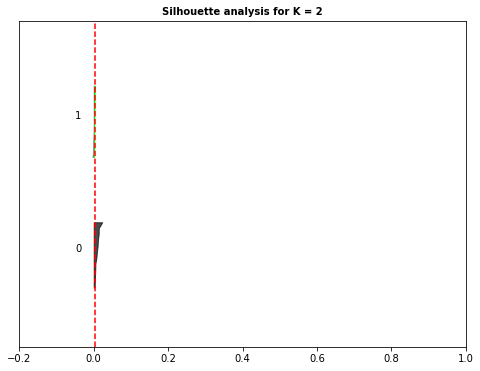

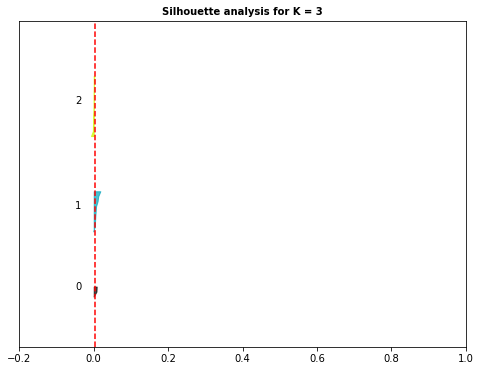

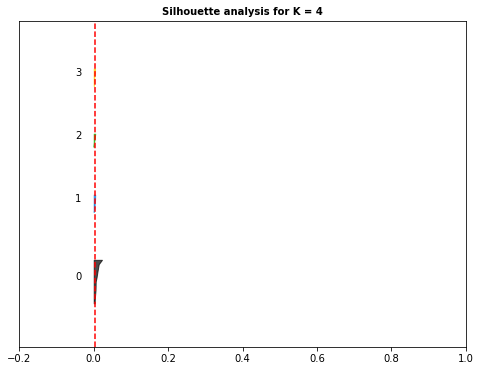

In [235]:
silhouette(kmeans_results, final_df, plot=True)

In [236]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

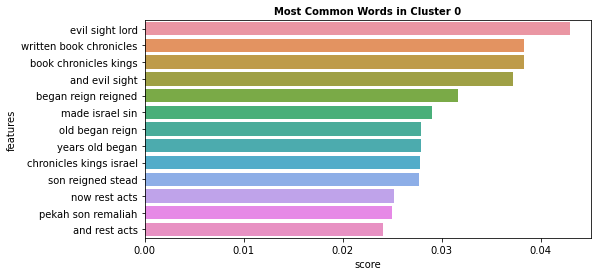

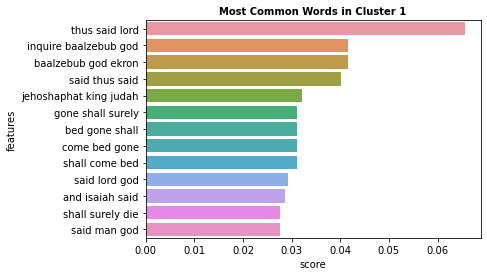

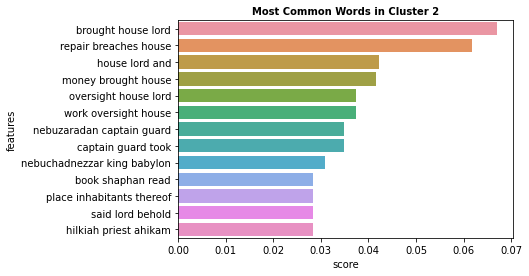

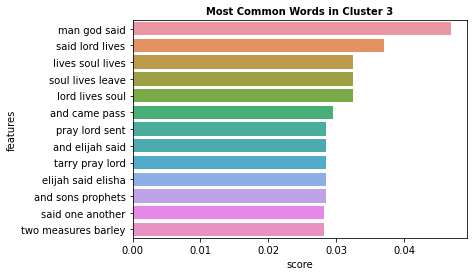

In [237]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [238]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

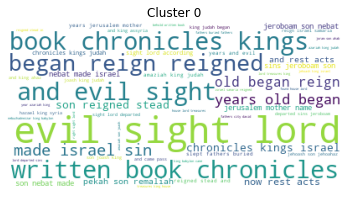

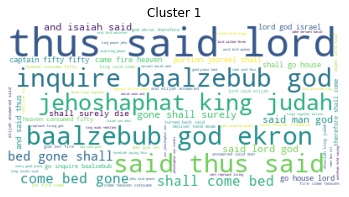

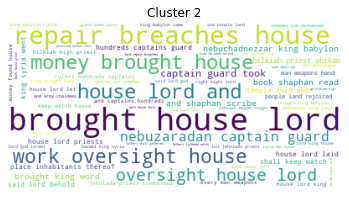

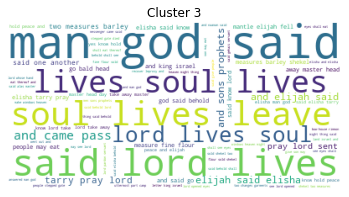

In [239]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [240]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,II_Reis_1,"'moab', 'rebelled', 'israel', 'death', 'ahab.a...",1
101,II_Reis_2,"'came', 'pass', ',', 'lord', 'would', 'take', ...",3
102,II_Reis_3,"'jehoram', 'son', 'ahab', 'began', 'reign', 'i...",1
103,II_Reis_4,"'cried', 'certain', 'woman', 'wives', 'sons', ...",3
104,II_Reis_5,"'naaman', ',', 'captain', 'host', 'king', 'syr...",3


In [241]:
print(df)

          Autor                                              Livro  label
100   II_Reis_1  'moab', 'rebelled', 'israel', 'death', 'ahab.a...      1
101   II_Reis_2  'came', 'pass', ',', 'lord', 'would', 'take', ...      3
102   II_Reis_3  'jehoram', 'son', 'ahab', 'began', 'reign', 'i...      1
103   II_Reis_4  'cried', 'certain', 'woman', 'wives', 'sons', ...      3
104   II_Reis_5  'naaman', ',', 'captain', 'host', 'king', 'syr...      3
105   II_Reis_6  'sons', 'prophets', 'said', 'elisha', ',', 'be...      3
106   II_Reis_7  'elisha', 'said', ',', 'hear', 'word', 'lord',...      3
107   II_Reis_8  'spoke', 'elisha', 'woman', ',', 'whose', 'son...      0
108   II_Reis_9  'elisha', 'prophet', 'called', 'one', 'childre...      1
109  II_Reis_10  'ahab', 'seventy', 'sons', 'samaria', '.', 'je...      0
110  II_Reis_11  'athaliah', 'mother', 'ahaziah', 'saw', 'son',...      2
111  II_Reis_12  'seventh', 'year', 'jehu', 'jehoash', 'began',...      2
112  II_Reis_13  'three', 'twentieth',